## Credit EDA Assignment - Case study

The following case study is about doing risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

The given datasets contains the information about the clients related to loan and other variables:-

=> 1. 'application_data'      - contains all the information of the client at the time of application.

=> 2. 'previous_application'  - contains information about the client’s previous loan data.

=> 3. 'columns_description.'   - it describes the meaning of the variables and is, therefore, not necessary for analysis.

This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

#### Importing necessary libraries

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading dataset 1 - 'Application_data'

In [2]:
appl = pd.read_csv("application_data.csv")

#### Understanding the dataset -  "appl"

In [3]:
# checking the SIZE of dataset, that are, rows and columns:

appl.shape

(307511, 122)

In [4]:
# checking INFO of dataset:

appl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


--------There are 122 columns with various data types like float64, int64 and object.---------

In [5]:
# checking top rows of the dataset for better understanding:

appl.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

#### Checking null value ratio in every column

In [6]:
null_appl=appl.isna().sum().sort_values(ascending=False)/appl.shape[0]*100

In [7]:
# checking some column's null value ratio:

null_appl.head(30)

COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
NONLIVINGAPARTMENTS_MEDI    69.432963
FONDKAPREMONT_MODE          68.386172
LIVINGAPARTMENTS_MODE       68.354953
LIVINGAPARTMENTS_AVG        68.354953
LIVINGAPARTMENTS_MEDI       68.354953
FLOORSMIN_AVG               67.848630
FLOORSMIN_MODE              67.848630
FLOORSMIN_MEDI              67.848630
YEARS_BUILD_MEDI            66.497784
YEARS_BUILD_MODE            66.497784
YEARS_BUILD_AVG             66.497784
OWN_CAR_AGE                 65.990810
LANDAREA_MEDI               59.376738
LANDAREA_MODE               59.376738
LANDAREA_AVG                59.376738
BASEMENTAREA_MEDI           58.515956
BASEMENTAREA_AVG            58.515956
BASEMENTAREA_MODE           58.515956
EXT_SOURCE_1                56.381073
NONLIVINGAREA_MODE          55.179164
NONLIVINGAREA_AVG           55.179164
NONLIVINGARE

### Creating a list of columns with null value ratio more than 45%

In [8]:
null_data=(null_appl[null_appl>=45]).index.tolist()
print(len(null_data))

49


--------There are 49 columns that can be removed from the APPLICATION DATA because more than 45% of their data is null.--------


### Removing 49 columns with null value ratio more than 45%

In [9]:
new_appl=appl
new_appl.drop(columns=null_data, inplace = True)

###### Checking the size of data set after removal 

In [10]:
new_appl.shape

(307511, 73)

###### Checking the column lists to find out columns with no use, with the help of "column_description" dataset

In [11]:
new_appl.columns.tolist()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_

------The following columns seems to be of no use, therefore, it's ok to drop them------

['FLAG_MOBIL','FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE','REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','FLAG_EMAIL']

In [12]:
no_use_col=['FLAG_MOBIL','FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE','REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','FLAG_EMAIL']
new_appl.drop(columns=no_use_col, inplace=True)

##### Let's check the size of dataset again after this removal

In [13]:
new_appl.shape

(307511, 42)

### Checking other columns having null values after removal of high null value columns

In [14]:
null_percent=(new_appl.isnull().sum()*100/len(new_appl)).sort_values(ascending=False)
col_null=null_percent[null_percent>0].sort_values(ascending=False).index.tolist()
col_null

['OCCUPATION_TYPE',
 'EXT_SOURCE_3',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'NAME_TYPE_SUITE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'EXT_SOURCE_2',
 'AMT_GOODS_PRICE',
 'AMT_ANNUITY',
 'CNT_FAM_MEMBERS',
 'DAYS_LAST_PHONE_CHANGE']

### Let's imput missing values of 'Numerical category with Median' and 'Category columns with Mode'

In [15]:
for i in col_null:
    if new_appl[i].dtype=='object':
        new_appl[i]=new_appl[i].fillna(new_appl[i].mode()[0])
    else:
        new_appl[i]=new_appl[i].fillna(new_appl[i].median())

##### Confirming if there are any missing values left

In [16]:
new_appl.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
REGION_POPULATION_RELATIVE    0
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
DAYS_REGISTRATION             0
DAYS_ID_PUBLISH               0
OCCUPATION_TYPE               0
CNT_FAM_MEMBERS               0
WEEKDAY_APPR_PROCESS_START    0
HOUR_APPR_PROCESS_START       0
REG_CITY_NOT_LIVE_CITY        0
REG_CITY_NOT_WORK_CITY        0
LIVE_CITY_NOT_WORK_CITY       0
ORGANIZATION_TYPE             0
EXT_SOURCE_2                  0
EXT_SOURCE_3                  0
OBS_30_C

------Hence, no more null value is left in the dataset------

##### Checking final size of dataset after removal of unnecessary columns:

In [17]:
new_appl.shape

(307511, 42)

##### Let's have a look on Final Data

In [18]:
new_appl.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  DEF_30_CNT_SOCIAL_CIRCLE OBS_60_CNT_SOCIAL_CIRCLE  \
0  ...                       2.0                      2.0   
1  ...                       0.0                      1.0   
2  ...                       0.0                      0.0   
3  ...                       0.0                      2.0   
4  ...                       0.0                      0.0   

  DEF_60_CNT_SOCIAL_CIRCLE DAYS_LAST_PHONE_CHANGE AMT_REQ_CREDIT_BUREAU_HOUR  \
0                      2.0                -1134.0                        0.0   
1                      0.0                 -828.0                        0.0   
2                      0.0                 -815.0                        0.0   
3                      0.0                 -617.0                        0.0   
4                      0.0                -1106.0                        0.0   

  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                       0.0                         0.0   
1                       0.0                         0.0   
2                       0.0                         0.0   
3                       0.0                         0.0   
4                       0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR  
0                         1.0  
1                         0.0  
2                         0.0  
3                         1.0  
4                         0.0  

[5 rows x 42 columns]

##### Checking Unique values present in each column of final dataset - 'new_appl'

In [19]:
new_appl.nunique().sort_values(ascending=False)

SK_ID_CURR                    307511
EXT_SOURCE_2                  119831
DAYS_BIRTH                     17460
DAYS_REGISTRATION              15688
AMT_ANNUITY                    13672
DAYS_EMPLOYED                  12574
DAYS_ID_PUBLISH                 6168
AMT_CREDIT                      5603
DAYS_LAST_PHONE_CHANGE          3773
AMT_INCOME_TOTAL                2548
AMT_GOODS_PRICE                 1002
EXT_SOURCE_3                     814
REGION_POPULATION_RELATIVE        81
ORGANIZATION_TYPE                 58
OBS_60_CNT_SOCIAL_CIRCLE          33
OBS_30_CNT_SOCIAL_CIRCLE          33
AMT_REQ_CREDIT_BUREAU_YEAR        25
AMT_REQ_CREDIT_BUREAU_MON         24
HOUR_APPR_PROCESS_START           24
OCCUPATION_TYPE                   18
CNT_FAM_MEMBERS                   17
CNT_CHILDREN                      15
AMT_REQ_CREDIT_BUREAU_QRT         11
DEF_30_CNT_SOCIAL_CIRCLE          10
AMT_REQ_CREDIT_BUREAU_WEEK         9
AMT_REQ_CREDIT_BUREAU_DAY          9
DEF_60_CNT_SOCIAL_CIRCLE           9
N

##### Creating a combined dataset regarding unique values and its column type

In [20]:
c_type=new_appl.nunique().sort_values(ascending=False)

#reset_index - resets the index of series, converting it into dataframe.
c_type=c_type.reset_index()

#rename - renames the columns of the index
c_type=c_type.rename(columns={"index":"c_name",0:"uniqueValCount"})

#dtype - will tell the datatype of each column
c_type['dtype']=c_type['c_name'].apply(lambda x:new_appl[x].dtype)

In [21]:
c_type

c_name  uniqueValCount    dtype
0                   SK_ID_CURR          307511    int64
1                 EXT_SOURCE_2          119831  float64
2                   DAYS_BIRTH           17460    int64
3            DAYS_REGISTRATION           15688  float64
4                  AMT_ANNUITY           13672  float64
5                DAYS_EMPLOYED           12574    int64
6              DAYS_ID_PUBLISH            6168    int64
7                   AMT_CREDIT            5603  float64
8       DAYS_LAST_PHONE_CHANGE            3773  float64
9             AMT_INCOME_TOTAL            2548  float64
10             AMT_GOODS_PRICE            1002  float64
11                EXT_SOURCE_3             814  float64
12  REGION_POPULATION_RELATIVE              81  float64
13           ORGANIZATION_TYPE              58   object
14    OBS_60_CNT_SOCIAL_CIRCLE              33  float64
15    OBS_30_CNT_SOCIAL_CIRCLE              33  float64
16  AMT_REQ_CREDIT_BUREAU_YEAR              25  float64
17   AMT_REQ_CREDIT_BUREAU_MON              24  float64
18     HOUR_APPR_PROCESS_START              24    int64
19             OCCUPATION_TYPE              18   object
20             CNT_FAM_MEMBERS              17  float64
21                CNT_CHILDREN              15    int64
22   AMT_REQ_CREDIT_BUREAU_QRT              11  float64
23    DEF_30_CNT_SOCIAL_CIRCLE              10  float64
24  AMT_REQ_CREDIT_BUREAU_WEEK               9  float64
25   AMT_REQ_CREDIT_BUREAU_DAY               9  float64
26    DEF_60_CNT_SOCIAL_CIRCLE               9  float64
27            NAME_INCOME_TYPE               8   object
28  WEEKDAY_APPR_PROCESS_START               7   object
29             NAME_TYPE_SUITE               7   object
30           NAME_HOUSING_TYPE               6   object
31          NAME_FAMILY_STATUS               6   object
32  AMT_REQ_CREDIT_BUREAU_HOUR               5  float64
33         NAME_EDUCATION_TYPE               5   object
34                 CODE_GENDER               3   object
35                FLAG_OWN_CAR               2   object
36             FLAG_OWN_REALTY               2   object
37          NAME_CONTRACT_TYPE               2   object
38     LIVE_CITY_NOT_WORK_CITY               2    int64
39      REG_CITY_NOT_WORK_CITY               2    int64
40      REG_CITY_NOT_LIVE_CITY               2    int64
41                      TARGET               2    int64

-----This helps in understanding the diversity and characteristics of the data in each column------

##### Converting columns with less unique values to categorical data type column 

In [22]:
#columns with less unique values
less_uni=['ORGANIZATION_TYPE','OBS_60_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_MON','HOUR_APPR_PROCESS_START','OCCUPATION_TYPE','CNT_FAM_MEMBERS','CNT_CHILDREN', 'AMT_REQ_CREDIT_BUREAU_QRT','DEF_30_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY','DEF_60_CNT_SOCIAL_CIRCLE','NAME_INCOME_TYPE','WEEKDAY_APPR_PROCESS_START','NAME_TYPE_SUITE','NAME_HOUSING_TYPE','NAME_FAMILY_STATUS','AMT_REQ_CREDIT_BUREAU_HOUR','NAME_EDUCATION_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_CONTRACT_TYPE','LIVE_CITY_NOT_WORK_CITY','REG_CITY_NOT_WORK_CITY','REG_CITY_NOT_LIVE_CITY','TARGET']

#converting columns types to object type
for i in less_uni:
    new_appl[i]=new_appl[i].astype('object')

In [23]:
#let's check datatype of dataset
new_appl.dtypes

SK_ID_CURR                      int64
TARGET                         object
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
CNT_CHILDREN                   object
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_TYPE_SUITE                object
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
REGION_POPULATION_RELATIVE    float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION             float64
DAYS_ID_PUBLISH                 int64
OCCUPATION_TYPE                object
CNT_FAM_MEMBERS                object
WEEKDAY_APPR_PROCESS_START     object
HOUR_APPR_PROCESS_START        object
REG_CITY_NOT_LIVE_CITY         object
REG_CITY_NOT

------ Using the categorical data type for columns with a relatively small number of unique values can offer several advantages in terms of memory efficiency and potential performance gains. It also helps in improved performance for tasks such as sorting, grouping, etc. Categorical data can have a natural order, which can be useful where the data has a meaningful ordinal relationship. ------

### Let's check if there are any negative values in dataset

In [24]:
new_appl.describe()

SK_ID_CURR  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  \
count  307511.000000      3.075110e+05  3.075110e+05  307511.000000   
mean   278180.518577      1.687979e+05  5.990260e+05   27108.487841   
std    102790.175348      2.371231e+05  4.024908e+05   14493.461065   
min    100002.000000      2.565000e+04  4.500000e+04    1615.500000   
25%    189145.500000      1.125000e+05  2.700000e+05   16524.000000   
50%    278202.000000      1.471500e+05  5.135310e+05   24903.000000   
75%    367142.500000      2.025000e+05  8.086500e+05   34596.000000   
max    456255.000000      1.170000e+08  4.050000e+06  258025.500000   

       AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  \
count     3.075110e+05               307511.000000  307511.000000   
mean      5.383163e+05                    0.020868  -16036.995067   
std       3.692890e+05                    0.013831    4363.988632   
min       4.050000e+04                    0.000290  -25229.000000   
25%       2.385000e+05                    0.010006  -19682.000000   
50%       4.500000e+05                    0.018850  -15750.000000   
75%       6.795000e+05                    0.028663  -12413.000000   
max       4.050000e+06                    0.072508   -7489.000000   

       DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  EXT_SOURCE_2  \
count  307511.000000      307511.000000    307511.000000  3.075110e+05   
mean    63815.045904       -4986.120328     -2994.202373  5.145034e-01   
std    141275.766519        3522.886321      1509.450419  1.908699e-01   
min    -17912.000000      -24672.000000     -7197.000000  8.173617e-08   
25%     -2760.000000       -7479.500000     -4299.000000  3.929737e-01   
50%     -1213.000000       -4504.000000     -3254.000000  5.659614e-01   
75%      -289.000000       -2010.000000     -1720.000000  6.634218e-01   
max    365243.000000           0.000000         0.000000  8.549997e-01   

        EXT_SOURCE_3  DAYS_LAST_PHONE_CHANGE  
count  307511.000000           307511.000000  
mean        0.515695             -962.858119  
std         0.174736              826.807226  
min         0.000527            -4292.000000  
25%         0.417100            -1570.000000  
50%         0.535276             -757.000000  
75%         0.636376             -274.000000  
max         0.896010                0.000000

### ------- As seen, there are some columns with negative values, also, these columns are related to duration, which means that these columns cannot have negative values. This happens when the end date is earlier than the start date and they are calculated by subtracting the end date from a start date. Those columns are: 
['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE'] --------

### Converting duration or age columns to ABSOLUTE VALUES is a useful step to ensure that negative values do not impact the analysis when the direction of time is not a relevant factor.

In [25]:
#let's convert these negative values to ABSOLUTE VALUES and unit from days to years
new_appl[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']]=new_appl[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']].abs()/365

In [26]:
new_appl.describe()

SK_ID_CURR  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  \
count  307511.000000      3.075110e+05  3.075110e+05  307511.000000   
mean   278180.518577      1.687979e+05  5.990260e+05   27108.487841   
std    102790.175348      2.371231e+05  4.024908e+05   14493.461065   
min    100002.000000      2.565000e+04  4.500000e+04    1615.500000   
25%    189145.500000      1.125000e+05  2.700000e+05   16524.000000   
50%    278202.000000      1.471500e+05  5.135310e+05   24903.000000   
75%    367142.500000      2.025000e+05  8.086500e+05   34596.000000   
max    456255.000000      1.170000e+08  4.050000e+06  258025.500000   

       AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  \
count     3.075110e+05               307511.000000  307511.000000   
mean      5.383163e+05                    0.020868      43.936973   
std       3.692890e+05                    0.013831      11.956133   
min       4.050000e+04                    0.000290      20.517808   
25%       2.385000e+05                    0.010006      34.008219   
50%       4.500000e+05                    0.018850      43.150685   
75%       6.795000e+05                    0.028663      53.923288   
max       4.050000e+06                    0.072508      69.120548   

       DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  EXT_SOURCE_2  \
count  307511.000000      307511.000000    307511.000000  3.075110e+05   
mean      185.547239          13.660604         8.203294  5.145034e-01   
std       382.037676           9.651743         4.135481  1.908699e-01   
min         0.000000           0.000000         0.000000  8.173617e-08   
25%         2.556164           5.506849         4.712329  3.929737e-01   
50%         6.079452          12.339726         8.915068  5.659614e-01   
75%        15.635616          20.491781        11.778082  6.634218e-01   
max      1000.665753          67.594521        19.717808  8.549997e-01   

        EXT_SOURCE_3  DAYS_LAST_PHONE_CHANGE  
count  307511.000000           307511.000000  
mean        0.515695                2.637967  
std         0.174736                2.265225  
min         0.000527                0.000000  
25%         0.417100                0.750685  
50%         0.535276                2.073973  
75%         0.636376                4.301370  
max         0.896010               11.758904

#### ----- Expressing time in years can result in more straightforward and intuitive graphs, making it easier to understand the data.-----

### Let's create a new column, to categorize individuals into different age groups based on specific bin edges

In [27]:
new_appl.DAYS_BIRTH.describe()

#let's create a list specifying the bin edges. The intervals between these edges define the bins for categorization.
mybins=[20,30,40,50,60,100]

#let's now create a list specifying the labels for each bin. These labels will be allotted to the respective bin in the resulting categorical column.
slabs=['20-30','30-40','40-50','50-60','>60']

new_appl['AGE_GROUPS']=pd.cut(new_appl['DAYS_BIRTH'],mybins,labels=slabs)

##### Let's check the value_counts of AGE_GROUPS

In [28]:
new_appl['AGE_GROUPS'].value_counts()

30-40    82308
40-50    76541
50-60    68062
20-30    45021
>60      35579
Name: AGE_GROUPS, dtype: int64

### Let's create a column for years of Employment 

In [29]:
new_appl.DAYS_EMPLOYED.describe()

mybins=[0,5,10,15,20,25,30,35,50]

slabs=['0-5','5-10','10-15','15-20','20-25','25-30','30-35','>35']

new_appl['EMPLOYMENT_YEARS']=pd.cut(new_appl['DAYS_EMPLOYED'],mybins,labels=slabs)

In [30]:
new_appl['EMPLOYMENT_YEARS'].value_counts()

0-5      136309
5-10      64872
10-15     27549
15-20     10849
20-25      6243
25-30      3308
30-35      1939
>35        1066
Name: EMPLOYMENT_YEARS, dtype: int64

### Let's convert numerical columns with very high values to categorical columns for better understanding
These columns are - ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE']

In [31]:
#we can bin numerical columns to create categorical columns. 
#Binning can simplify the dataset if there are large range of numeric values.

#creating bins for 'AMT_INCOME_TOTAL' in terms of lakh
new_appl['AMT_INCOME_TOTAL']=new_appl['AMT_INCOME_TOTAL']/100000

mybins= [0,1,2,3,4,5,6,7,8,9,10,11]

slabs= ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','>10L']

new_appl['AMT_INC_RANGE']=pd.cut(new_appl['AMT_INCOME_TOTAL'],mybins,labels=slabs)

In [32]:
new_appl['AMT_INC_RANGE'].value_counts()

1L-2L     155898
2L-3L      65176
0-1L       63698
3L-4L      14676
4L-5L       5361
5L-6L       1095
6L-7L        869
8L-9L        298
7L-8L        162
9L-10L        28
>10L          18
Name: AMT_INC_RANGE, dtype: int64

In [33]:
#creating bins for 'AMT_CREDIT' in terms of lakh
new_appl['AMT_CREDIT']=new_appl['AMT_CREDIT']/100000

mybins= [0,1,2,3,4,5,6,7,8,9,10,100]

slabs= ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','>10L']

new_appl['AMT_CR_RANGE']=pd.cut(new_appl['AMT_CREDIT'],mybins,labels=slabs)

In [34]:
new_appl['AMT_CR_RANGE'].value_counts()

2L-3L     54813
>10L      49985
5L-6L     34232
4L-5L     32038
1L-2L     30140
3L-4L     26338
6L-7L     24049
8L-9L     21792
7L-8L     19193
9L-10L     8927
0-1L       6004
Name: AMT_CR_RANGE, dtype: int64

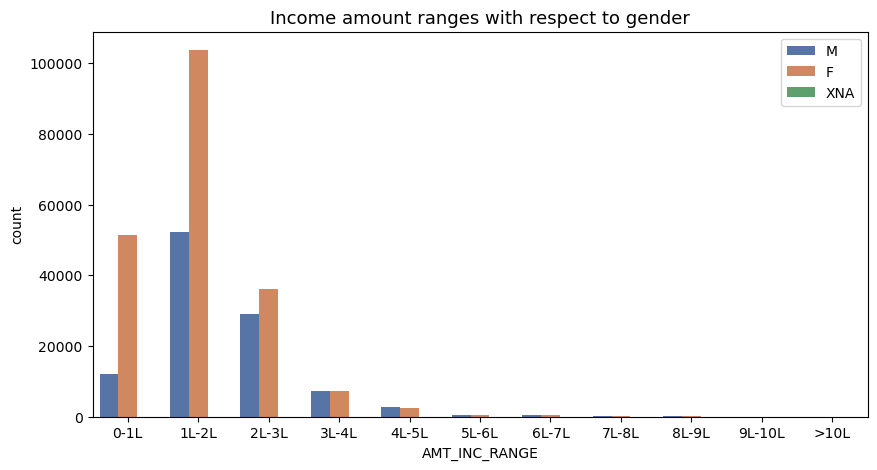

In [35]:
plt.figure(figsize=[10,5])
sns.countplot(data=new_appl,x='AMT_INC_RANGE',hue='CODE_GENDER',palette='deep',saturation=0.8)
plt.title('Income amount ranges with respect to gender',size=13)
plt.legend(loc= 'upper right')
plt.show()

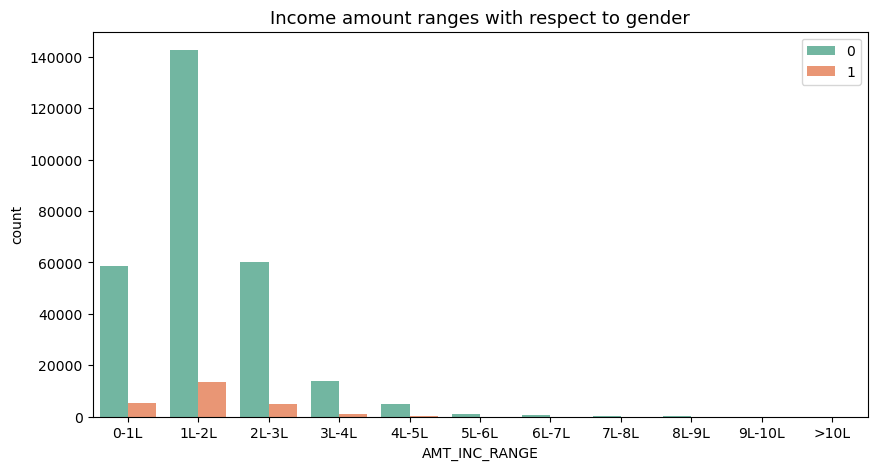

In [36]:
plt.figure(figsize=[10,5])
sns.countplot(data=new_appl,x='AMT_INC_RANGE',hue='TARGET',palette='Set2')
plt.title('Income amount ranges with respect to gender',size=13)
plt.legend(loc= 'upper right')
plt.show()

In [37]:
#creating bins for 'AMT_GOODS_PRICE' in terms of lakh
new_appl['AMT_GOODS_PRICE']=new_appl['AMT_GOODS_PRICE']/100000

mybins= [0,1,2,3,4,5,6,7,8,9,10,100]

slabs= ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','>10L']

new_appl['AMT_GP_RANGE']=pd.cut(new_appl['AMT_GOODS_PRICE'],mybins,labels=slabs)

In [38]:
new_appl['AMT_GP_RANGE'].value_counts()

2L-3L     62761
4L-5L     57251
6L-7L     40024
>10L      34119
1L-2L     32956
8L-9L     21484
3L-4L     21219
5L-6L     13117
0-1L       8709
7L-8L      8110
9L-10L     7761
Name: AMT_GP_RANGE, dtype: int64

#### let's create separate list of columns based on their data-type to perform operations more accurately

In [39]:
obj_col=new_appl.select_dtypes(['object','category']).columns.to_list()
int_col=new_appl.select_dtypes(['float','int']).columns.to_list()

#### let's remove a column which is unique and will be used as a primary key

In [40]:
int_col.remove('SK_ID_CURR')

In [41]:
#removing target column from obj_col
obj_col.remove("TARGET")

## Let's understand about 'outliers'

In [42]:
new_appl.describe()

SK_ID_CURR  AMT_INCOME_TOTAL     AMT_CREDIT    AMT_ANNUITY  \
count  307511.000000     307511.000000  307511.000000  307511.000000   
mean   278180.518577          1.687979       5.990260   27108.487841   
std    102790.175348          2.371231       4.024908   14493.461065   
min    100002.000000          0.256500       0.450000    1615.500000   
25%    189145.500000          1.125000       2.700000   16524.000000   
50%    278202.000000          1.471500       5.135310   24903.000000   
75%    367142.500000          2.025000       8.086500   34596.000000   
max    456255.000000       1170.000000      40.500000  258025.500000   

       AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  \
count    307511.000000               307511.000000  307511.000000   
mean          5.383163                    0.020868      43.936973   
std           3.692890                    0.013831      11.956133   
min           0.405000                    0.000290      20.517808   
25%           2.385000                    0.010006      34.008219   
50%           4.500000                    0.018850      43.150685   
75%           6.795000                    0.028663      53.923288   
max          40.500000                    0.072508      69.120548   

       DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  EXT_SOURCE_2  \
count  307511.000000      307511.000000    307511.000000  3.075110e+05   
mean      185.547239          13.660604         8.203294  5.145034e-01   
std       382.037676           9.651743         4.135481  1.908699e-01   
min         0.000000           0.000000         0.000000  8.173617e-08   
25%         2.556164           5.506849         4.712329  3.929737e-01   
50%         6.079452          12.339726         8.915068  5.659614e-01   
75%        15.635616          20.491781        11.778082  6.634218e-01   
max      1000.665753          67.594521        19.717808  8.549997e-01   

        EXT_SOURCE_3  DAYS_LAST_PHONE_CHANGE  
count  307511.000000           307511.000000  
mean        0.515695                2.637967  
std         0.174736                2.265225  
min         0.000527                0.000000  
25%         0.417100                0.750685  
50%         0.535276                2.073973  
75%         0.636376                4.301370  
max         0.896010               11.758904

#### Columns with a substantial gap between the 75th percentile and the maximum value might contain outliers. Outliers are data points that deviate significantly from the rest of the dataset. Therefore, it's important to identify and handle them appropriately.

In [43]:
#let's separate those columns having outliers
outlier_col = ["CNT_CHILDREN","AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE","DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION"]

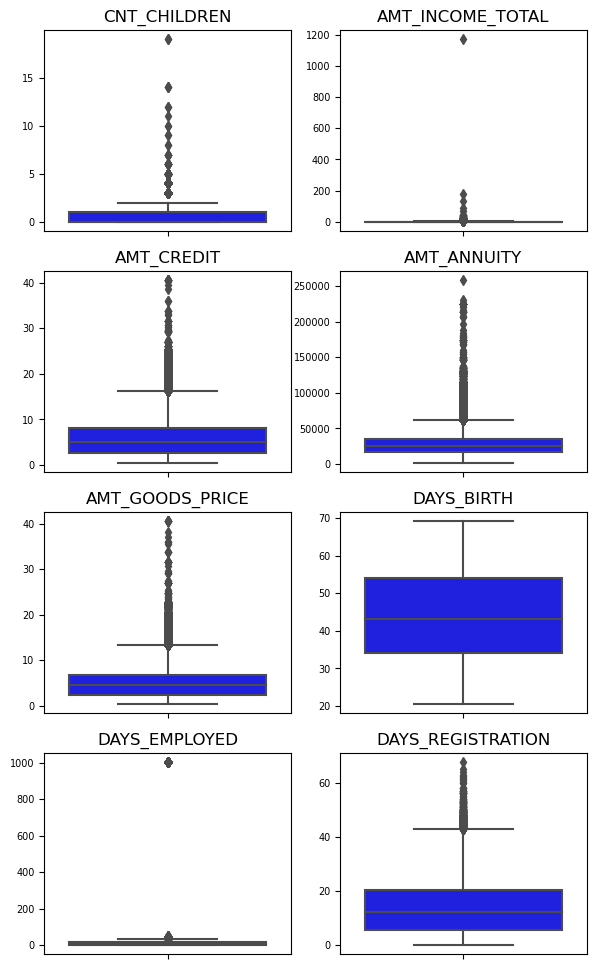

In [44]:
plt.figure(figsize=[7,12])
#Iterate over columns and their corresponding index using enumerate
for j,i in enumerate(outlier_col):
    
#Creating subplots in a 4x2 grid   
    plt.subplot(4, 2, j + 1)
    
#Creating a horizontal boxplot   
    sns.boxplot(y=new_appl[i] , color="blue")
    plt.yticks(fontsize=7)
    
#Setting x-axis label to an empty string    
    plt.xlabel("")
    
#Setting y-axis label to an empty string    
    plt.ylabel("")
    
#Setting the title of the subplot to the column name    
    plt.title(i)  
    
plt.show()

#### We can observe and understand the following things from these boxplots:

=> 1. DAYS_BIRTH have no outliers.

=> 2. CNT_CHILDREN, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, DAYS_REGISTRATION have some outliers.

=> 3. DAYS_EMPLOYED has already been dealt with but also has outlier.

=> 4. AMT_INCOME_TOTAL has high number of outlier indicating some people with higher income level, therefore, we can replace them with lower limit or upper limit values.

### Creating a list of columns related to amount to study relation between them

In [45]:
amt_col= ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']

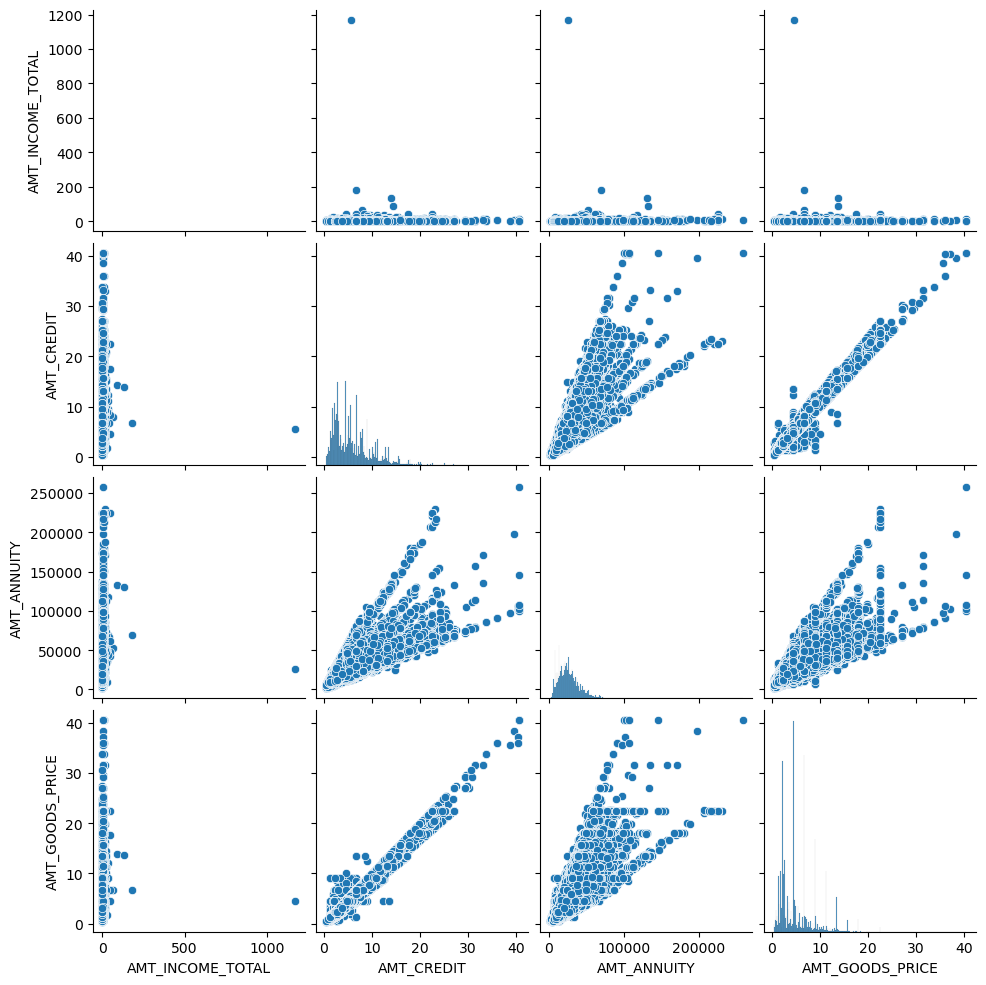

In [46]:
sns.pairplot(new_appl[amt_col])
plt.show()

### Let's analyze the TARGET Column

In [47]:
print(new_appl.TARGET.value_counts())
print(new_appl.TARGET.value_counts(normalize=True)*100)
print("-"*50)
print(new_appl.CODE_GENDER.value_counts())
print(new_appl.CODE_GENDER.value_counts(normalize=True)*100)

0    282686
1     24825
Name: TARGET, dtype: int64
0    91.927118
1     8.072882
Name: TARGET, dtype: float64
--------------------------------------------------
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
F      65.834393
M      34.164306
XNA     0.001301
Name: CODE_GENDER, dtype: float64


##### CODE_GENDER has 4  XNA values, which can be replaced with mode, that is 'F' in this case.

In [48]:
new_appl["CODE_GENDER"]=new_appl["CODE_GENDER"].apply(lambda x: x.replace("XNA","F"))
new_appl["CODE_GENDER"].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

##### Let's regenerate TARGET column

In [49]:
print(new_appl.TARGET.value_counts())
print(new_appl.TARGET.value_counts(normalize=True)*100)
print("-"*50)
print(new_appl.CODE_GENDER.value_counts())
print(new_appl.CODE_GENDER.value_counts(normalize=True)*100)

0    282686
1     24825
Name: TARGET, dtype: int64
0    91.927118
1     8.072882
Name: TARGET, dtype: float64
--------------------------------------------------
F    202452
M    105059
Name: CODE_GENDER, dtype: int64
F    65.835694
M    34.164306
Name: CODE_GENDER, dtype: float64


### TARGET 1 - Customer with payment difficulties 
### TARGET 0 - Customer with no payment difficulties

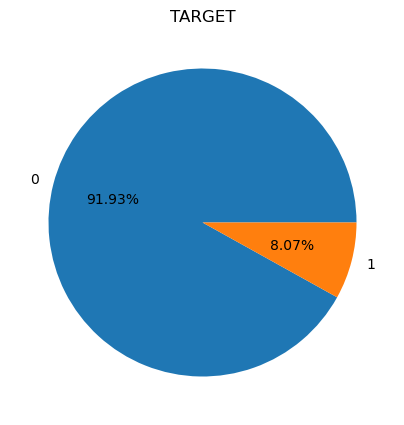

In [50]:
plt.figure(figsize=(5,5))
plt.pie(new_appl["TARGET"].value_counts(),labels=new_appl["TARGET"].value_counts().index.to_list(),autopct='%1.2f%%')
plt.title("TARGET")
plt.show()

### Splitting loan application on the basis on GENDER

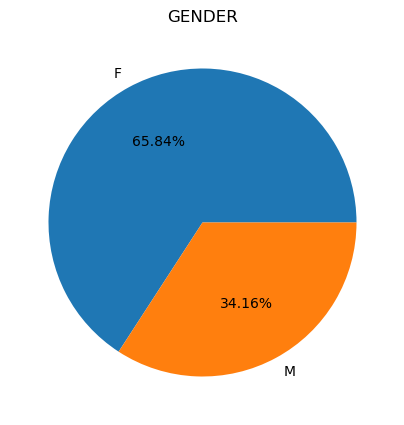

In [51]:
plt.figure(figsize=(5,5))
plt.pie(new_appl["CODE_GENDER"].value_counts(),labels=new_appl["CODE_GENDER"].value_counts().index.to_list(),autopct='%1.2f%%')
plt.title("GENDER")
plt.show()

##### Correlation of customer and payment difficulties

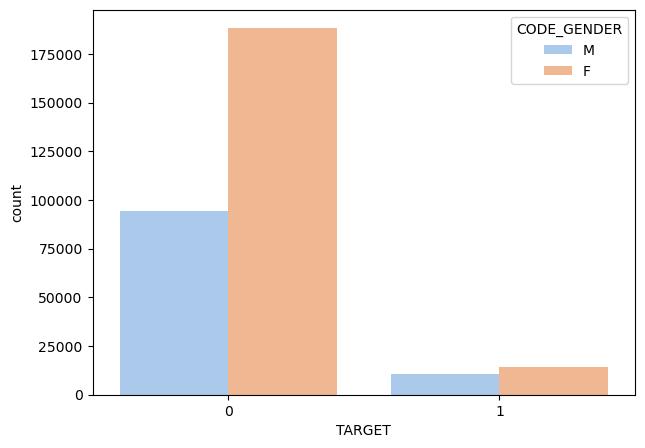

In [52]:
plt.figure(figsize=(7,5))
sns.countplot(data=new_appl,x="TARGET",hue='CODE_GENDER', palette='pastel')
plt.show()

#### Let's make some necessary changes in OCCUPATION_TYPE column

In [53]:
print(new_appl.OCCUPATION_TYPE.value_counts())

Laborers                 151577
Sales staff               32102
Core staff                27570
Managers                  21371
Drivers                   18603
High skill tech staff     11380
Accountants                9813
Medicine staff             8537
Security staff             6721
Cooking staff              5946
Cleaning staff             4653
Private service staff      2652
Low-skill Laborers         2093
Waiters/barmen staff       1348
Secretaries                1305
Realty agents               751
HR staff                    563
IT staff                    526
Name: OCCUPATION_TYPE, dtype: int64


#### Categorizing OCCUPATION_TYPE as skilled or unskilled

In [54]:
new_appl['OCCUPATION_TYPE']=new_appl["OCCUPATION_TYPE"].replace(["IT staff","HR staff","Secretaries","Private service staff","Medicine staff","Accountants","High skill tech staff","Managers","Core staff","Sales staff"],"Skilled").replace(["Realty agents","Low-skill Laborers","Security staff","Drivers","Cleaning staff","Cooking staff","Laborers","Waiters/barmen staff"],"Un-skilled")
new_appl["OCCUPATION_TYPE"].value_counts()

Un-skilled    191692
Skilled       115819
Name: OCCUPATION_TYPE, dtype: int64

## Let's analyze clients on the basis of TARGET

In [55]:
#let DEFAULTER = clients with payment difficulties
defaulter=new_appl[new_appl.TARGET==1]

# NON_DEFAULTER = clients with no payment difficulties
non_defaulter=new_appl[new_appl.TARGET==0]

In [56]:
print('DEFAULTER = ', defaulter.shape)
print('NON-DEFAULTER = ', non_defaulter.shape)

DEFAULTER =  (24825, 47)
NON-DEFAULTER =  (282686, 47)


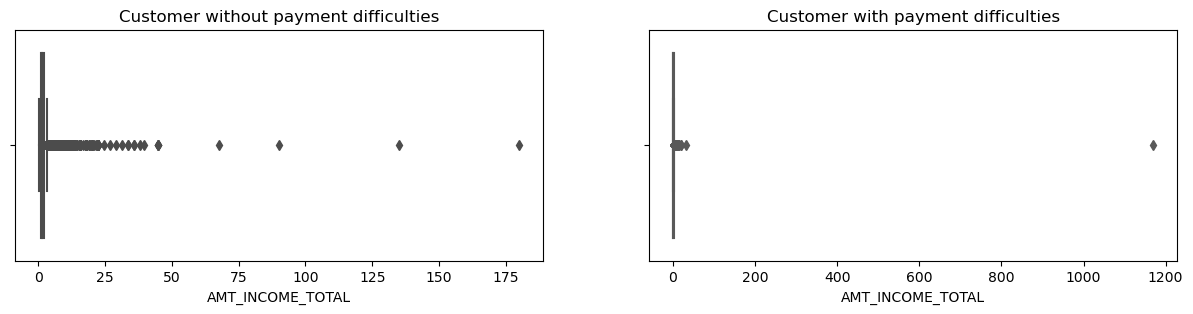

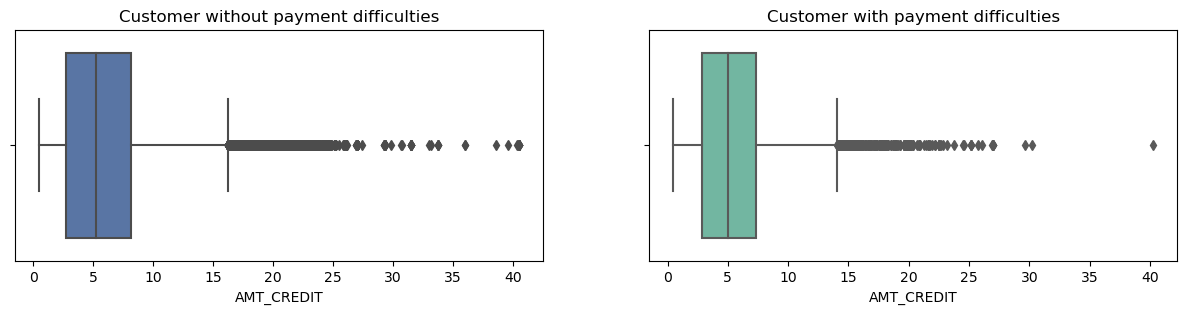

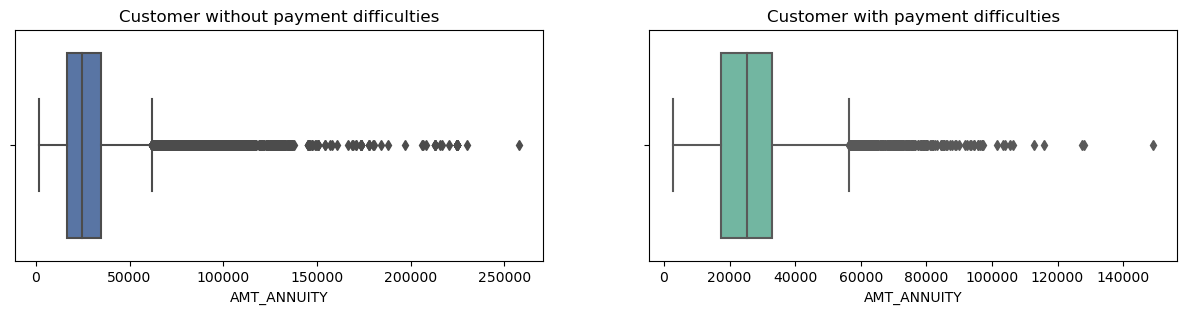

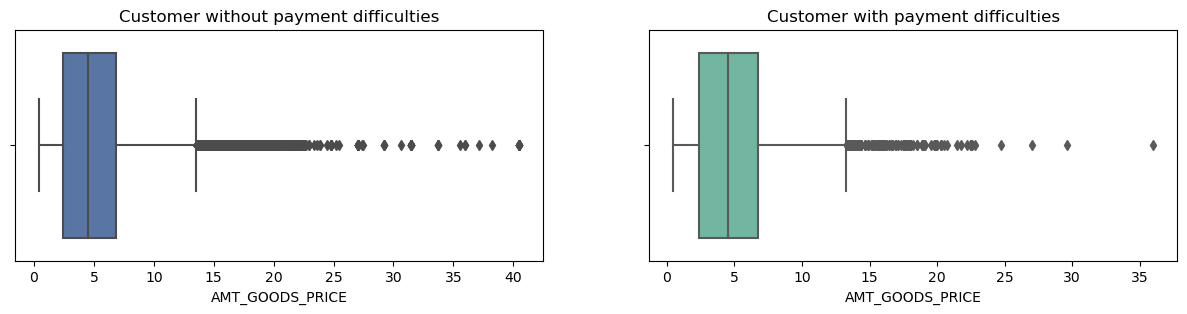

In [57]:
for i in amt_col:
    plt.figure(figsize=(15,3))
    plt.subplot(1,2,1)
    sns.boxplot(x=non_defaulter[i],palette="deep")
    plt.title('Customer without payment difficulties',size=12)
    plt.subplot(1,2,2)
    sns.boxplot(x=defaulter[i],palette="Set2")
    plt.title('Customer with payment difficulties',size=12)
    plt.show()

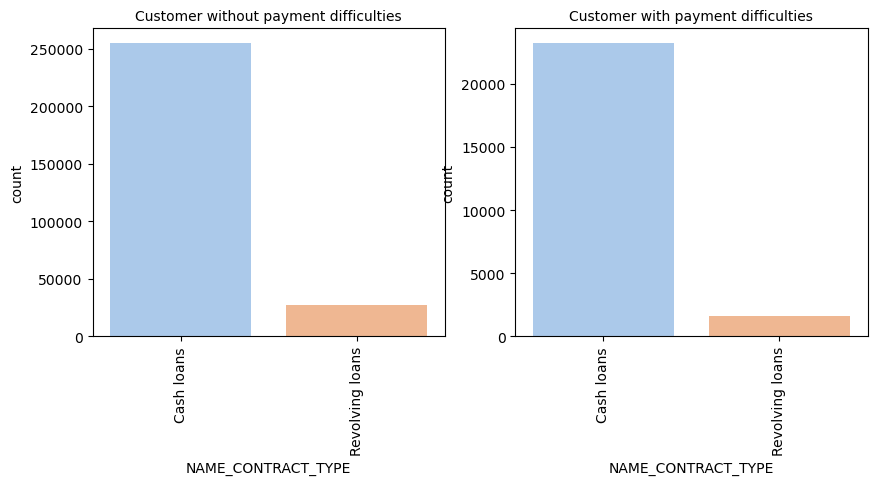

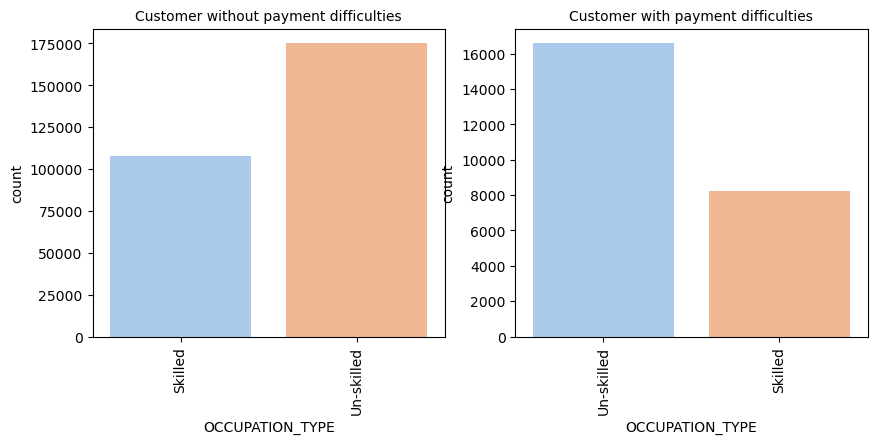

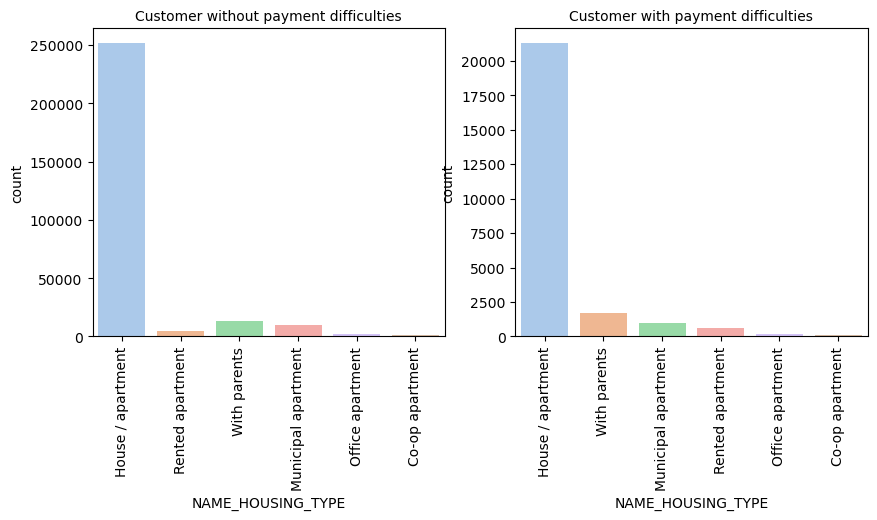

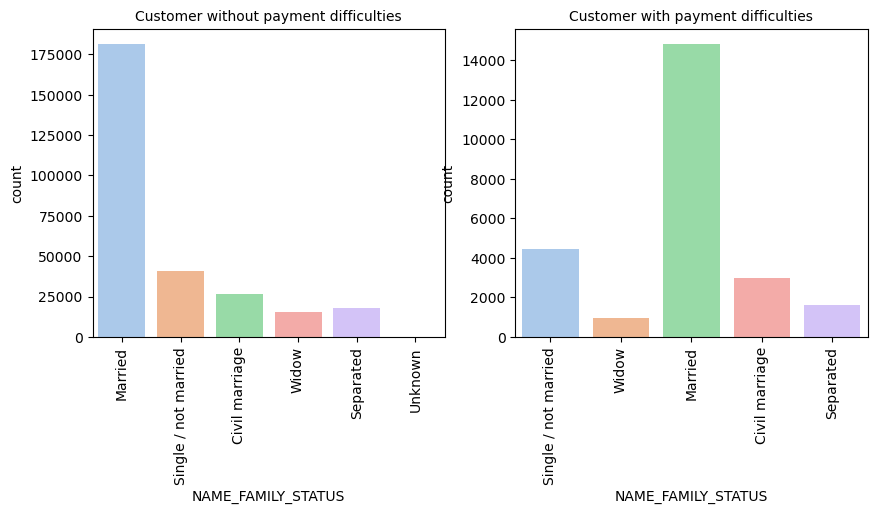

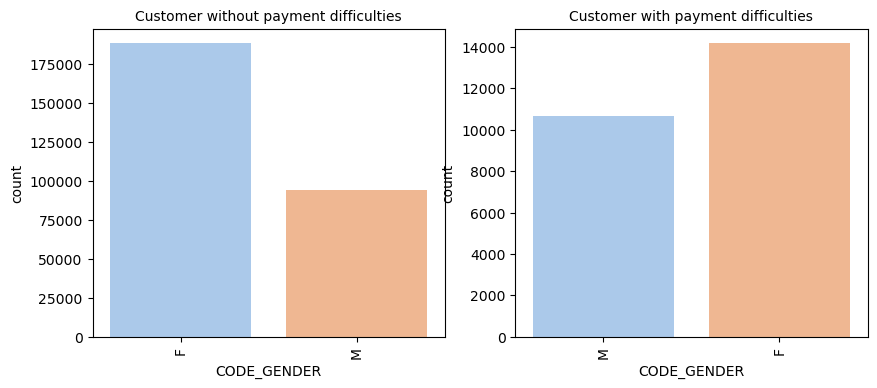

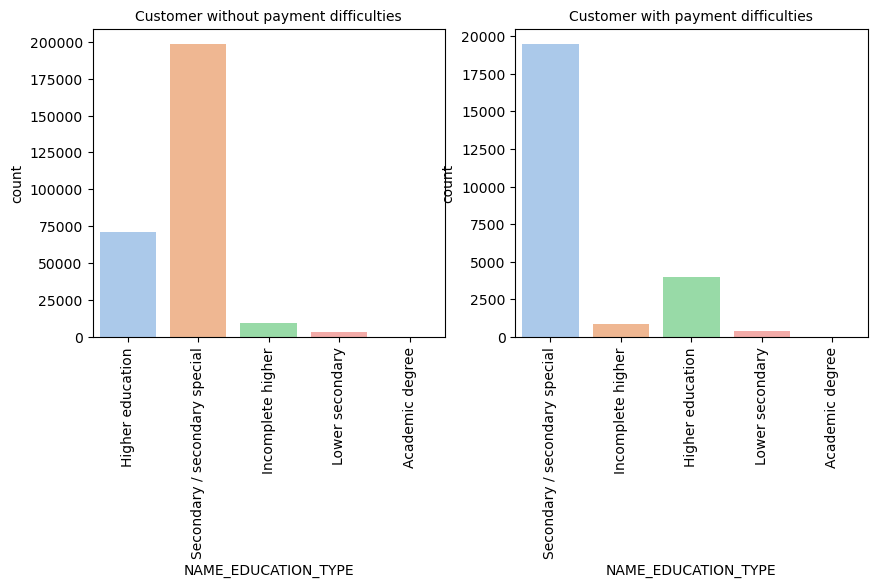

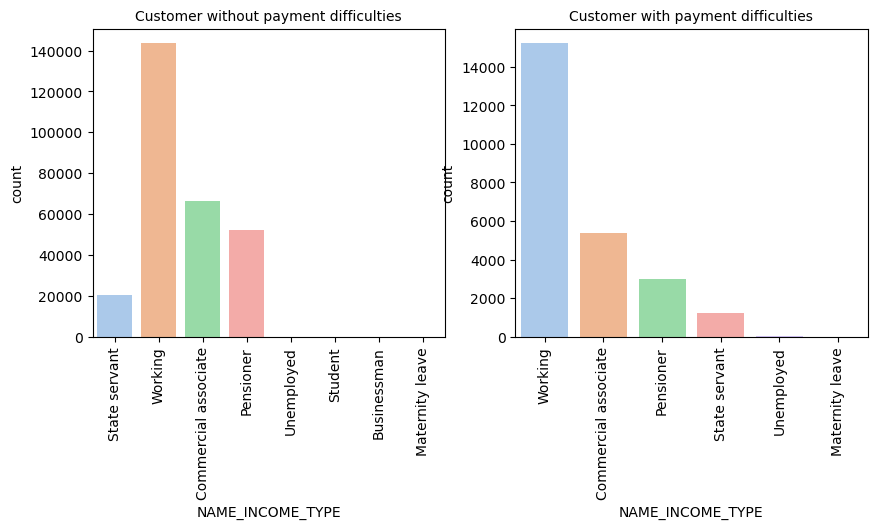

In [58]:
other=['NAME_CONTRACT_TYPE','OCCUPATION_TYPE','NAME_HOUSING_TYPE','NAME_FAMILY_STATUS','CODE_GENDER','NAME_EDUCATION_TYPE','NAME_INCOME_TYPE']

for i in other:
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.countplot(x=non_defaulter[i],palette = "pastel")
    plt.title('Customer without payment difficulties',size=10)
    plt.xticks(rotation=90)
    plt.subplot(1,2,2)
    sns.countplot(x=defaulter[i],palette = "pastel")
    plt.title('Customer with payment difficulties',size=10)
    plt.xticks(rotation=90)
    
plt.show()

### Correlation of customer having no payment difficulties (NON-DEFAULTERS)

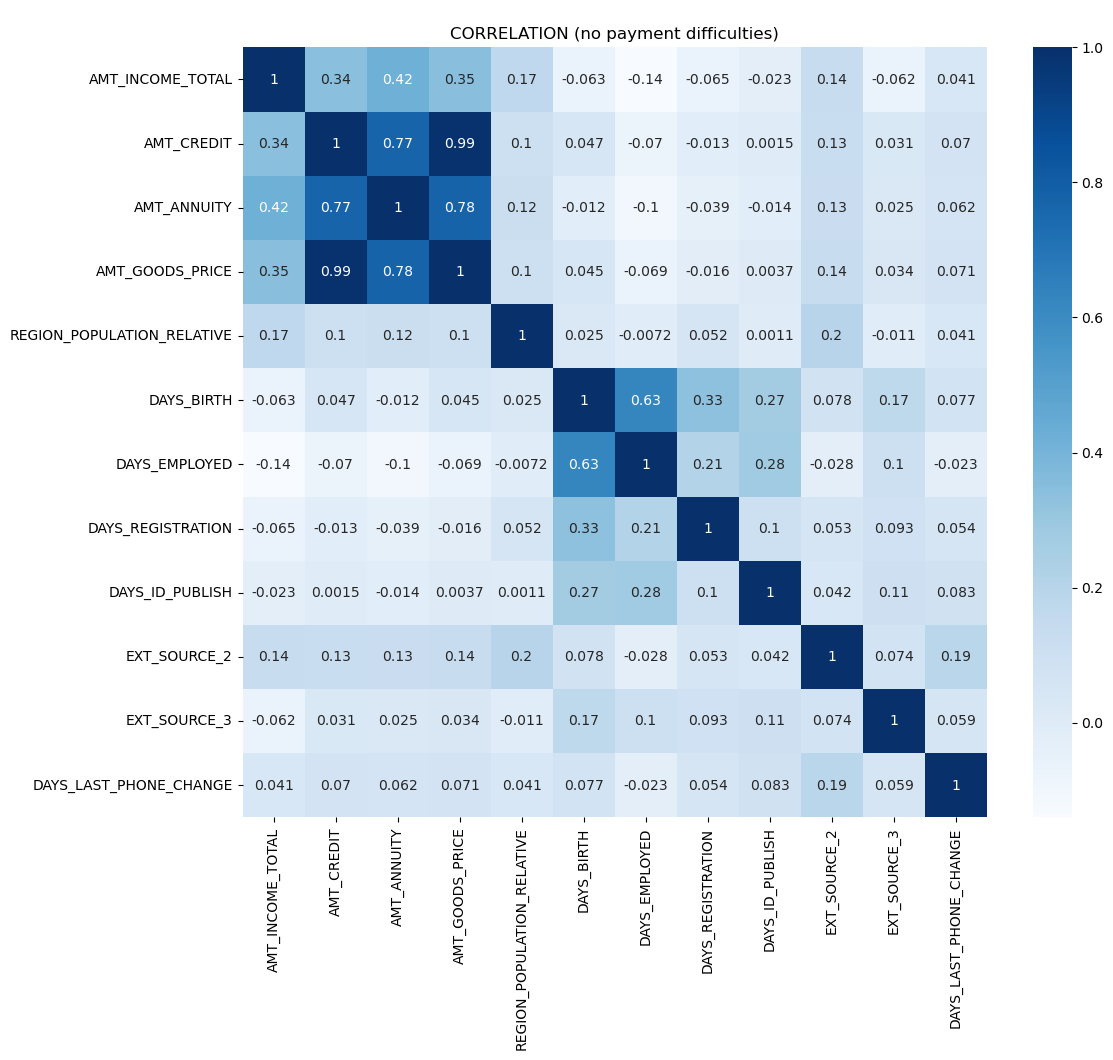

In [59]:
plt.figure(figsize=(12,10))
sns.heatmap(data=non_defaulter[int_col].corr(),cmap="Blues",annot=True)
plt.title('\nCORRELATION (no payment difficulties)')
plt.show()

### Correlation of clients having payment difficulties (DEFAULTERS)

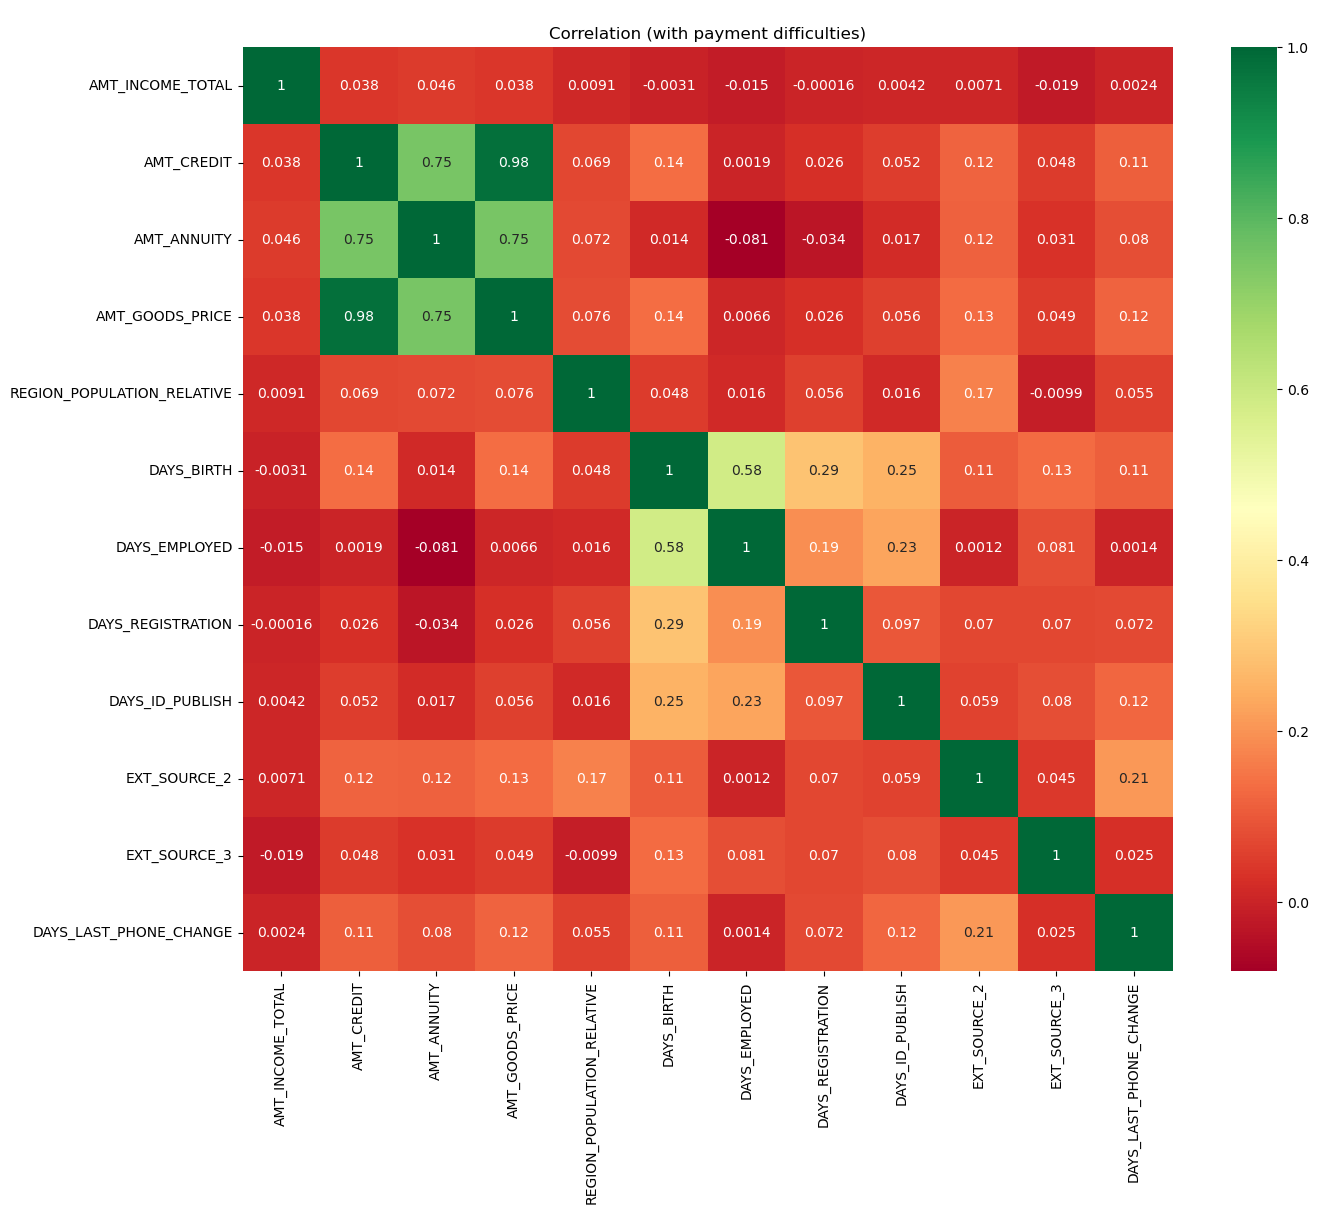

In [60]:
plt.figure(figsize=(15,12))
sns.heatmap(data=defaulter[int_col].corr(),cmap="RdYlGn",annot=True)
plt.title("\nCorrelation (with payment difficulties)")
plt.show()

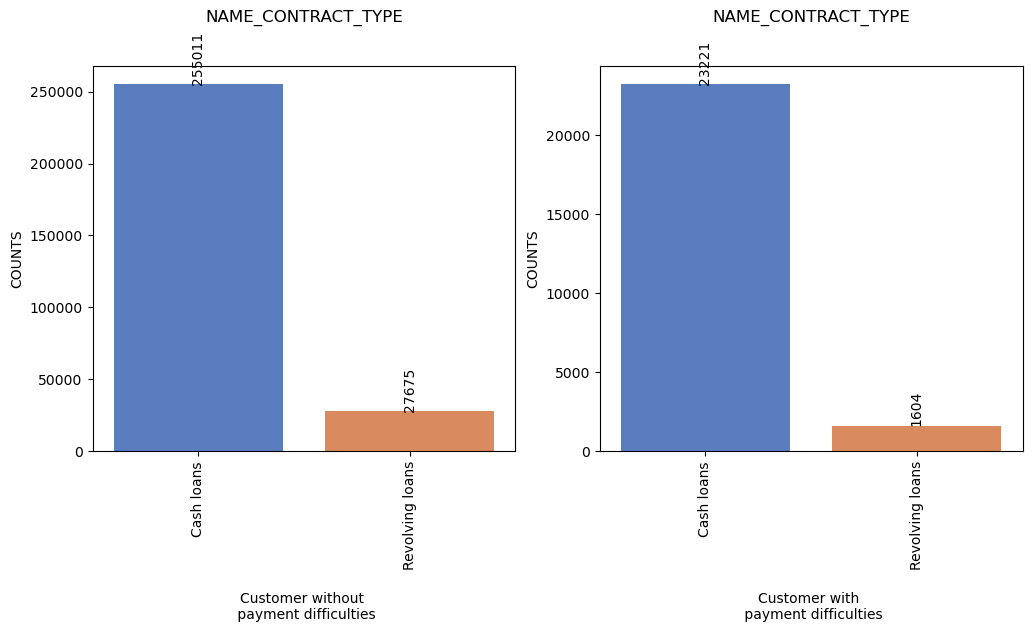

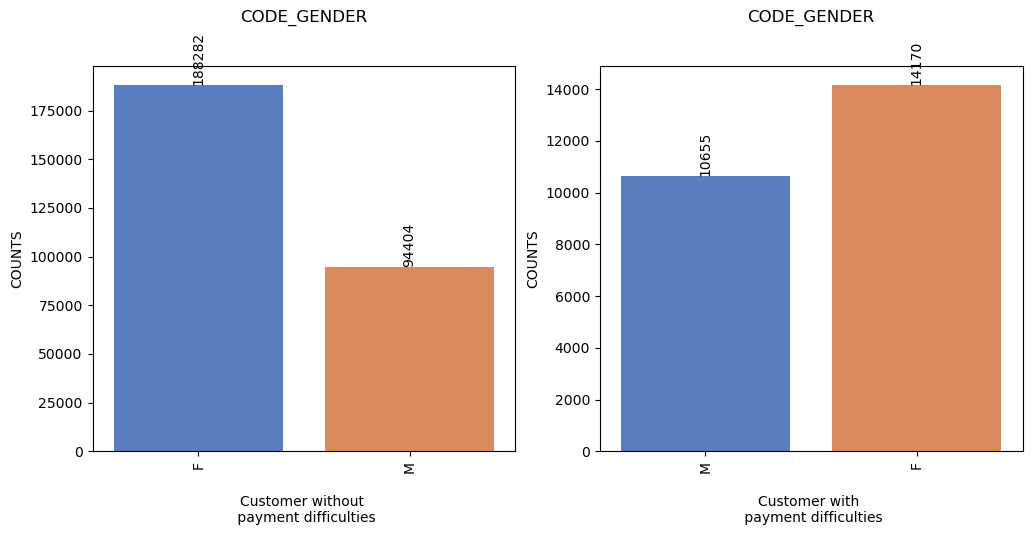

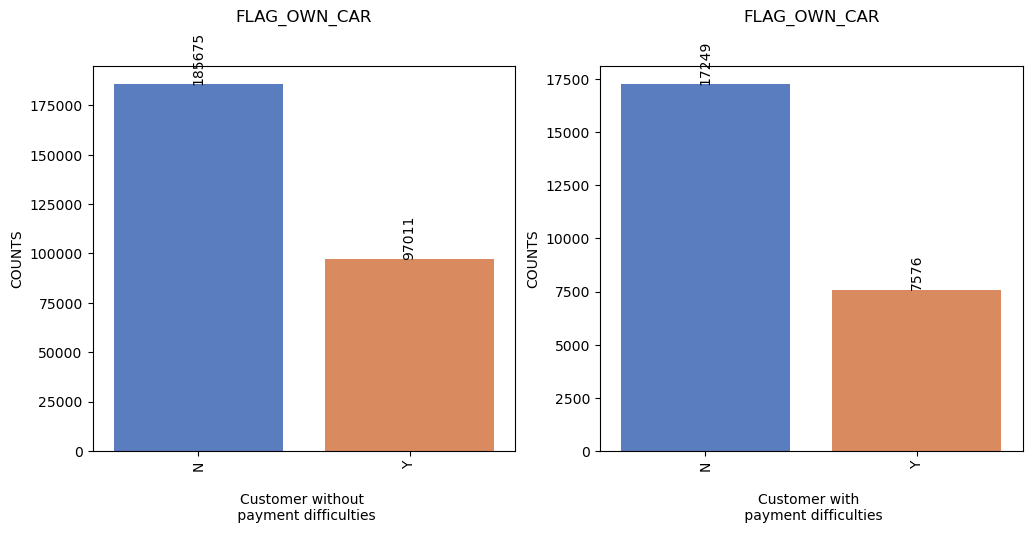

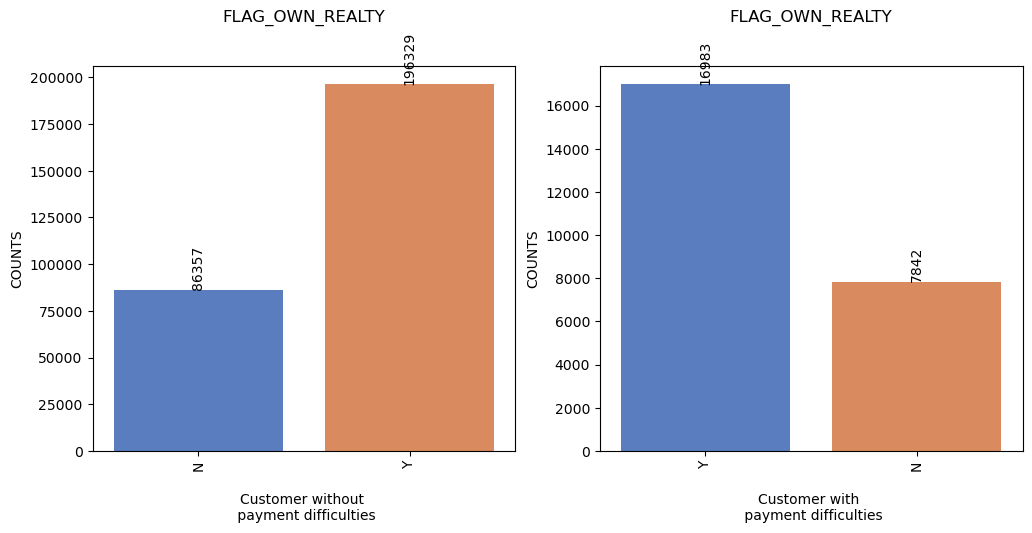

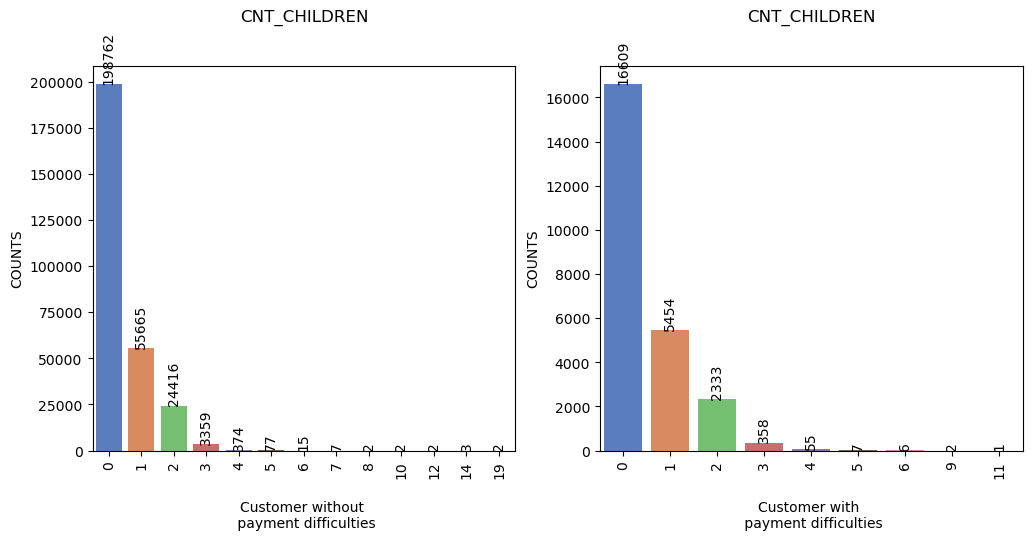

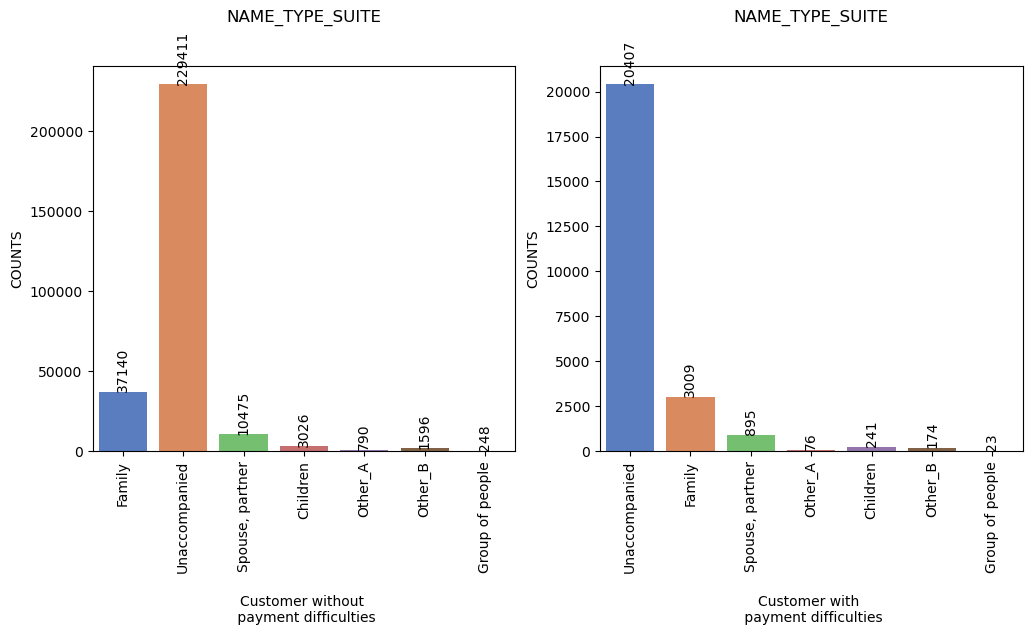

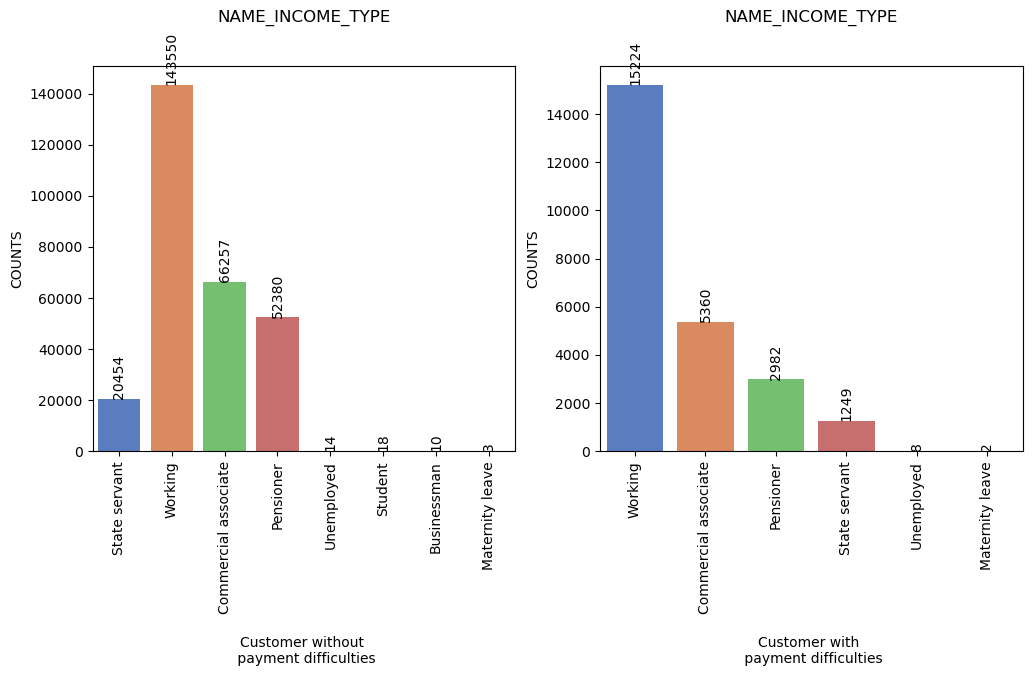

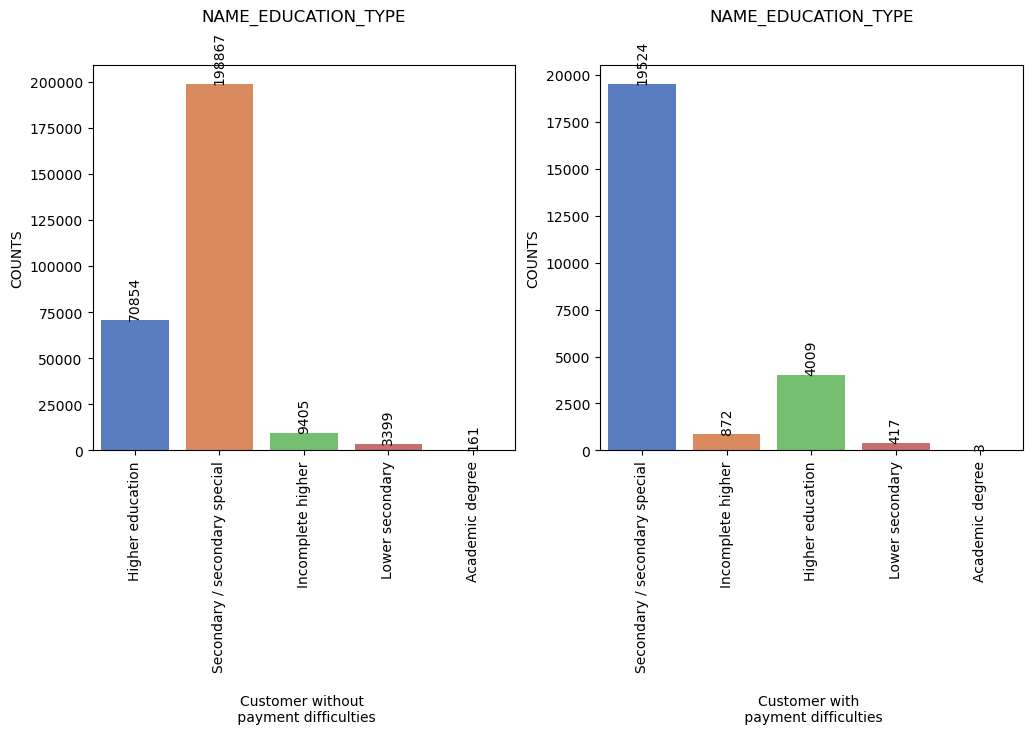

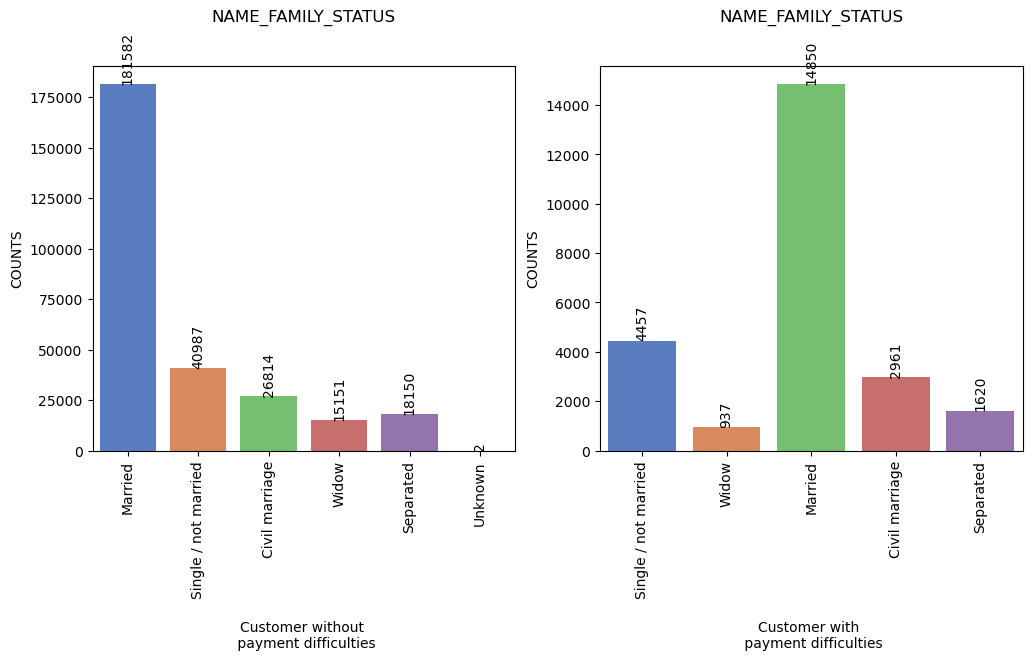

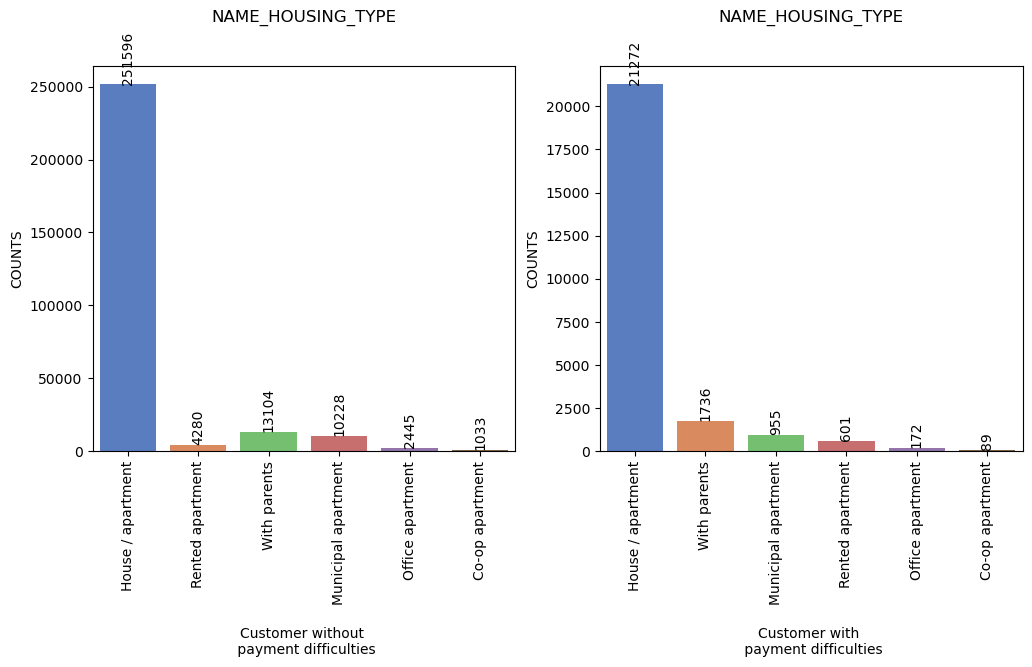

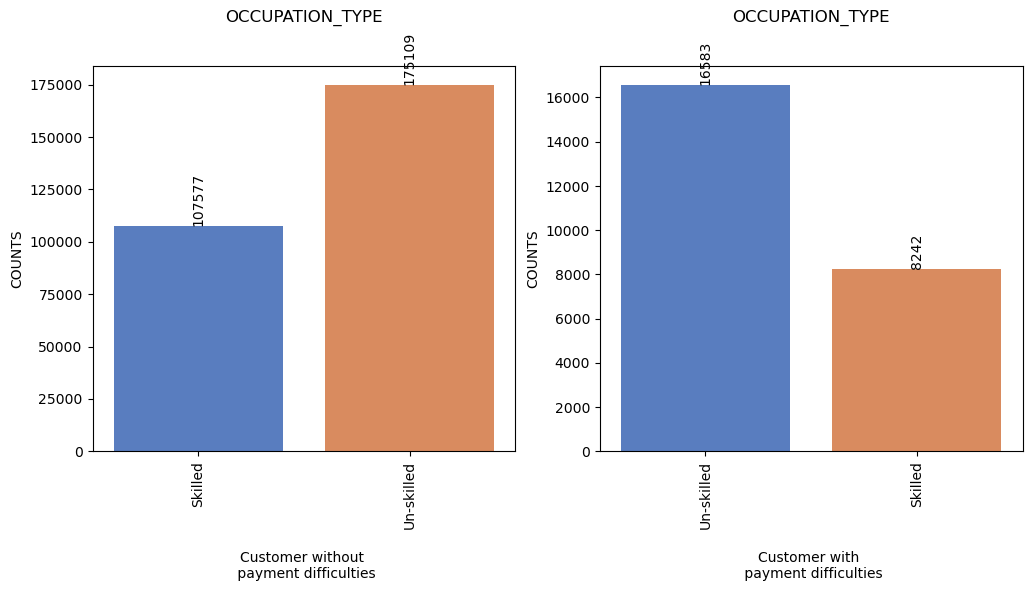

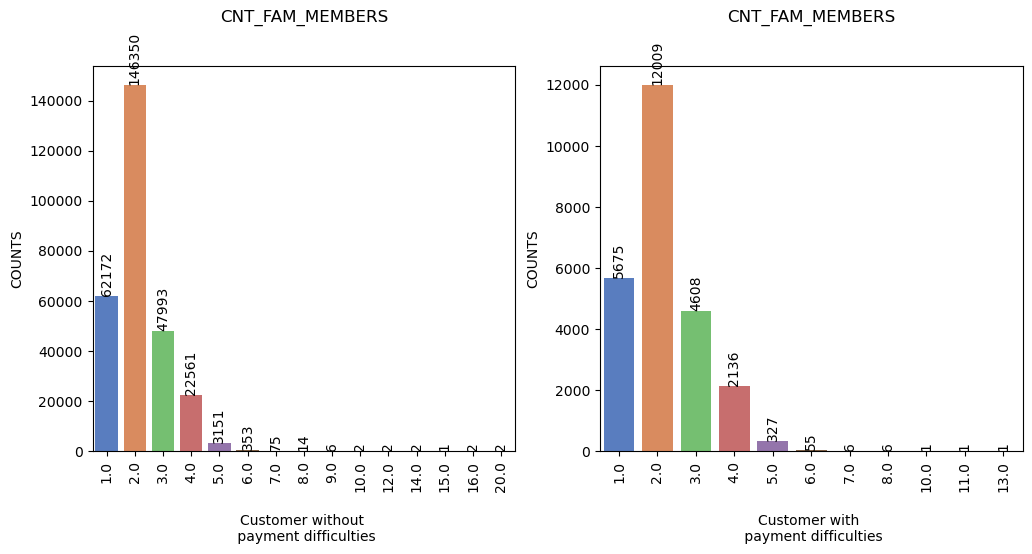

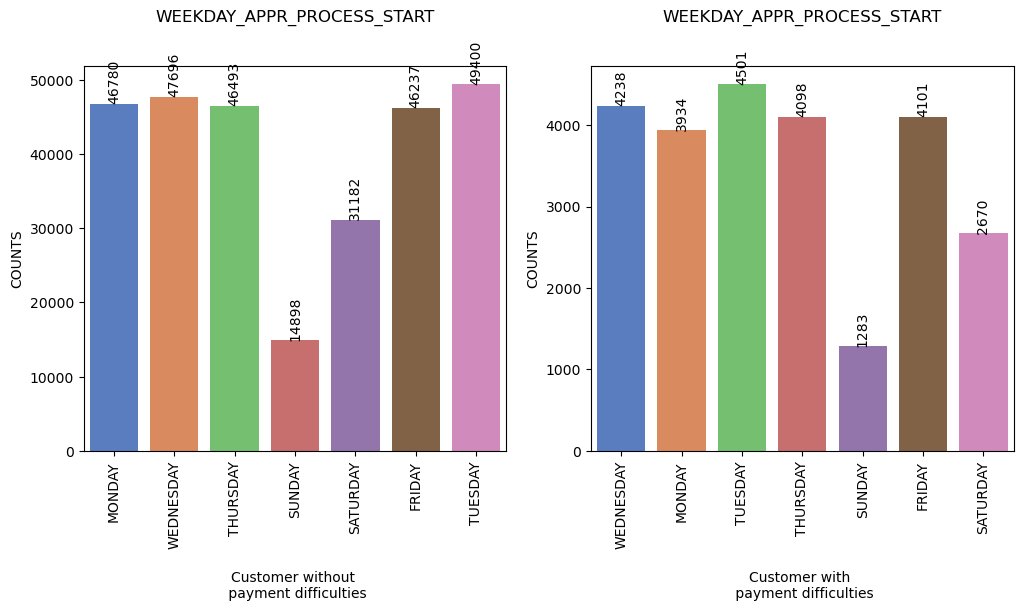

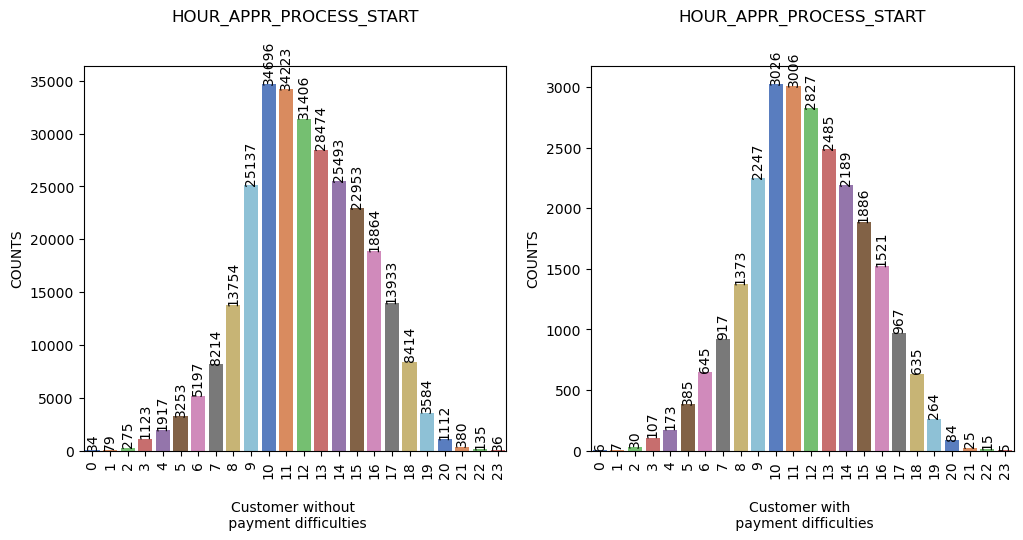

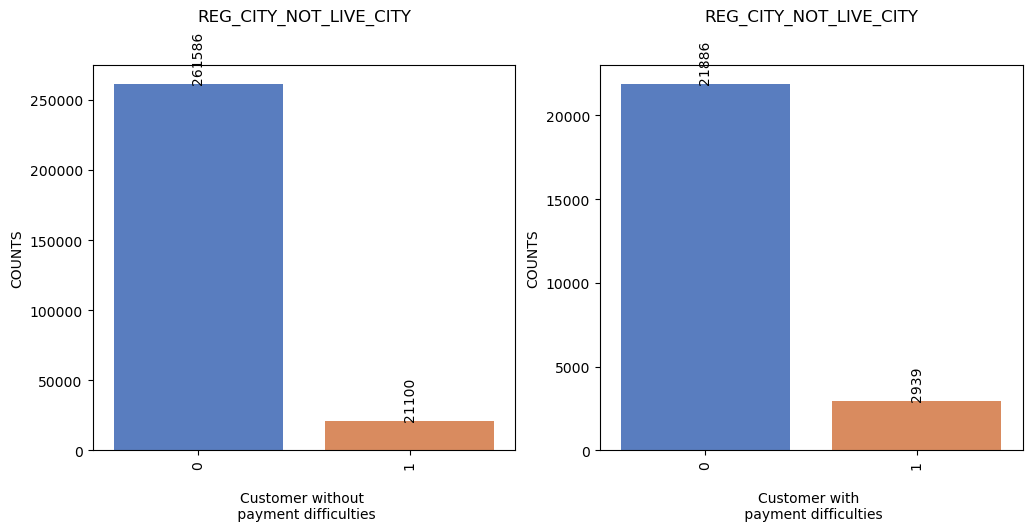

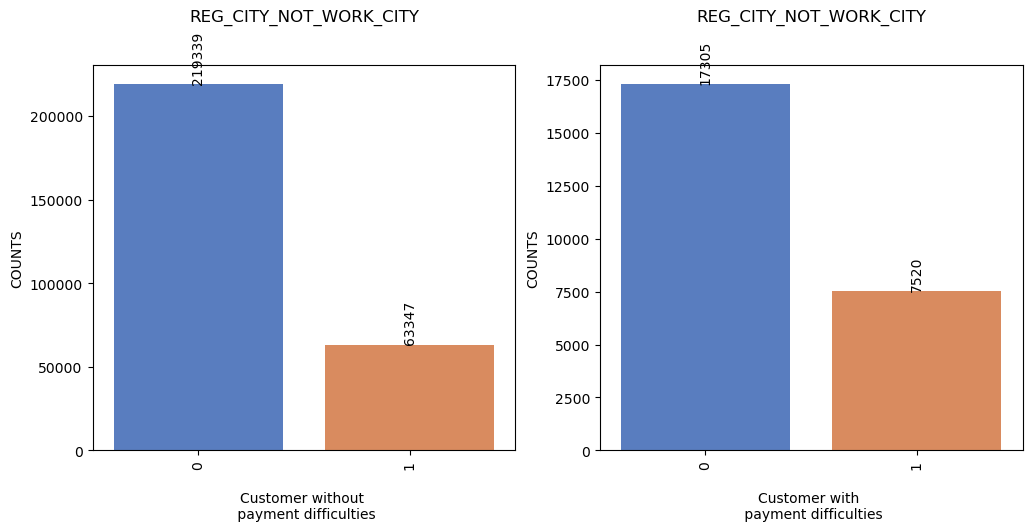

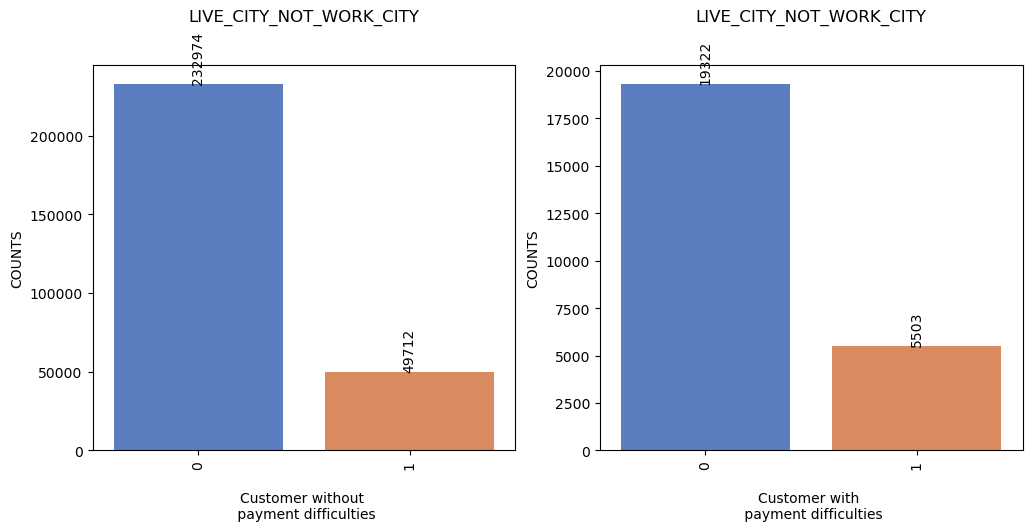

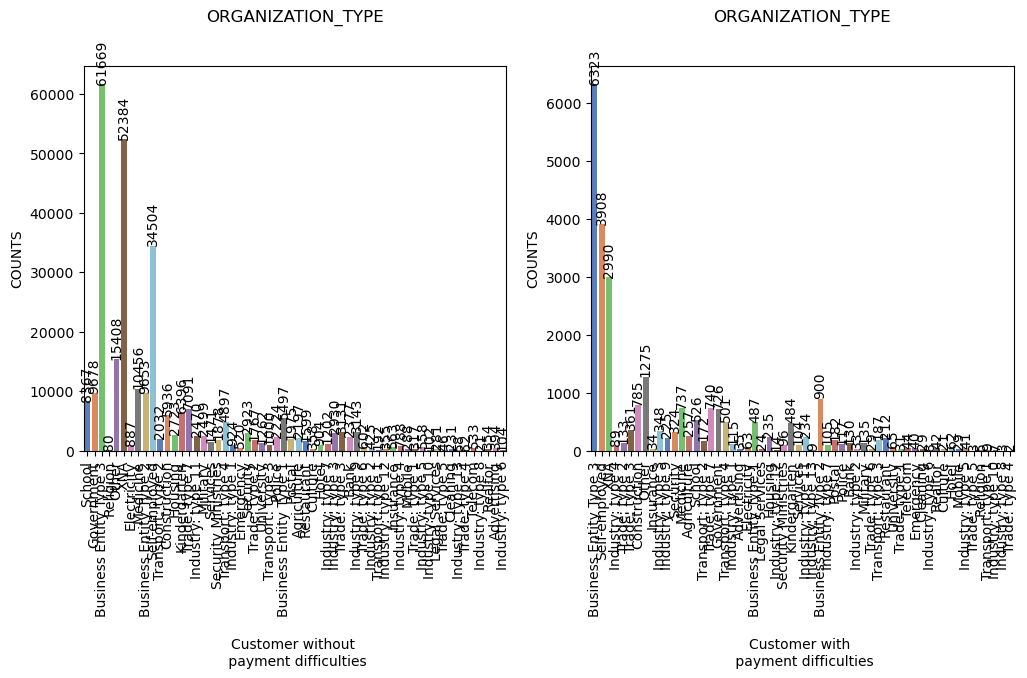

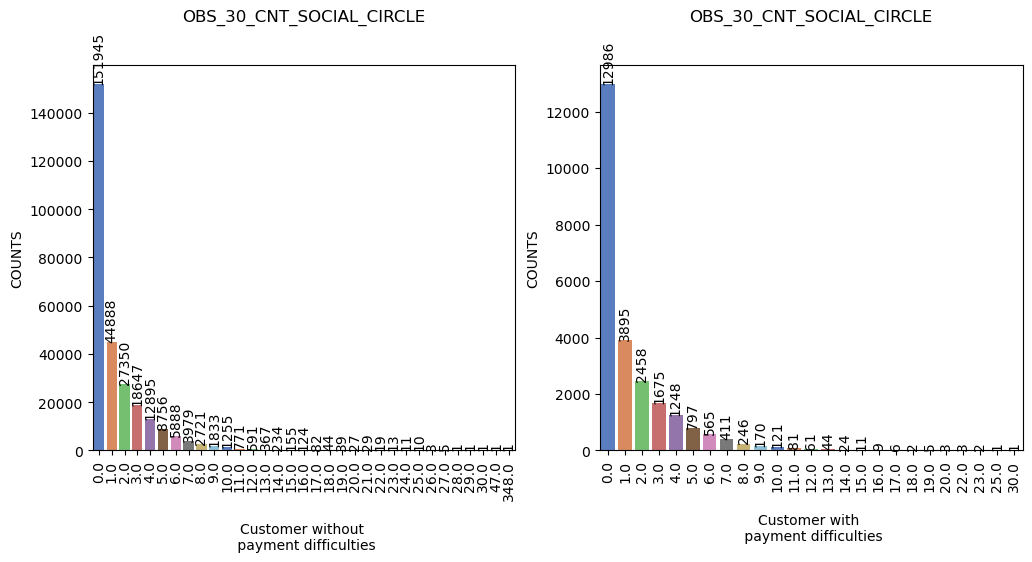

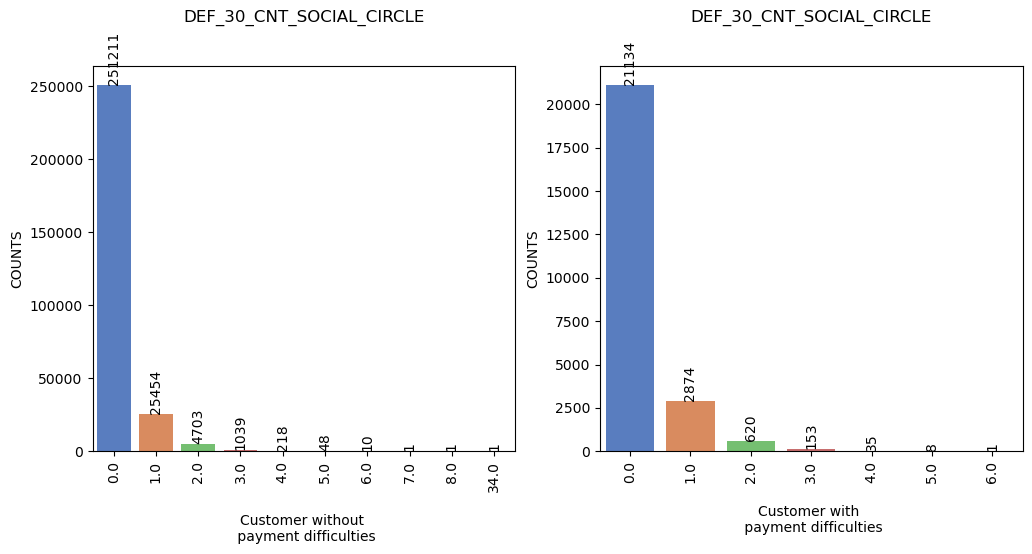

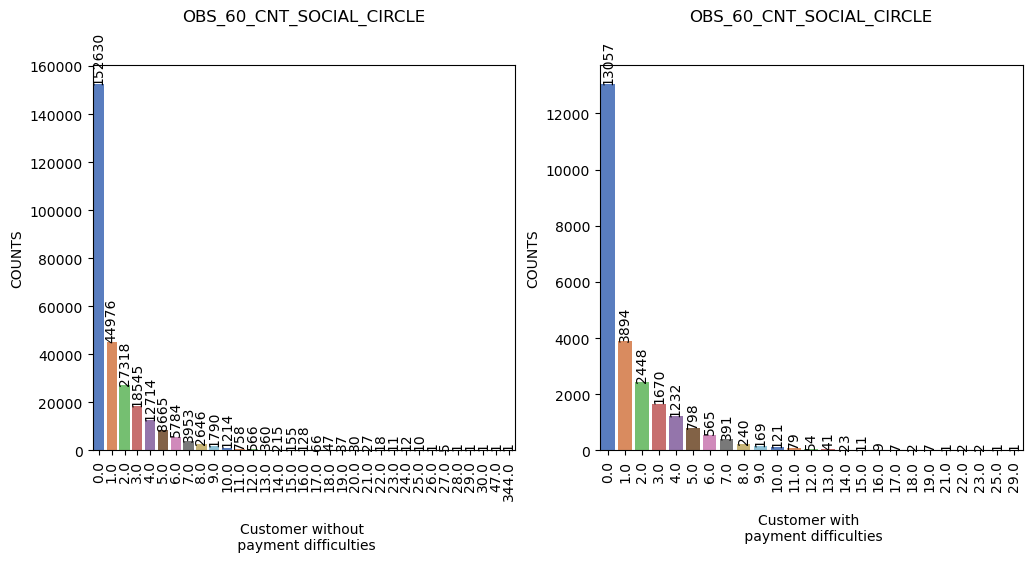

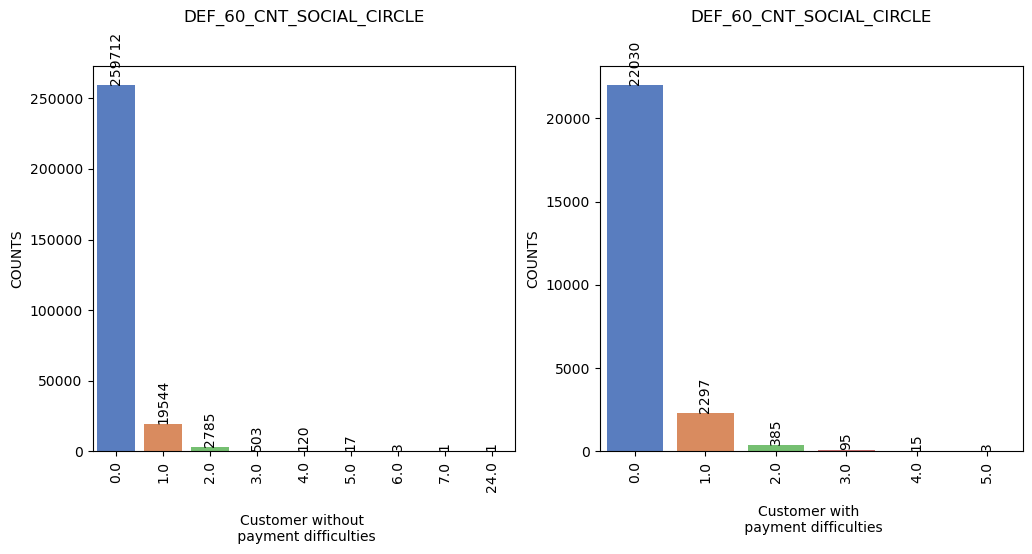

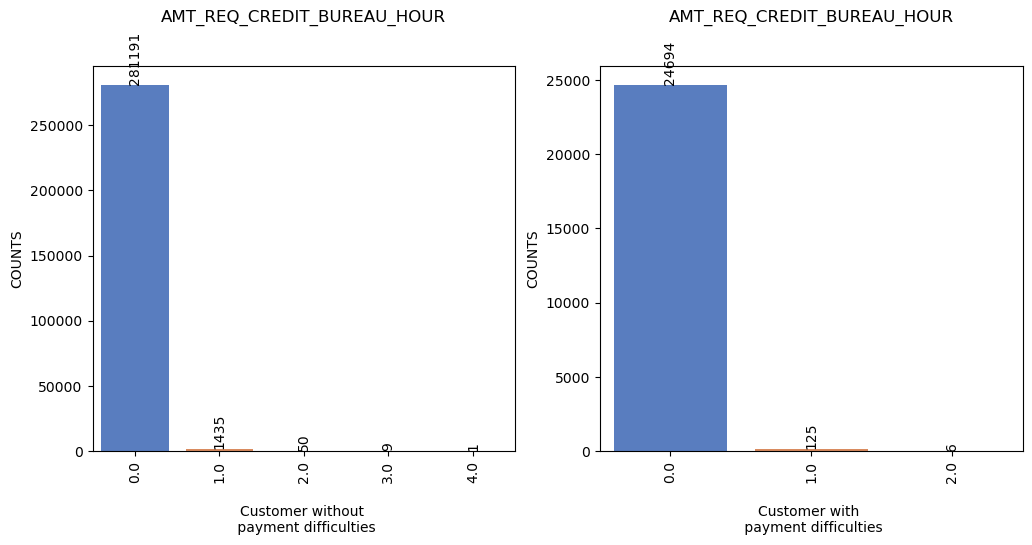

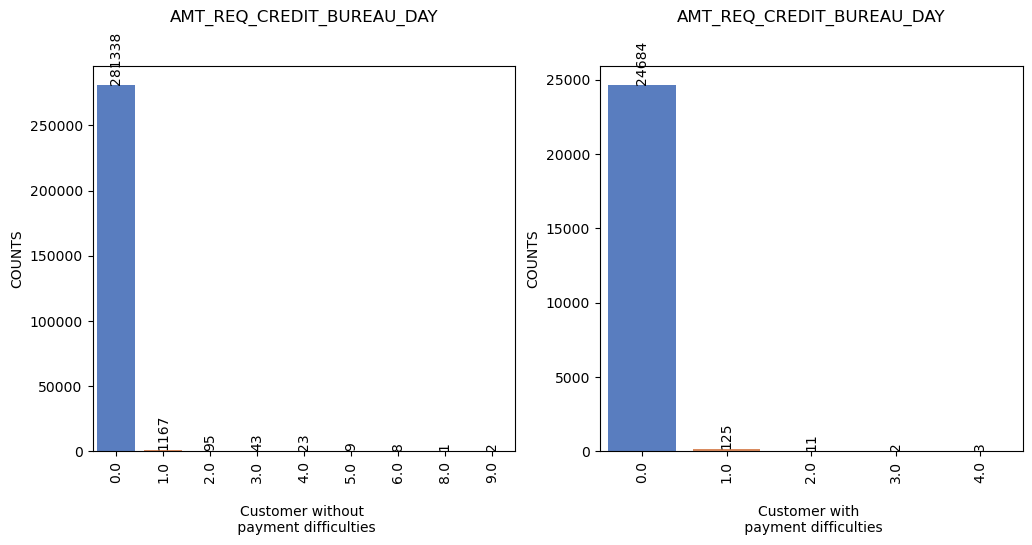

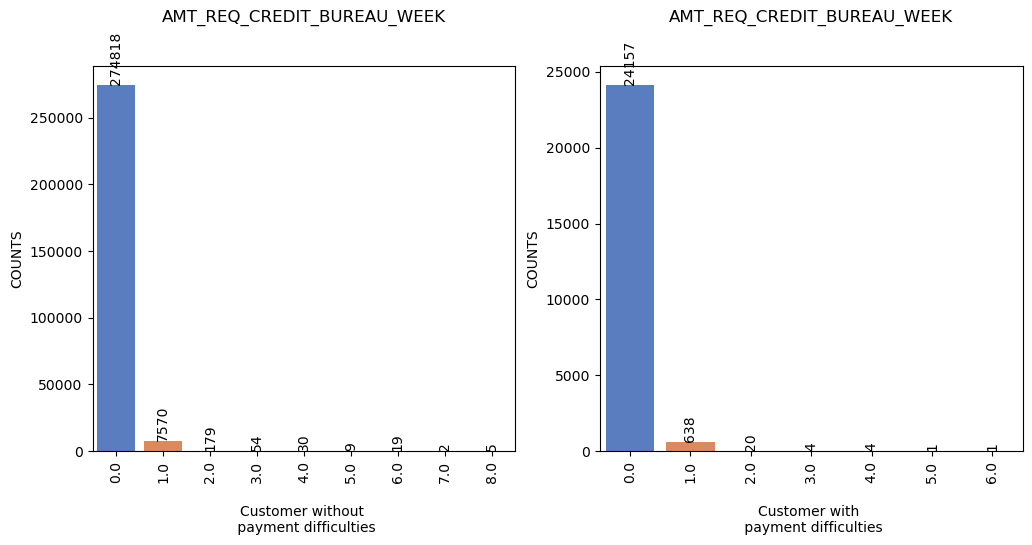

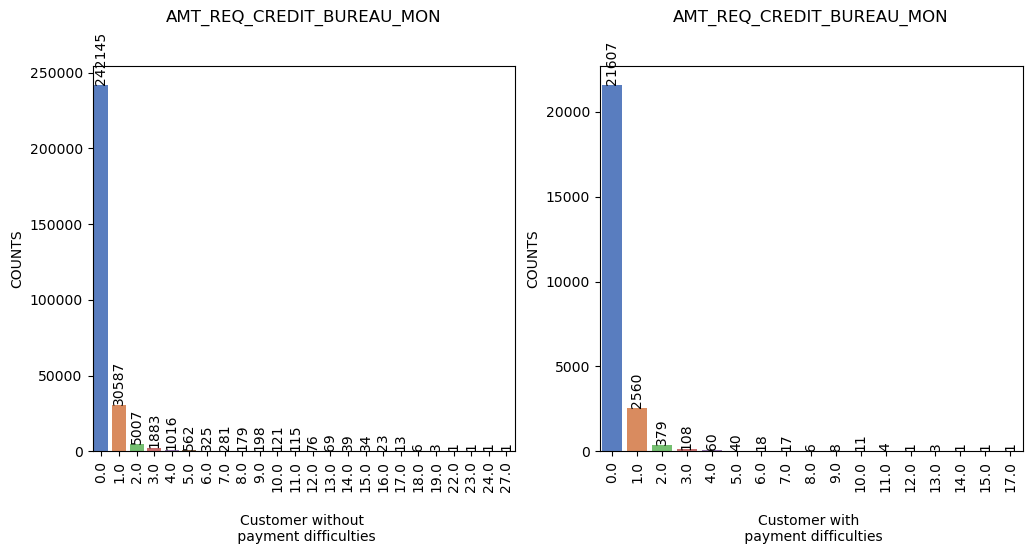

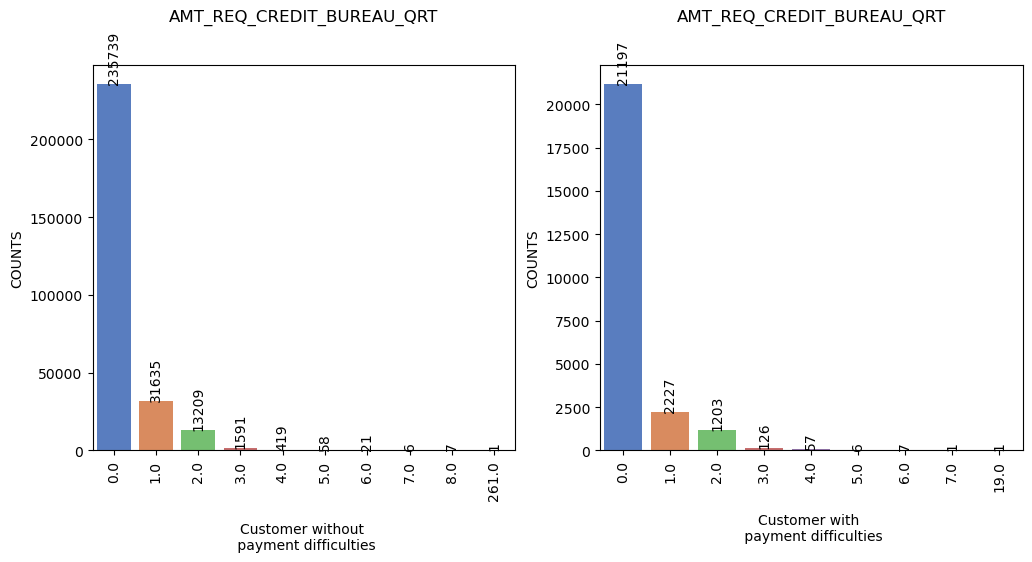

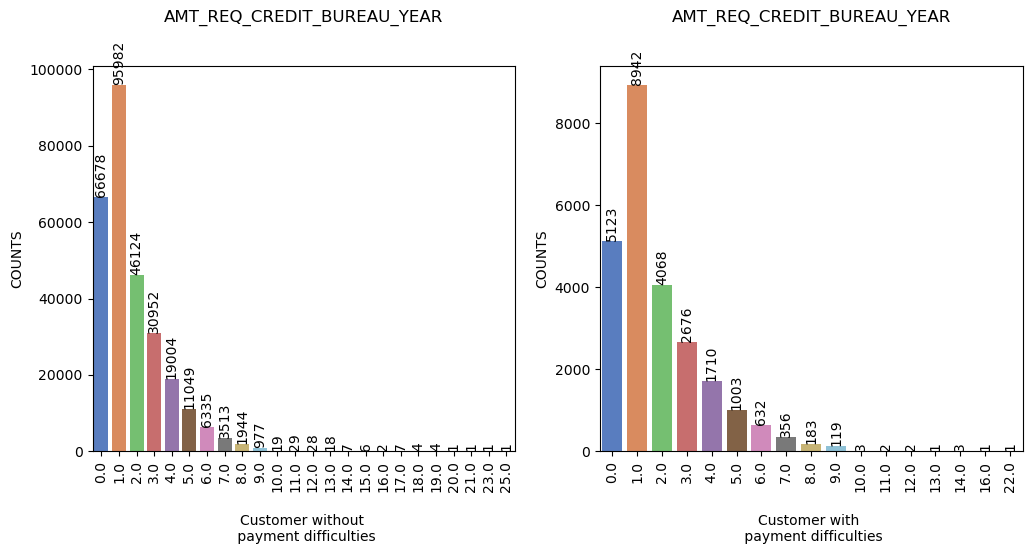

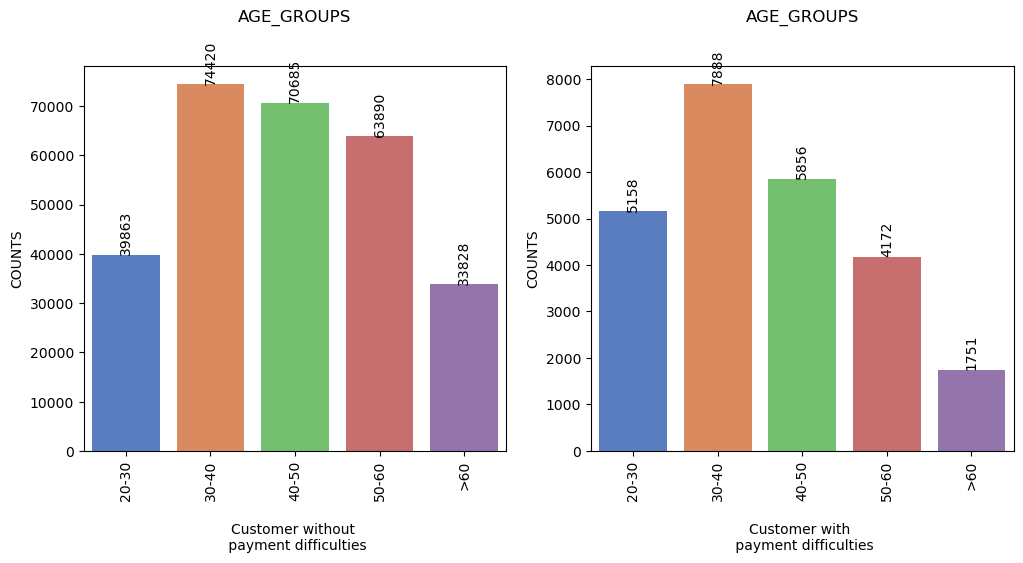

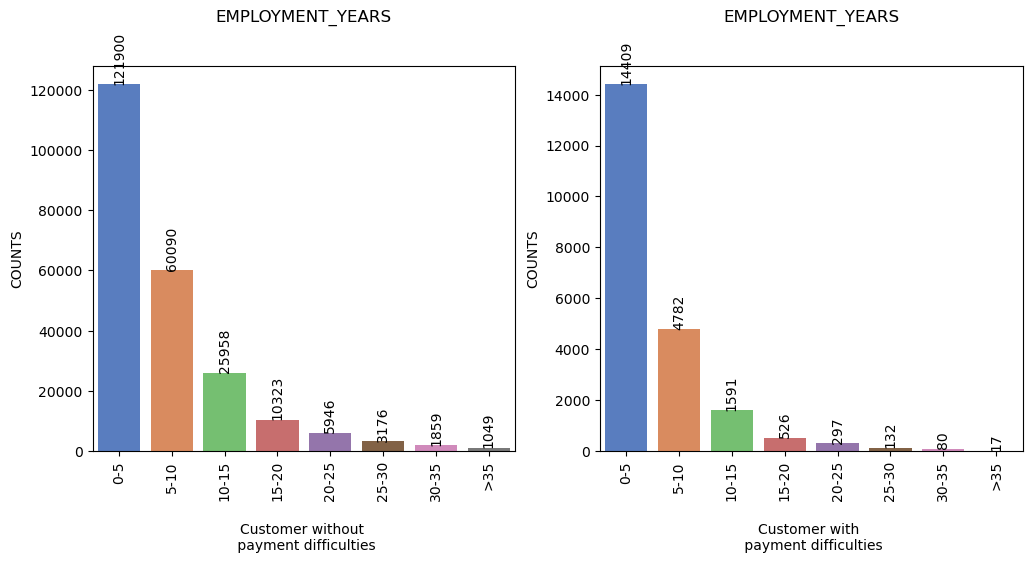

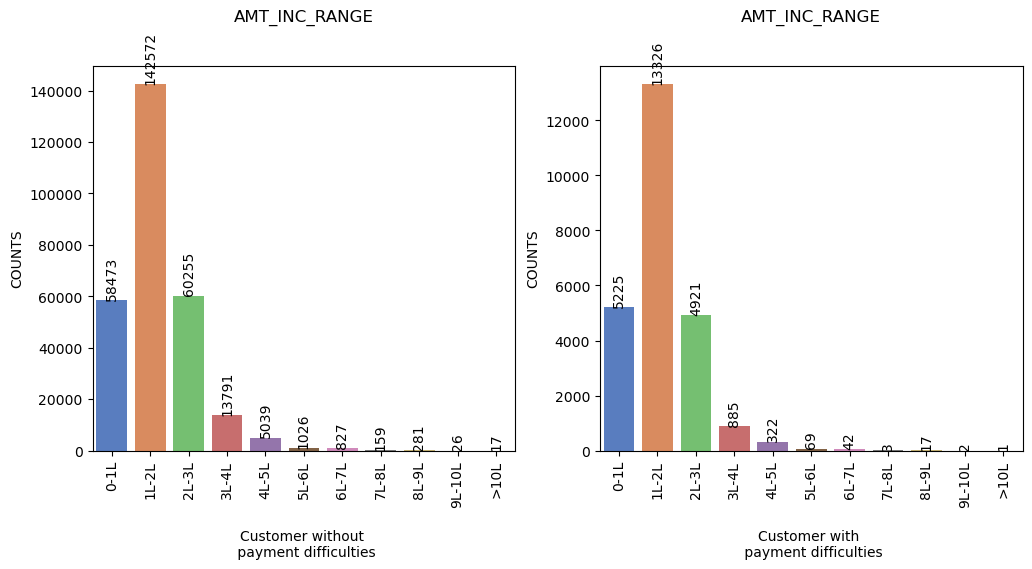

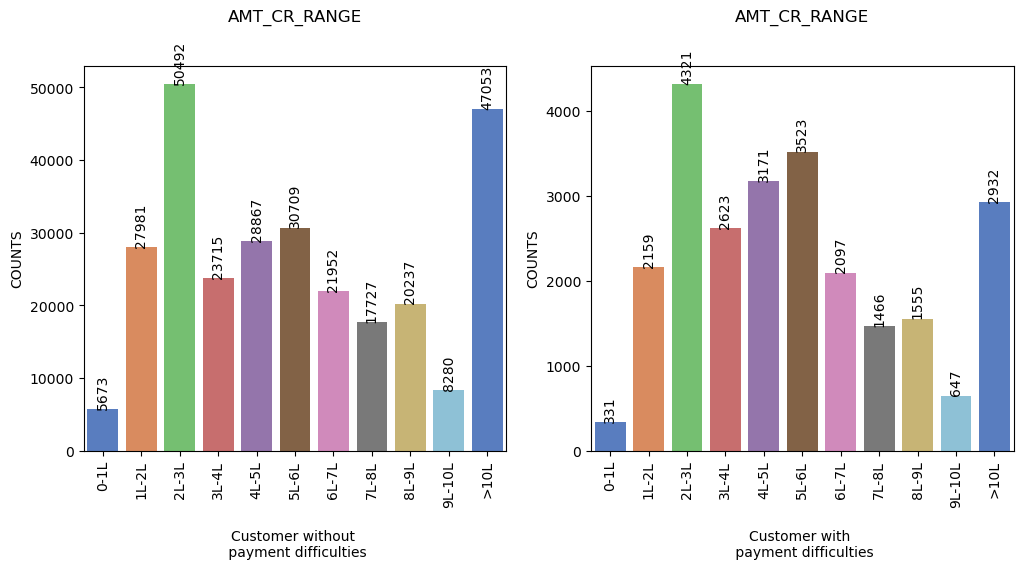

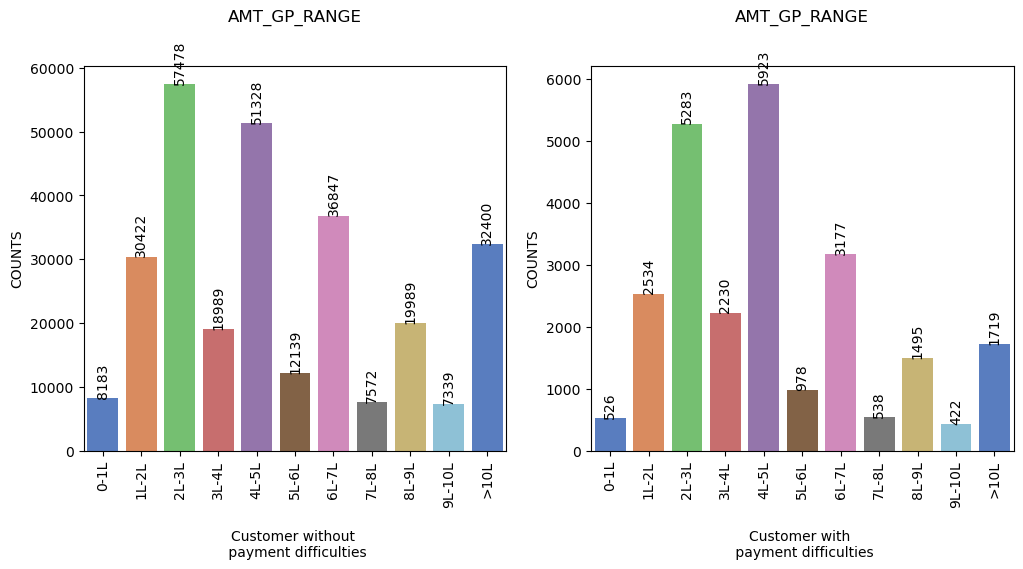

In [61]:

for i in obj_col :
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    ax=sns.countplot(data=non_defaulter,x=i,palette='muted')
    plt.xlabel("\nCustomer without \n payment difficulties")
    for x in ax.containers:
        ax.bar_label(x,rotation=90)
    plt.xticks(rotation=90)
    plt.title(i+"\n\n")
    plt.ylabel("COUNTS")
    plt.subplot(1,2,2)
    ax=sns.countplot(data=defaulter,x=i,palette='muted')
    plt.xlabel("\nCustomer with \n payment difficulties")
    for x in ax.containers:
        ax.bar_label(x, rotation=90)
    plt.xticks(rotation=90)
    plt.title(i+"\n\n")
    plt.ylabel("COUNTS")
    plt.show()

## Let's have a look on dataset 2 - 'Previous_application'

In [62]:
prev = pd.read_csv('previous_application.csv')

#### Understanding the dataset

In [63]:
# checking the SIZE of dataset, that are, rows and columns:

prev.shape

(1670214, 37)

In [64]:
# checking INFO of dataset:

prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [65]:
# checking top rows of the dataset for better understanding:

prev.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [66]:
#checking column type of dataset

prev.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

##### Checking null value ratio of the dataset - 'prev'

In [67]:
null_prev=prev.isna().sum().sort_values(ascending=False)/prev.shape[0]*100

In [68]:
null_prev.head(20)

RATE_INTEREST_PRIVILEGED     99.643698
RATE_INTEREST_PRIMARY        99.643698
AMT_DOWN_PAYMENT             53.636480
RATE_DOWN_PAYMENT            53.636480
NAME_TYPE_SUITE              49.119754
NFLAG_INSURED_ON_APPROVAL    40.298129
DAYS_TERMINATION             40.298129
DAYS_LAST_DUE                40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_FIRST_DUE               40.298129
DAYS_FIRST_DRAWING           40.298129
AMT_GOODS_PRICE              23.081773
AMT_ANNUITY                  22.286665
CNT_PAYMENT                  22.286366
PRODUCT_COMBINATION           0.020716
AMT_CREDIT                    0.000060
NAME_YIELD_GROUP              0.000000
NAME_PORTFOLIO                0.000000
NAME_SELLER_INDUSTRY          0.000000
SELLERPLACE_AREA              0.000000
dtype: float64

### Creating a list of columns with null value ratio more than 50%

In [69]:
null_prev50=(null_prev[null_prev>=50]).index.tolist()
print(len(null_prev50))

4


----- There are 4 columns that can be removed from PREVIOUS APPLICATION Dataset because 50% of their data is null -----

### Removing 4 columns with null value ratio more than 50%

In [70]:
final_prev=prev
final_prev.drop(columns=null_prev50,inplace=True)

##### Let's check the size of dataset after the removal

In [71]:
final_prev.shape

(1670214, 33)

In [72]:
final_prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 33 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

### Let's remove some columns which are not needed in 'final_prev'

In [73]:
unn_prev=['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']

final_prev.drop(columns=unn_prev,inplace=True)

In [74]:
#let's check the shape of dataset
final_prev.shape

(1670214, 29)

In [75]:
#let's impute UNKNOWN in the categorical column
final_prev['NAME_TYPE_SUITE']=final_prev['NAME_TYPE_SUITE'].fillna('Unknown')

In [76]:
final_prev.isnull().sum().sort_values(ascending=False)

NFLAG_INSURED_ON_APPROVAL    673065
DAYS_TERMINATION             673065
DAYS_LAST_DUE                673065
DAYS_LAST_DUE_1ST_VERSION    673065
DAYS_FIRST_DUE               673065
DAYS_FIRST_DRAWING           673065
AMT_GOODS_PRICE              385515
AMT_ANNUITY                  372235
CNT_PAYMENT                  372230
PRODUCT_COMBINATION             346
AMT_CREDIT                        1
NAME_PRODUCT_TYPE                 0
NAME_YIELD_GROUP                  0
NAME_SELLER_INDUSTRY              0
SELLERPLACE_AREA                  0
CHANNEL_TYPE                      0
SK_ID_PREV                        0
NAME_PORTFOLIO                    0
SK_ID_CURR                        0
NAME_CLIENT_TYPE                  0
NAME_TYPE_SUITE                   0
CODE_REJECT_REASON                0
NAME_PAYMENT_TYPE                 0
DAYS_DECISION                     0
NAME_CONTRACT_STATUS              0
NAME_CASH_LOAN_PURPOSE            0
AMT_APPLICATION                   0
NAME_CONTRACT_TYPE          

### Let's check if there are any negative value in the dataset

In [77]:
final_prev.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_GOODS_PRICE  DAYS_DECISION  SELLERPLACE_AREA  \
count  1.670213e+06     1.284699e+06   1.670214e+06      1.670214e+06   
mean   1.961140e+05     2.278473e+05  -8.806797e+02      3.139511e+02   
std    3.185746e+05     3.153966e+05   7.790997e+02      7.127443e+03   
min    0.000000e+00     0.000000e+00  -2.922000e+03     -1.000000e+00   
25%    2.416050e+04     5.084100e+04  -1.300000e+03     -1.000000e+00   
50%    8.054100e+04     1.123200e+05  -5.810000e+02      3.000000e+00   
75%    2.164185e+05     2.340000e+05  -2.800000e+02      8.200000e+01   
max    6.905160e+06     6.905160e+06  -1.000000e+00      4.000000e+06   

        CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count  1.297984e+06       997149.000000   997149.000000   
mean   1.605408e+01       342209.855039    13826.269337   
std    1.456729e+01        88916.115834    72444.869708   
min    0.000000e+00        -2922.000000    -2892.000000   
25%    6.000000e+00       365243.000000    -1628.000000   
50%    1.200000e+01       365243.000000     -831.000000   
75%    2.400000e+01       365243.000000     -411.000000   
max    8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.000000  
50%                     0.000000  
75%                     1.000000  
max                     1.000000

#### As seen, there are some columns which have negative values, also these columns contain information related to duration, which therefore, cannot be negative. Let's convert those columns to absolute values

In [78]:
#Converting some required columns to ABSOLUTE VALUES and unit from days to years
final_prev[['DAYS_DECISION','DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION']]=final_prev[['DAYS_DECISION','DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION']].abs()/365

final_prev.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_GOODS_PRICE  DAYS_DECISION  SELLERPLACE_AREA  \
count  1.670213e+06     1.284699e+06   1.670214e+06      1.670214e+06   
mean   1.961140e+05     2.278473e+05   2.412821e+00      3.139511e+02   
std    3.185746e+05     3.153966e+05   2.134520e+00      7.127443e+03   
min    0.000000e+00     0.000000e+00   2.739726e-03     -1.000000e+00   
25%    2.416050e+04     5.084100e+04   7.671233e-01     -1.000000e+00   
50%    8.054100e+04     1.123200e+05   1.591781e+00      3.000000e+00   
75%    2.164185e+05     2.340000e+05   3.561644e+00      8.200000e+01   
max    6.905160e+06     6.905160e+06   8.005479e+00      4.000000e+06   

        CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count  1.297984e+06       997149.000000   997149.000000   
mean   1.605408e+01          937.917963       43.696504   
std    1.456729e+01          242.228754      197.280194   
min    0.000000e+00            0.005479        0.005479   
25%    6.000000e+00         1000.665753        1.301370   
50%    1.200000e+01         1000.665753        2.523288   
75%    2.400000e+01         1000.665753        5.000000   
max    8.400000e+01         1000.665753     1000.665753   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                   96.337982     214.117069        228.782945   
std                   291.523151     407.762582        417.765531   
min                     0.000000       0.005479          0.005479   
25%                     0.704110       1.246575          1.224658   
50%                     2.030137       3.164384          3.208219   
75%                     4.753425       6.624658          6.852055   
max                  1000.665753    1000.665753       1000.665753   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.000000  
50%                     0.000000  
75%                     1.000000  
max                     1.000000

In [79]:
mybins=[0,1,2,3,4,5,6,7,10]

slabs=['1','2','3','4','5','6','7','>7']

final_prev['YEARLY_DECISION']=pd.cut(final_prev['DAYS_DECISION'],mybins,labels=slabs)

In [80]:
final_prev['YEARLY_DECISION'].value_counts(normalize=True)*100

1     34.351287
2     23.056806
3     12.855598
4      7.883181
5      6.128556
7      5.813806
>7     5.060729
6      4.850037
Name: YEARLY_DECISION, dtype: float64

----- Almost 34-35% loan applicants applied for a new loan within 1 year of previous loan decision. This time frame suggests a relatively short period between the two loan decisions-----

### Checking other columns having null values other than higher null value ratio

In [81]:
null_per=(final_prev.isnull().sum()*100/len(final_prev)).sort_values(ascending=False)
column_null=null_per[null_per>0].sort_values(ascending=False).index.tolist()
column_null

['NFLAG_INSURED_ON_APPROVAL',
 'DAYS_TERMINATION',
 'DAYS_LAST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_FIRST_DUE',
 'DAYS_FIRST_DRAWING',
 'AMT_GOODS_PRICE',
 'AMT_ANNUITY',
 'CNT_PAYMENT',
 'PRODUCT_COMBINATION',
 'AMT_CREDIT']

In [82]:
for i in column_null:
    if final_prev[i].dtype=='object':
        final_prev[i]=final_prev[i].fillna(final_prev[i].mode()[0])
    else:
        final_prev[i]=final_prev[i].fillna(final_prev[i].median())

##### Let's check if there are any null values left

In [83]:
final_prev.isnull().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
NAME_CONTRACT_TYPE           0
AMT_ANNUITY                  0
AMT_APPLICATION              0
AMT_CREDIT                   0
AMT_GOODS_PRICE              0
NAME_CASH_LOAN_PURPOSE       0
NAME_CONTRACT_STATUS         0
DAYS_DECISION                0
NAME_PAYMENT_TYPE            0
CODE_REJECT_REASON           0
NAME_TYPE_SUITE              0
NAME_CLIENT_TYPE             0
NAME_GOODS_CATEGORY          0
NAME_PORTFOLIO               0
NAME_PRODUCT_TYPE            0
CHANNEL_TYPE                 0
SELLERPLACE_AREA             0
NAME_SELLER_INDUSTRY         0
CNT_PAYMENT                  0
NAME_YIELD_GROUP             0
PRODUCT_COMBINATION          0
DAYS_FIRST_DRAWING           0
DAYS_FIRST_DUE               0
DAYS_LAST_DUE_1ST_VERSION    0
DAYS_LAST_DUE                0
DAYS_TERMINATION             0
NFLAG_INSURED_ON_APPROVAL    0
YEARLY_DECISION              0
dtype: int64

### Let's see proportions of previous loan applications approval status

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64
Approved        62.074740
Canceled        18.938831
Refused         17.403638
Unused offer     1.582791
Name: NAME_CONTRACT_STATUS, dtype: float64


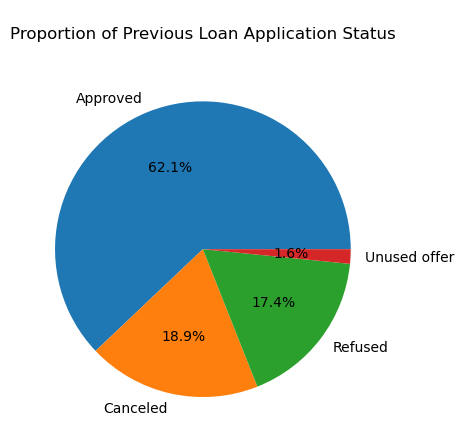

In [84]:
print(final_prev['NAME_CONTRACT_STATUS'].value_counts())
Approved_Ratio=final_prev['NAME_CONTRACT_STATUS'].value_counts(normalize=True)*100
print(Approved_Ratio)
plt.pie(Approved_Ratio,labels=final_prev["NAME_CONTRACT_STATUS"].value_counts().index.to_list(),autopct='%1.1f%%')
plt.title("\nProportion of Previous Loan Application Status\n")
plt.show()

#### Let's filter out approved applications from previous approved applications

In [85]:
final_prev=final_prev[final_prev.NAME_CONTRACT_STATUS=='Approved']
final_prev.shape

(1036781, 30)

#### Let's find out common columns from both dataset -  'new_appl' & 'final_prev'

In [86]:
common_col=list(set(new_appl.columns.tolist()).intersection(set(final_prev.columns.tolist())))

In [87]:
#removing the column which will be used as primary key as it is unique
common_col.remove('SK_ID_CURR')

#### Removing duplicate columns from 'final_prev'

In [88]:
final_prev=final_prev.drop(columns=common_col)

### Finding outliers

In [89]:
final_prev.describe()

SK_ID_PREV    SK_ID_CURR  AMT_APPLICATION  DAYS_DECISION  \
count  1.036781e+06  1.036781e+06     1.036781e+06   1.036781e+06   
mean   1.903648e+06  2.782418e+05     1.805670e+05   3.015779e+00   
std    5.355669e+05  1.027971e+05     2.536188e+05   2.168593e+00   
min    1.000001e+06  1.000010e+05     0.000000e+00   2.739726e-03   
25%    1.435012e+06  1.892590e+05     4.500000e+04   1.260274e+00   
50%    1.896641e+06  2.784470e+05     9.000000e+04   2.361644e+00   
75%    2.368895e+06  3.672990e+05     1.963395e+05   4.498630e+00   
max    2.843499e+06  4.562550e+05     5.850000e+06   8.005479e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.036781e+06  1.036781e+06        1.036781e+06    1.036781e+06   
mean       4.384161e+02  1.412205e+01        9.403166e+02    4.212262e+01   
std        9.013632e+03  1.196325e+01        2.378584e+02    1.936338e+02   
min       -1.000000e+00  0.000000e+00        5.479452e-03    5.479452e-03   
25%       -1.000000e+00  6.000000e+00        1.000666e+03    1.345205e+00   
50%        3.400000e+01  1.200000e+01        1.000666e+03    2.523288e+00   
75%        1.540000e+02  1.800000e+01        1.000666e+03    4.857534e+00   
max        4.000000e+06  8.400000e+01        1.000666e+03    1.000666e+03   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count               1.036781e+06   1.036781e+06      1.036781e+06   
mean                9.273297e+01   2.060532e+02      2.201601e+02   
std                 2.864683e+02   4.019335e+02      4.119797e+02   
min                 0.000000e+00   5.479452e-03      5.479452e-03   
25%                 7.397260e-01   1.304110e+00      1.287671e+00   
50%                 2.030137e+00   3.164384e+00      3.208219e+00   
75%                 4.608219e+00   6.465753e+00      6.665753e+00   
max                 1.000666e+03   1.000666e+03      1.000666e+03   

       NFLAG_INSURED_ON_APPROVAL  
count               1.036781e+06  
mean                3.198573e-01  
std                 4.664213e-01  
min                 0.000000e+00  
25%                 0.000000e+00  
50%                 0.000000e+00  
75%                 1.000000e+00  
max                 1.000000e+00

In [90]:
#let's separate those columns having outliers
outliers_prev=['AMT_APPLICATION','SELLERPLACE_AREA','DAYS_DECISION','CNT_PAYMENT']

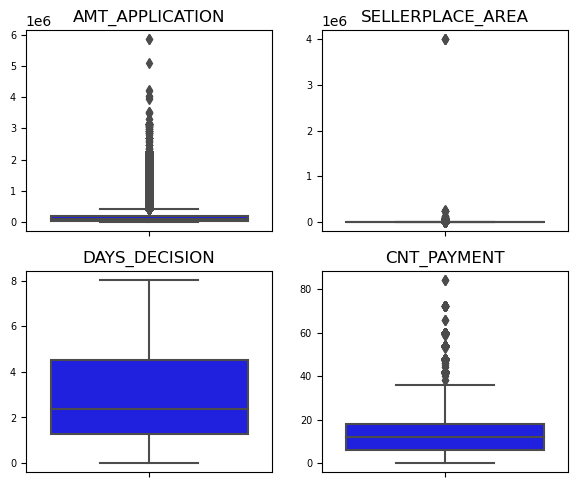

In [91]:
plt.figure(figsize=[7,12])
#Iterate over columns and their corresponding index using enumerate
for j,i in enumerate(outliers_prev):
    
#Creating subplots in a 4x2 grid   
    plt.subplot(4, 2, j + 1)
    
#Creating a horizontal boxplot   
    sns.boxplot(y=final_prev[i] , color="blue")
    plt.yticks(fontsize=7)
    
#Setting x-axis label to an empty string    
    plt.xlabel("")
    
#Setting y-axis label to an empty string    
    plt.ylabel("")
    
#Setting the title of the subplot to the column name    
    plt.title(i)  
    
plt.show()

#### We can observe and understand the following things from these boxplots:

=> 1. DAYS_DECISION have no outliers as it has been dealt with.

=> 2. CNT_PAYMENT, AMT_APPLICATION have some outliers.

=> 3. SELLERPLACE_AREA has high number of outlier.

## Merging new_appl and final_prev for further analysis

In [92]:
merged_data=pd.merge(left=new_appl,right=final_prev,how="inner",on="SK_ID_CURR")

In [93]:
new_obj=merged_data.select_dtypes(["category","object"]).columns.to_list()
new_int=merged_data.select_dtypes(["int","float"]).columns.to_list()

1)


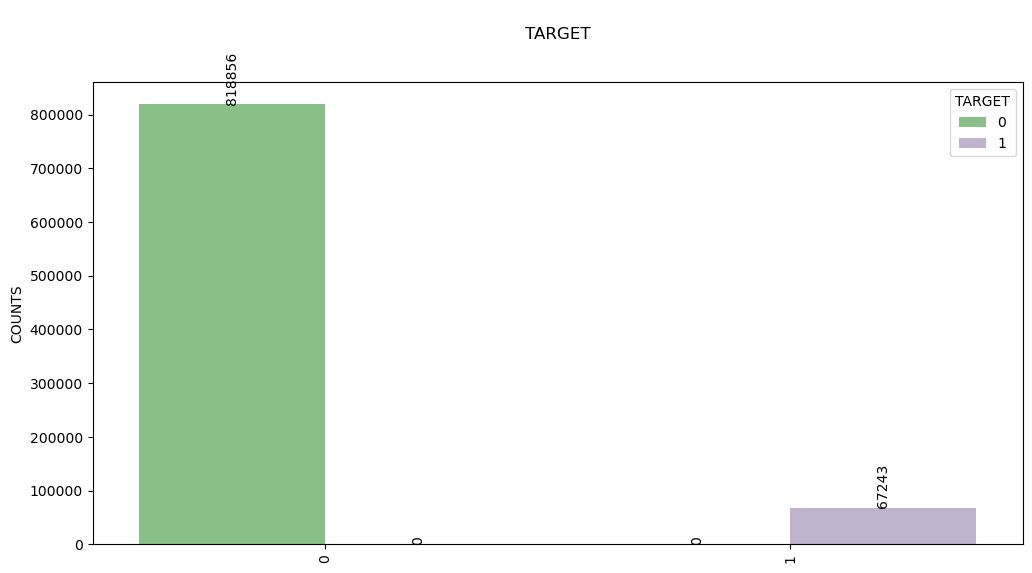

2)


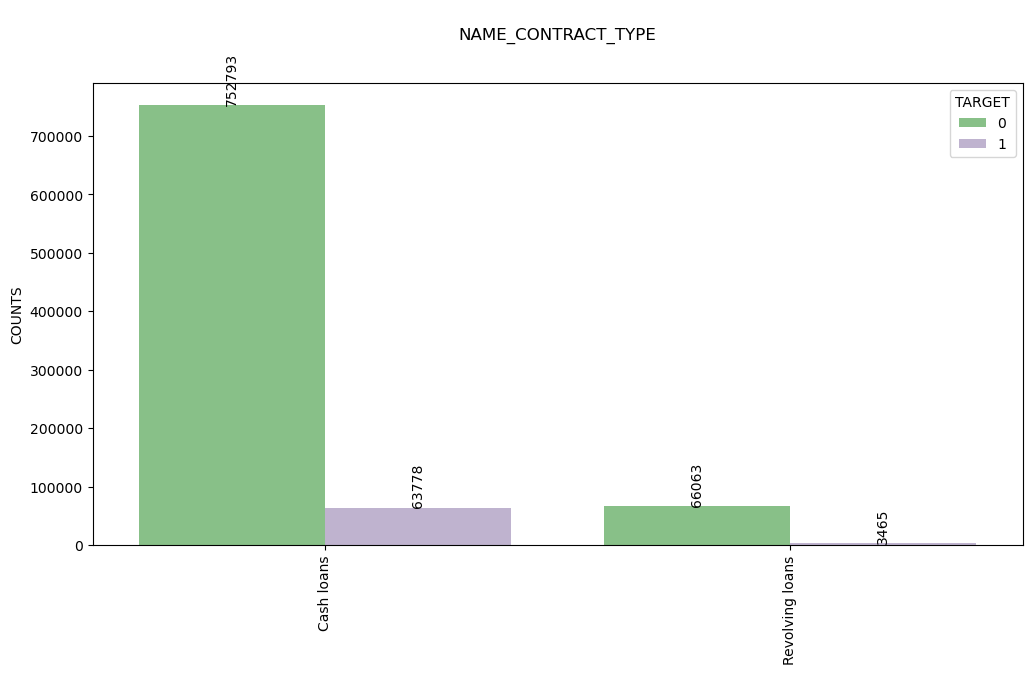

3)


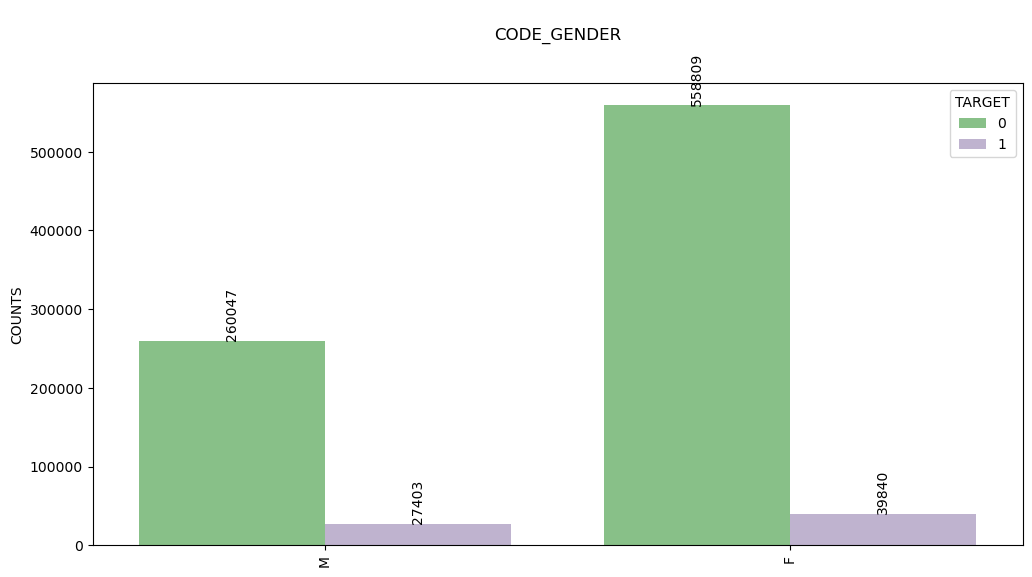

4)


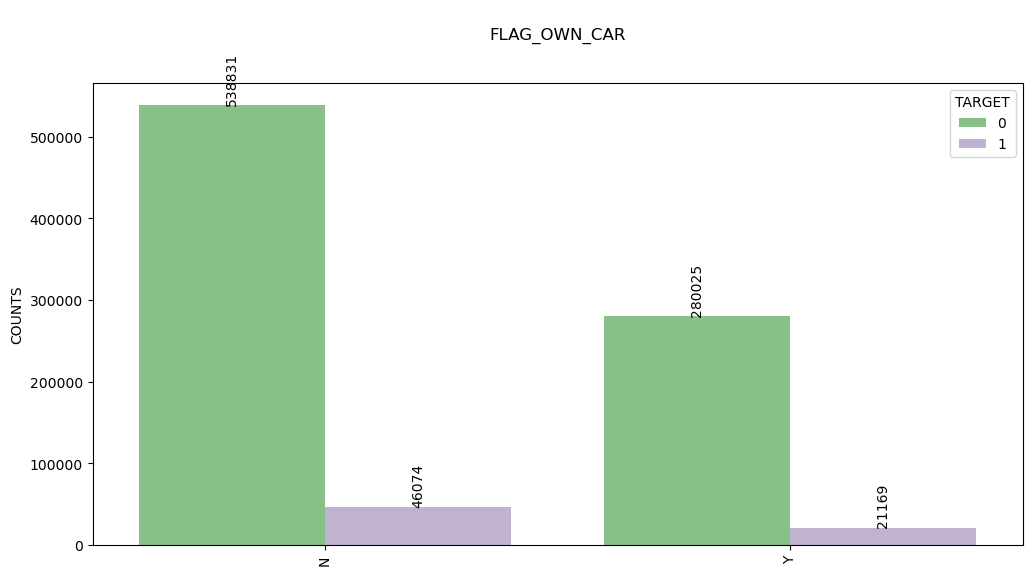

5)


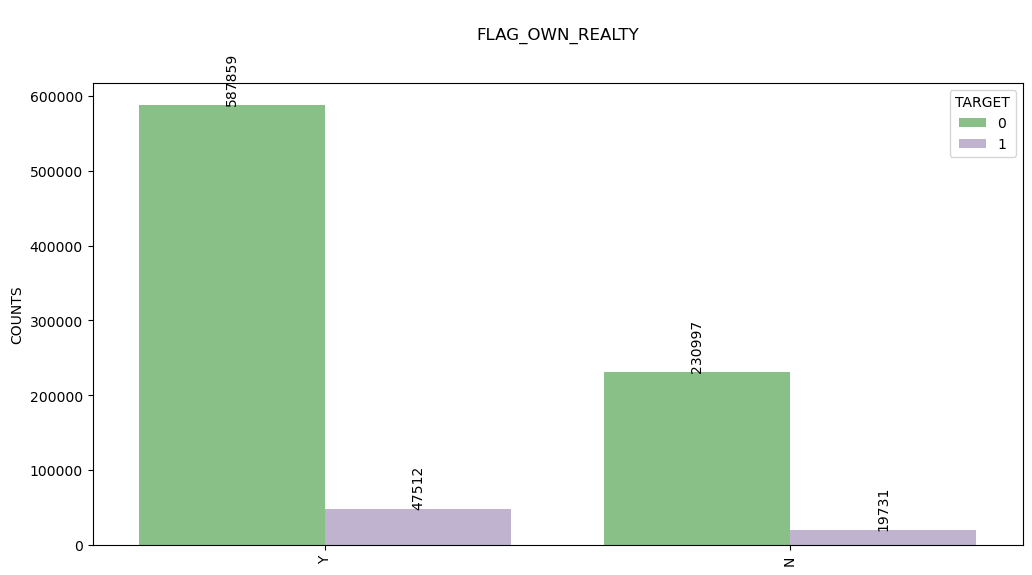

6)


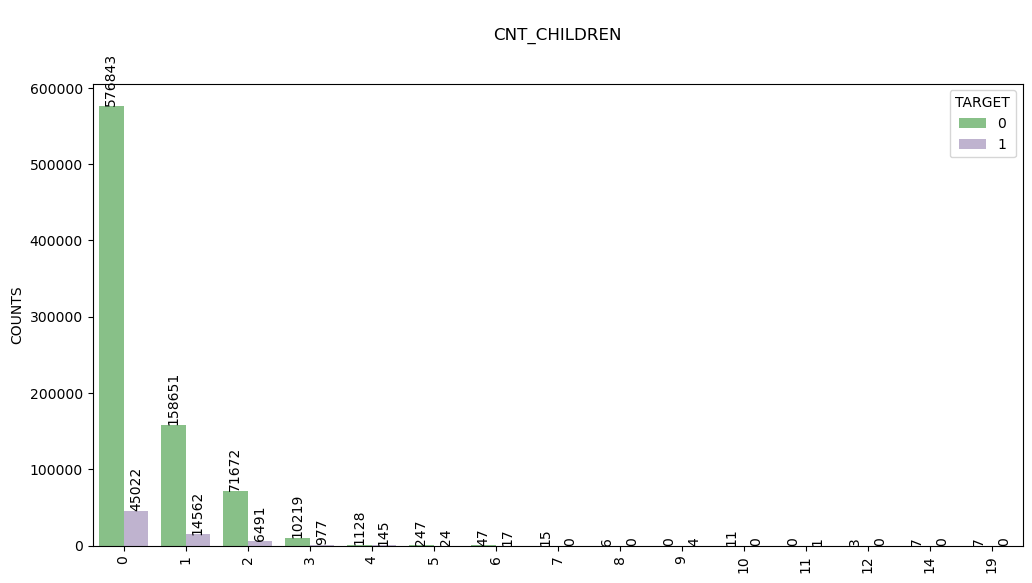

7)


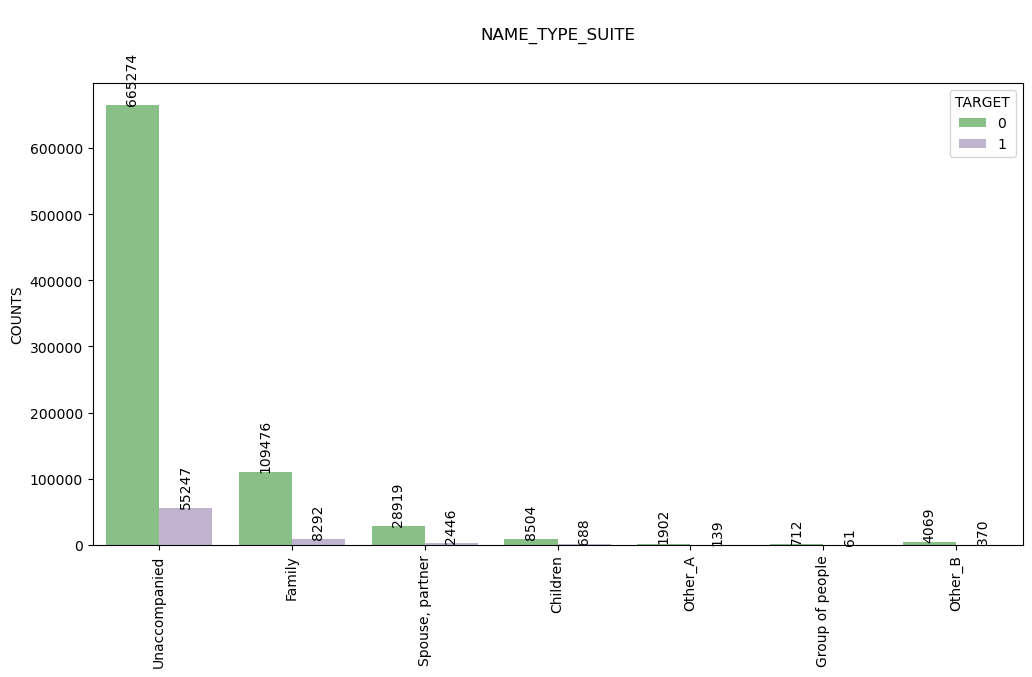

8)


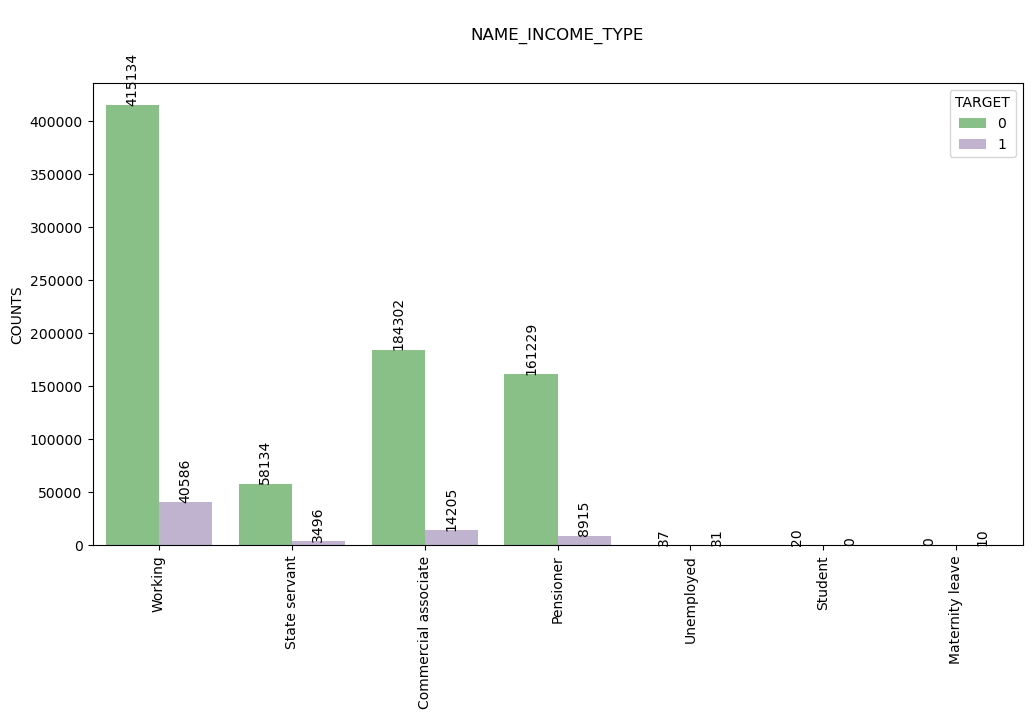

9)


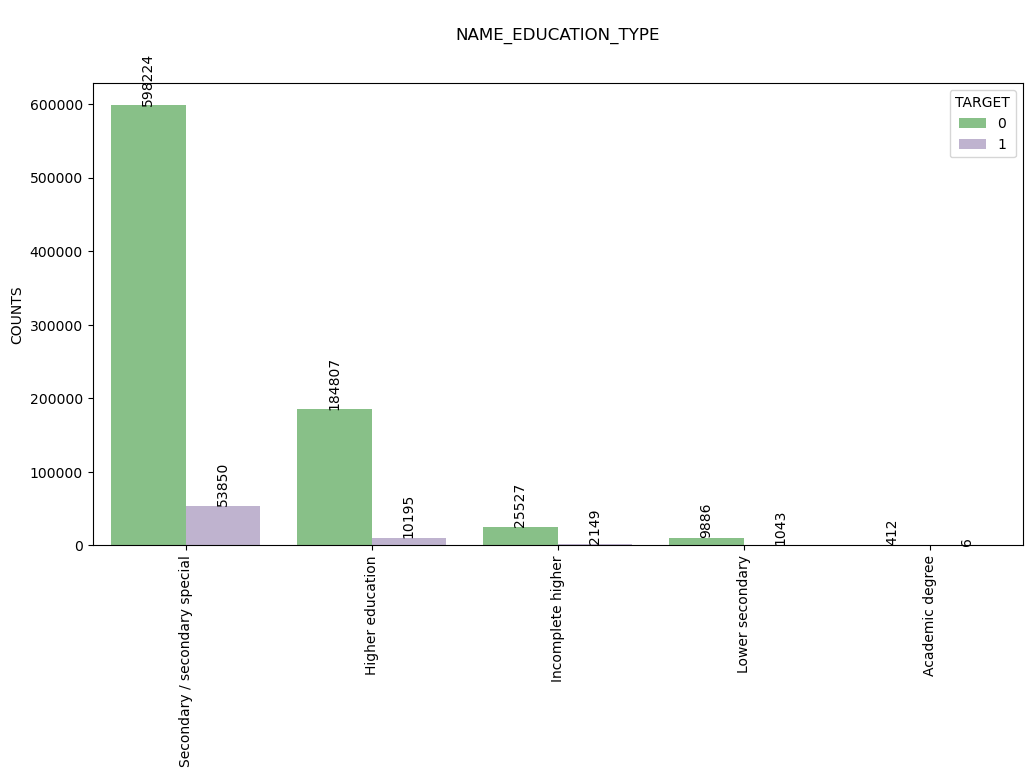

10)


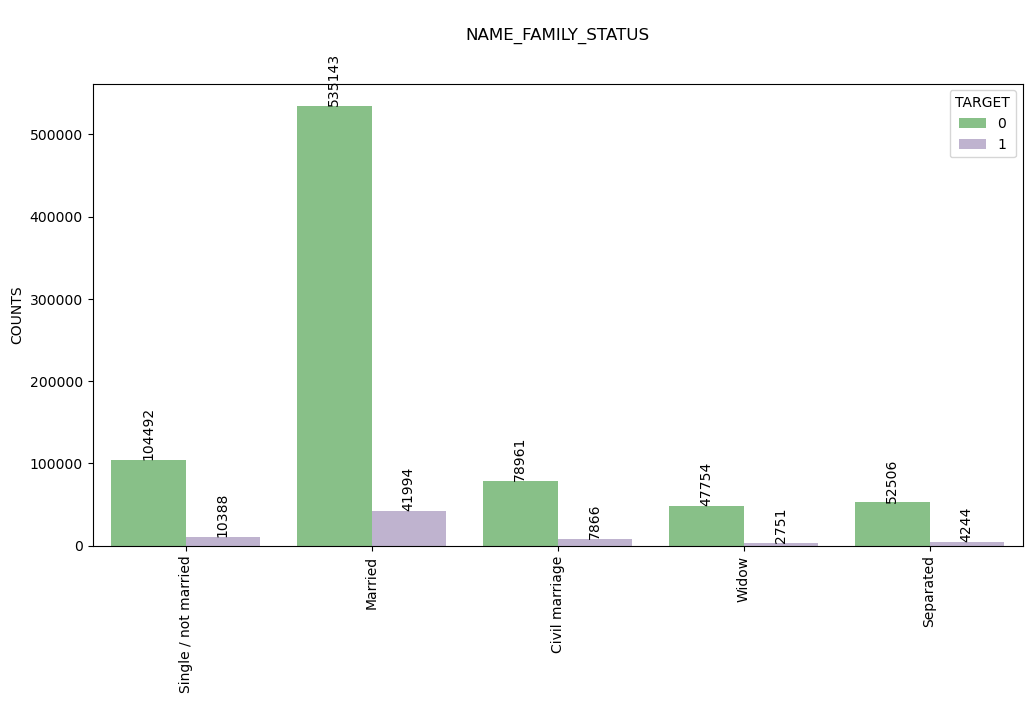

11)


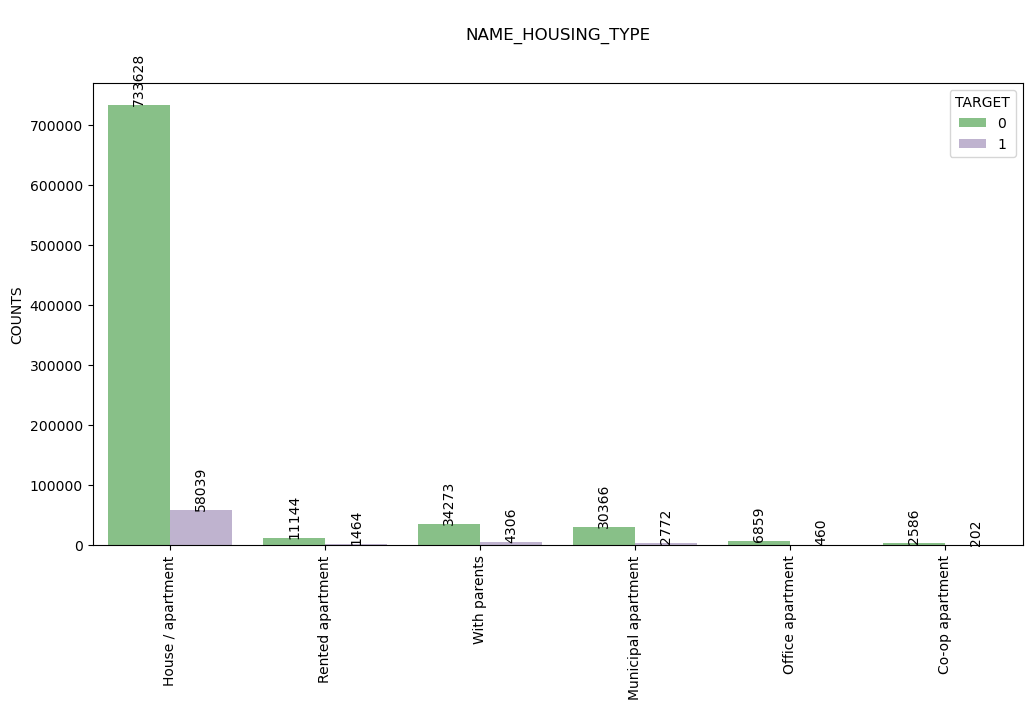

12)


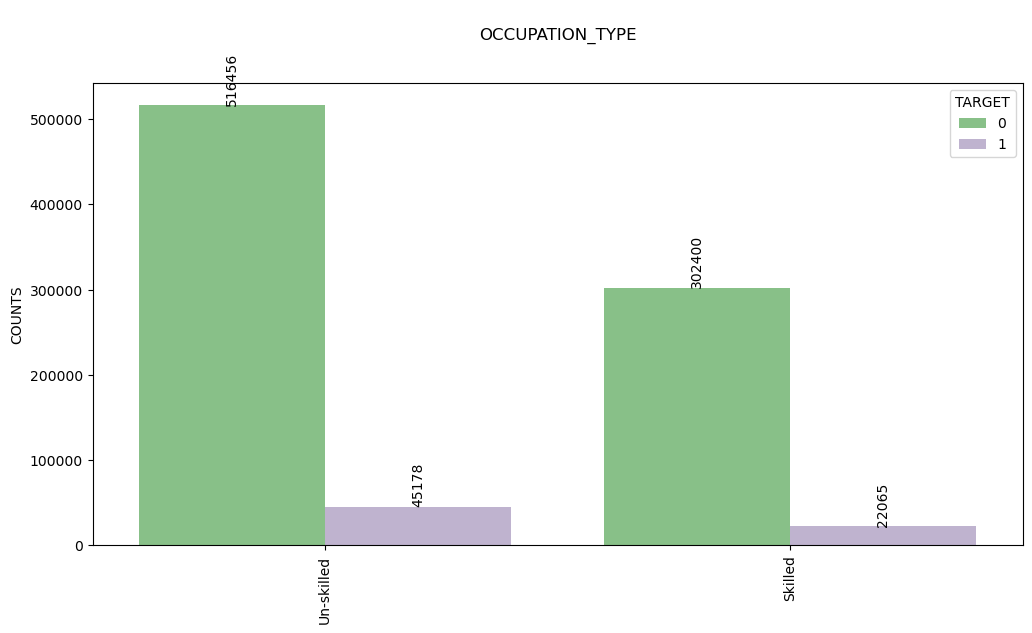

13)


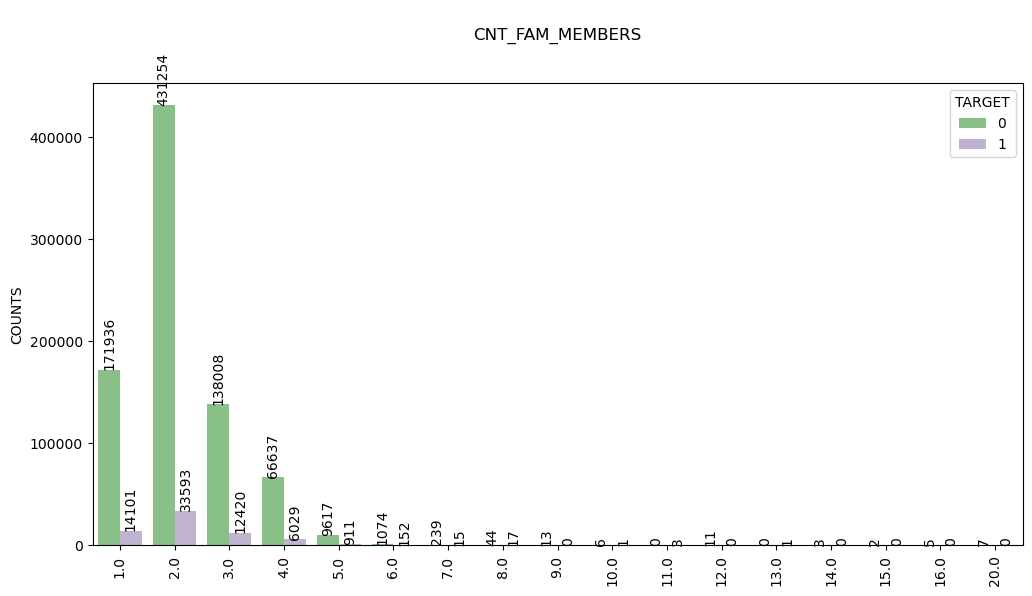

14)


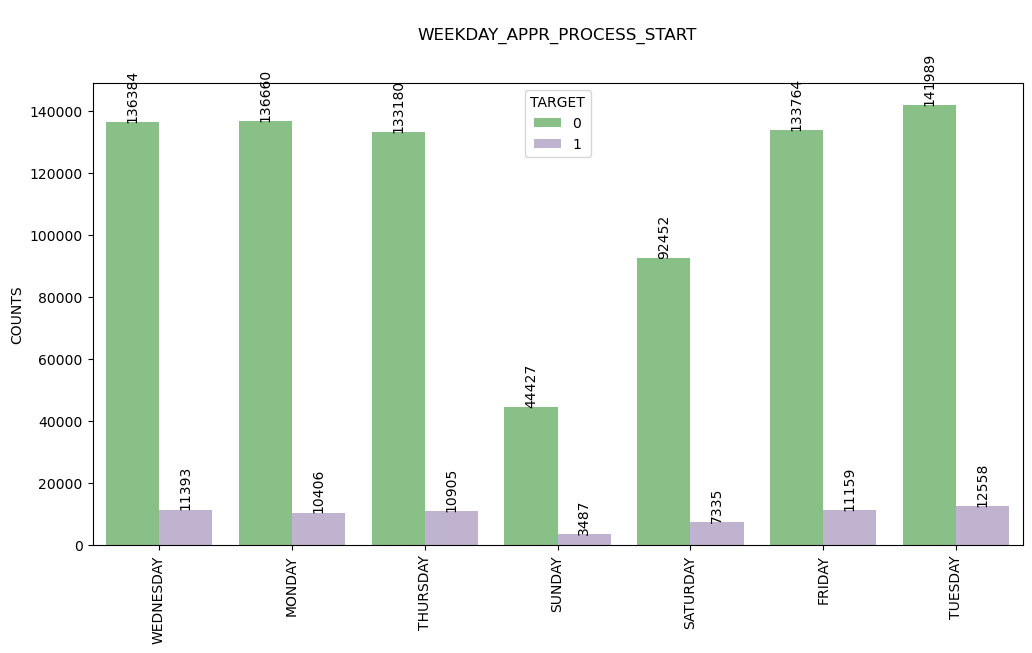

15)


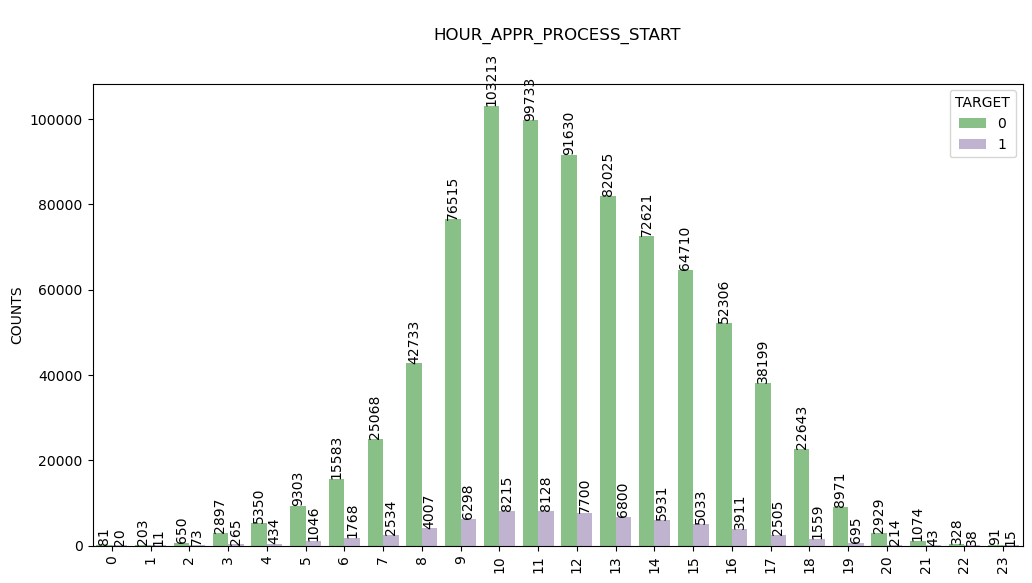

16)


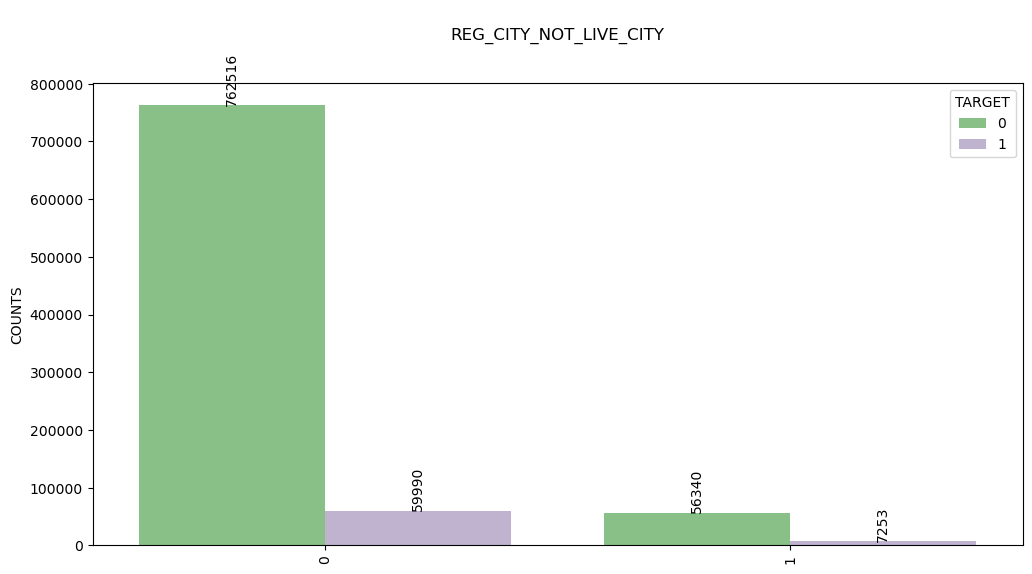

17)


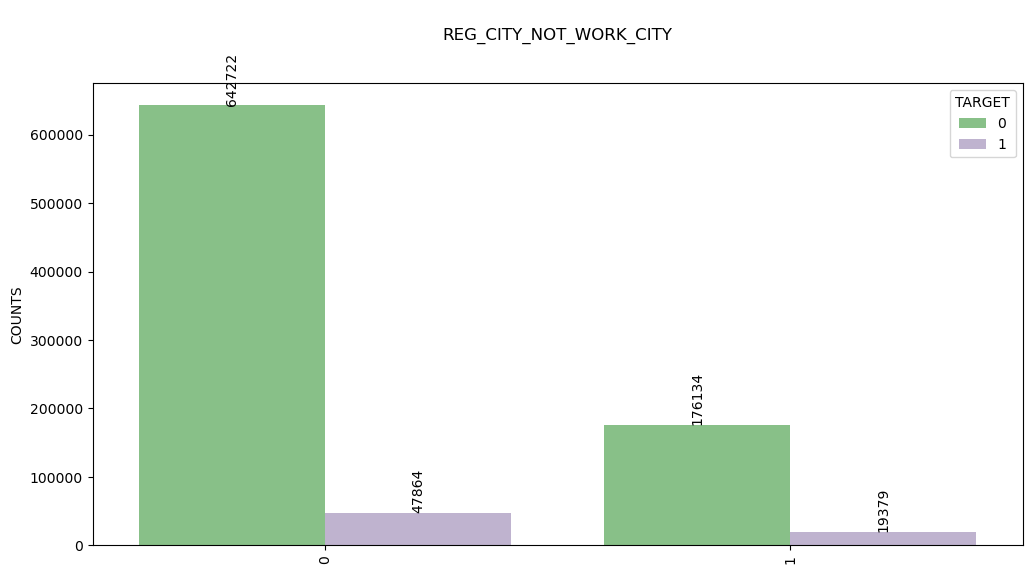

18)


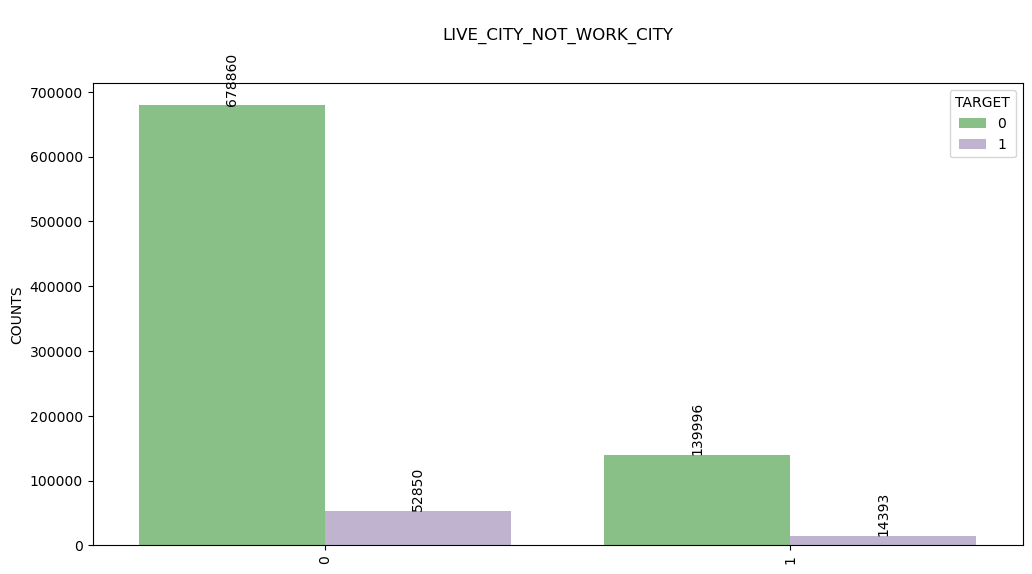

19)


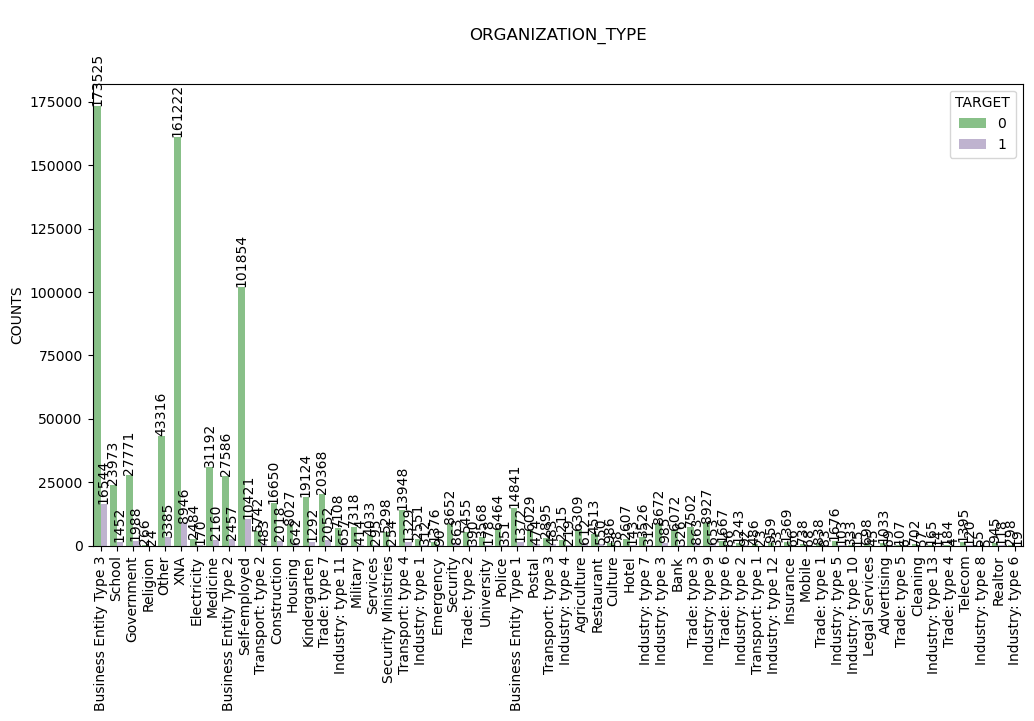

20)


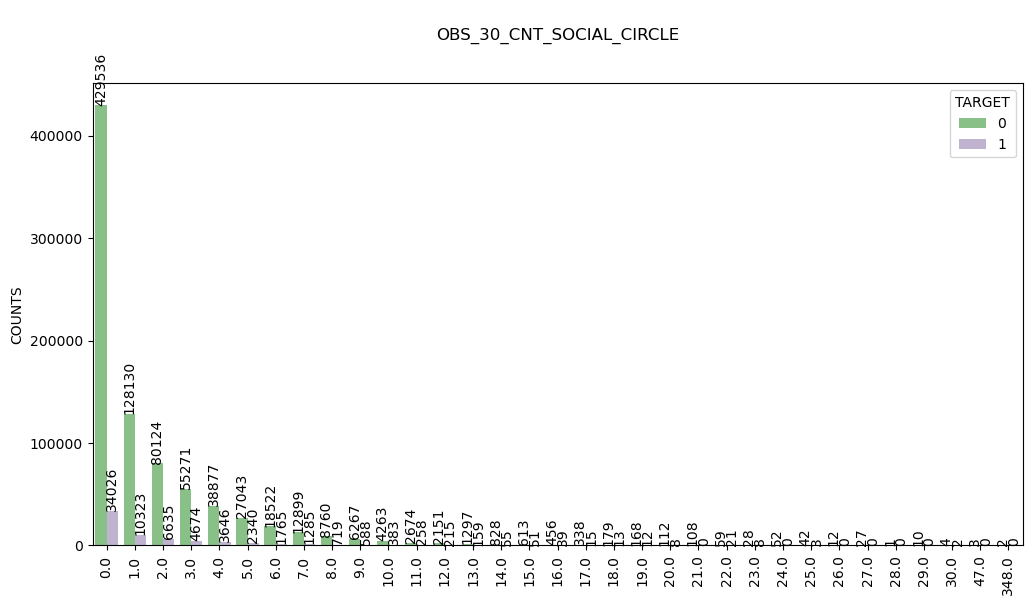

21)


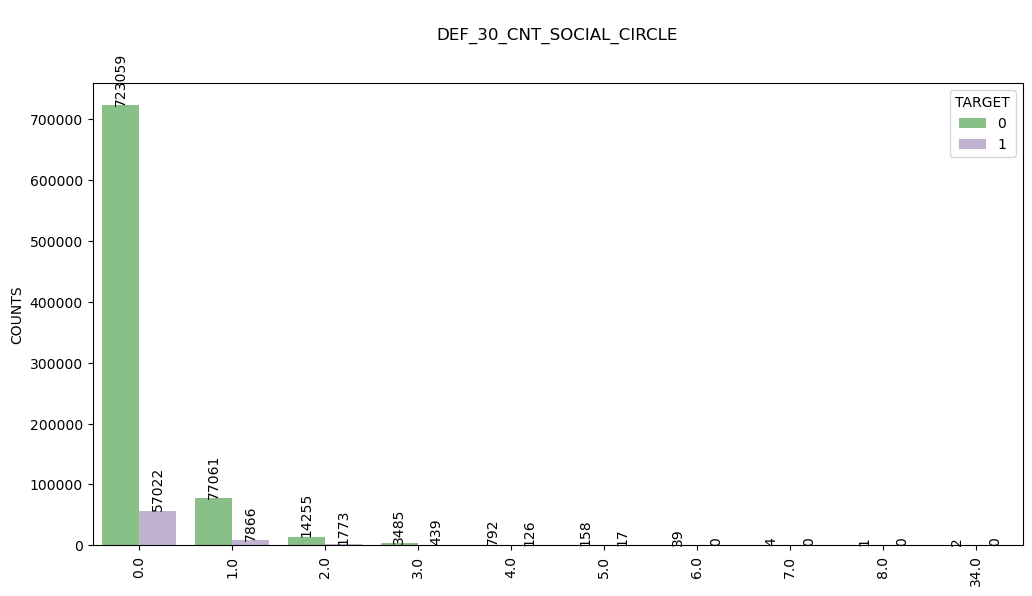

22)


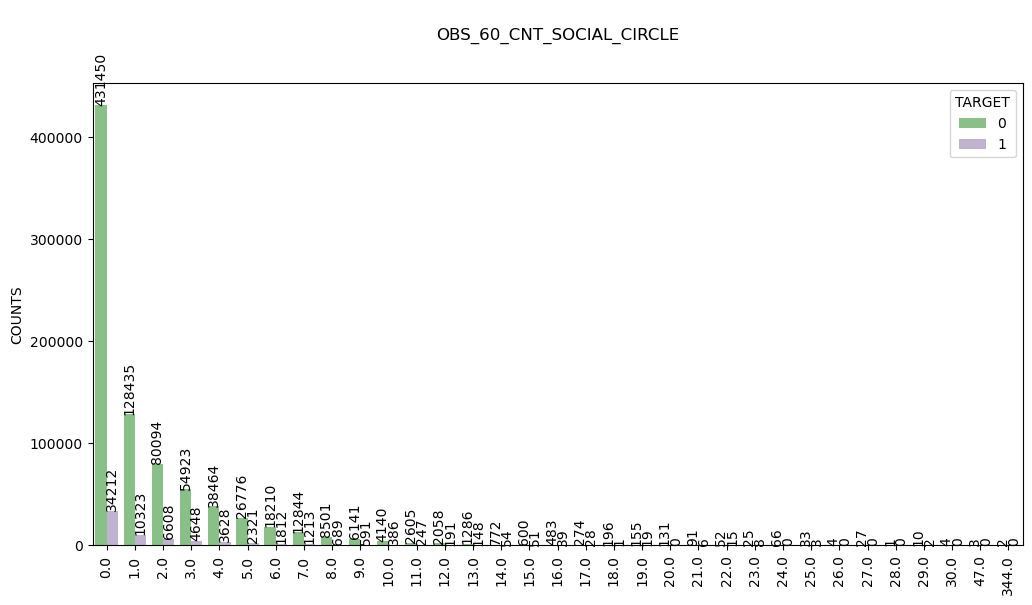

23)


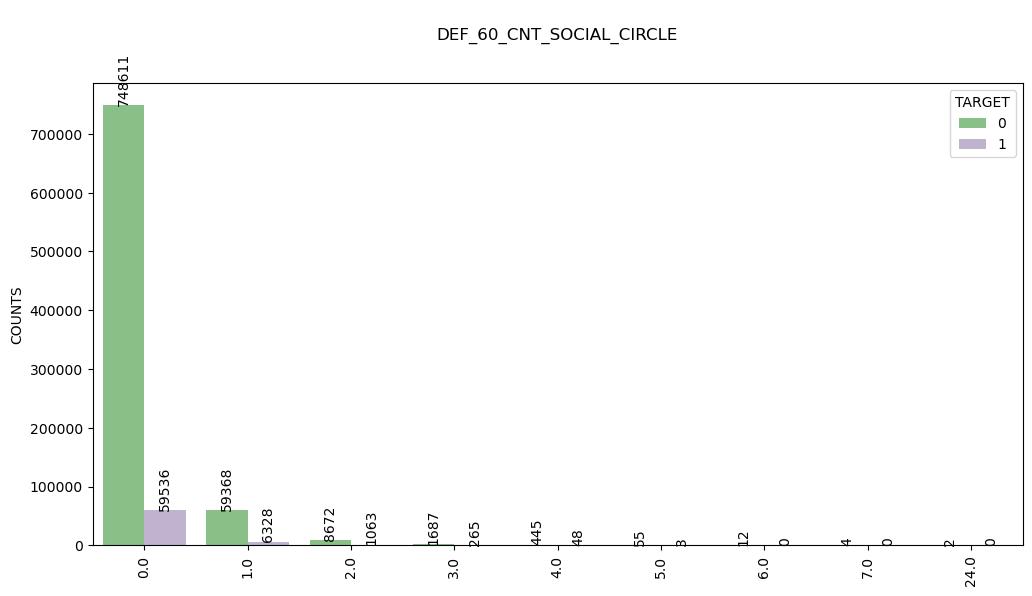

24)


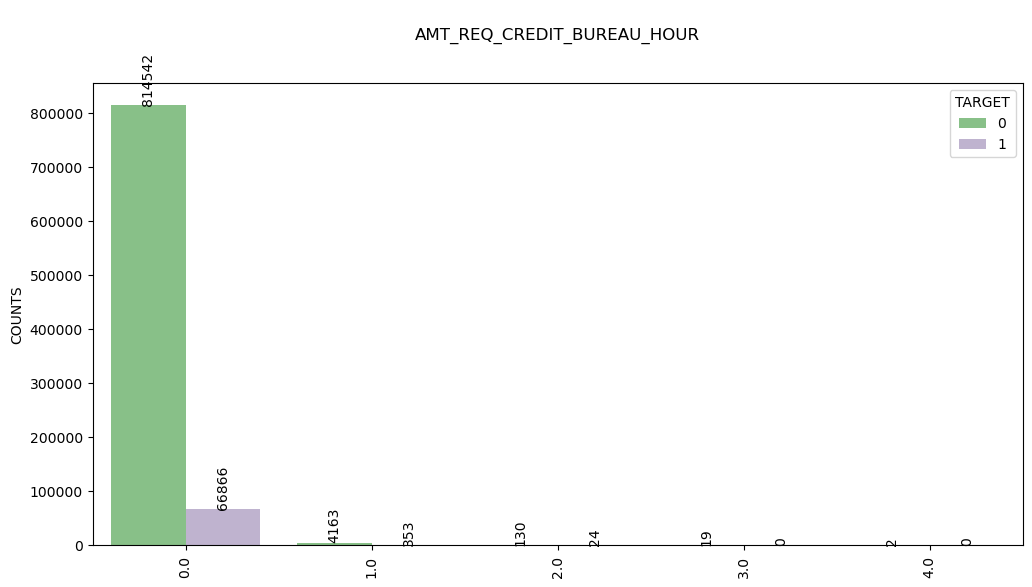

25)


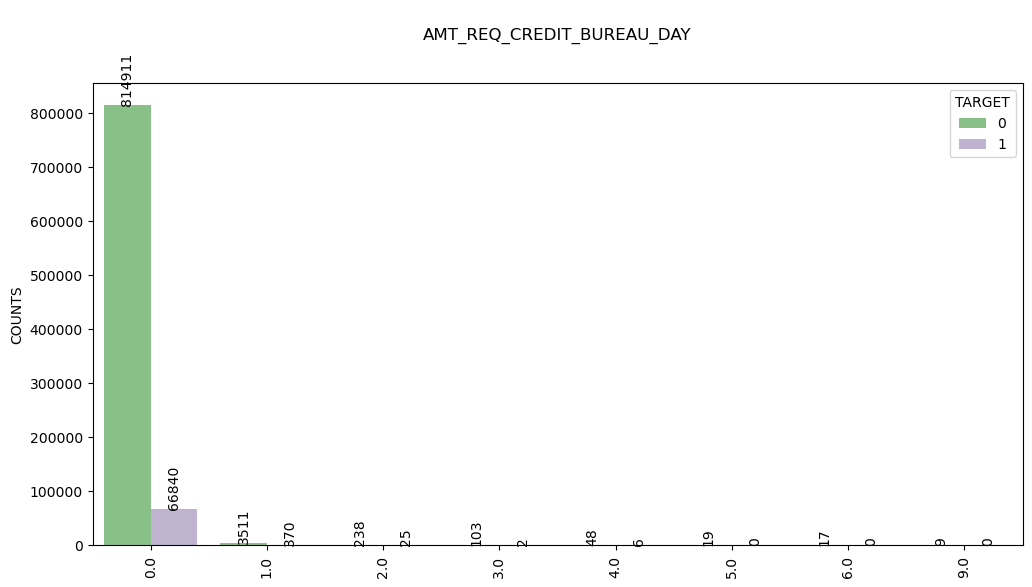

26)


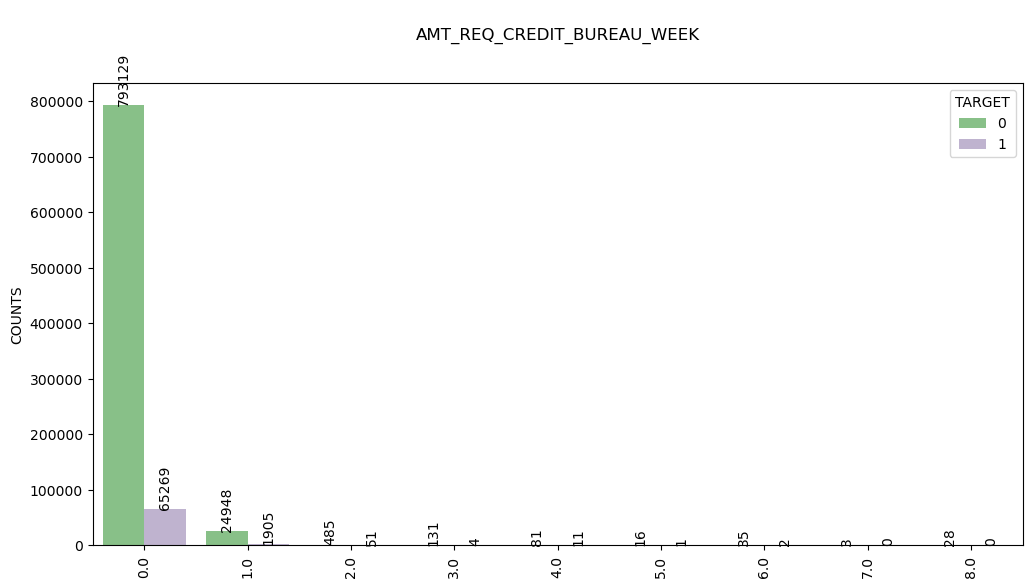

27)


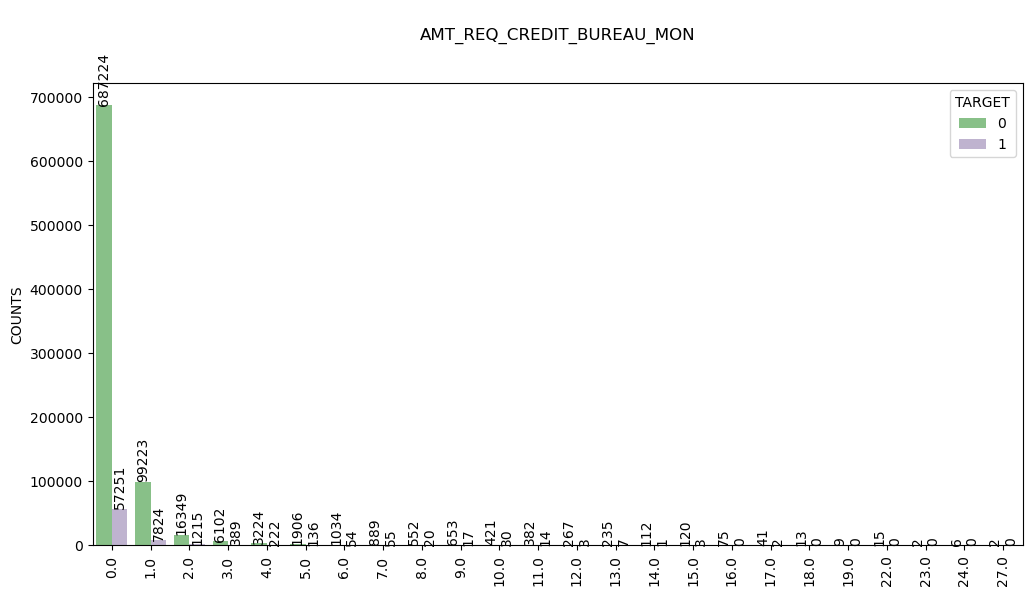

28)


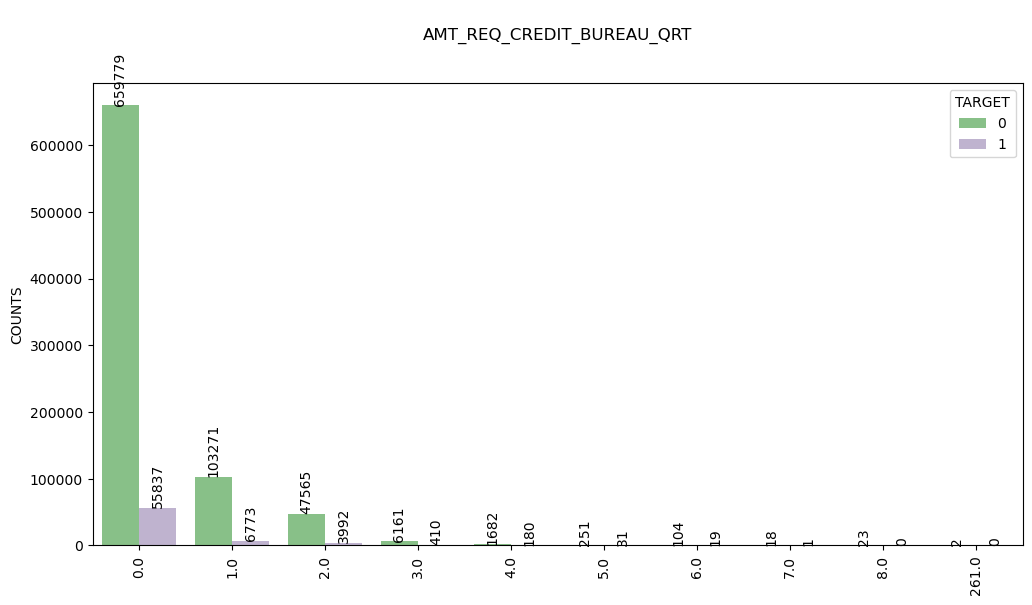

29)


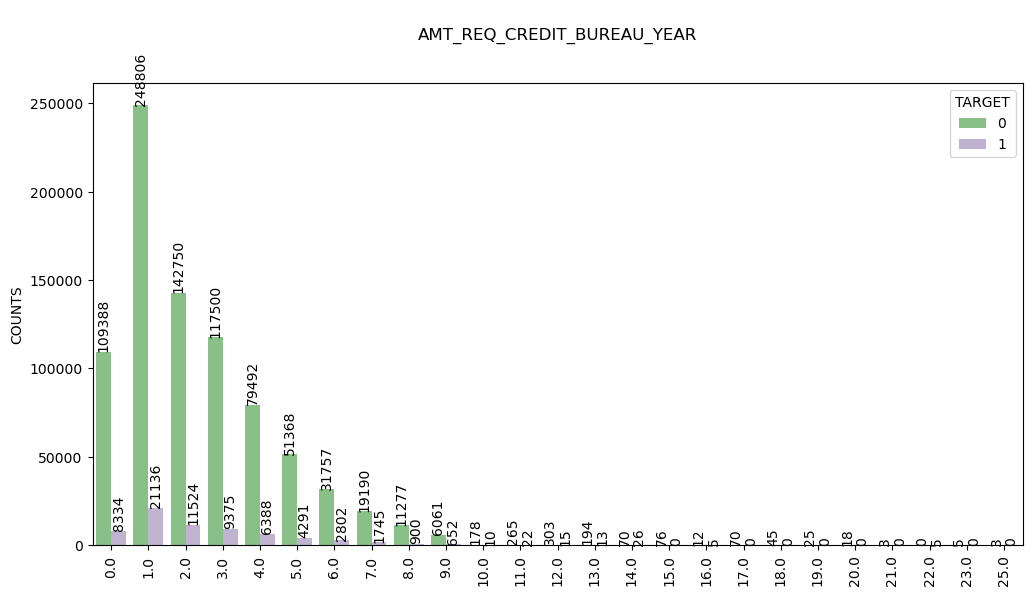

30)


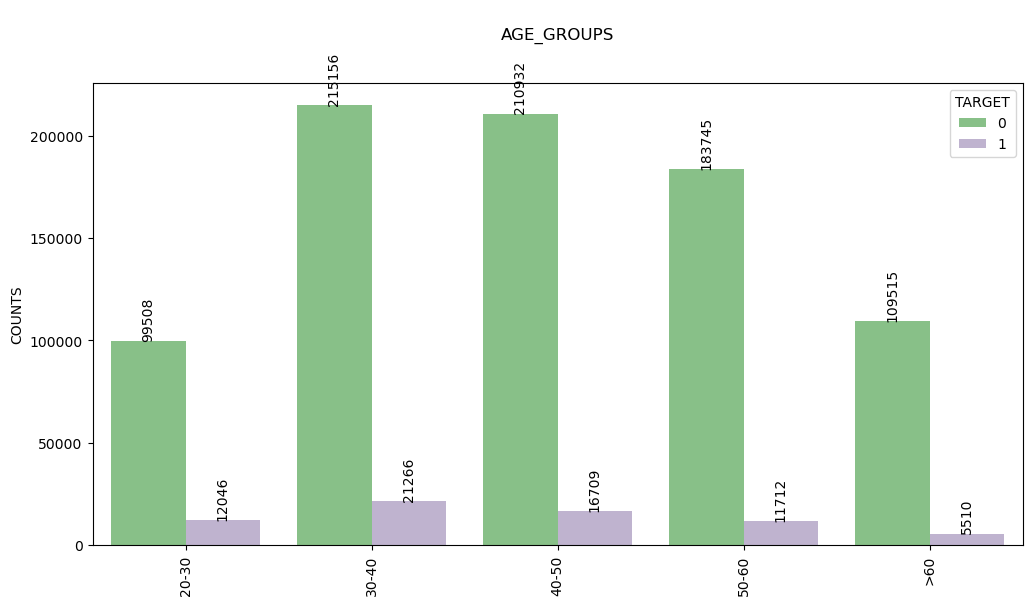

31)


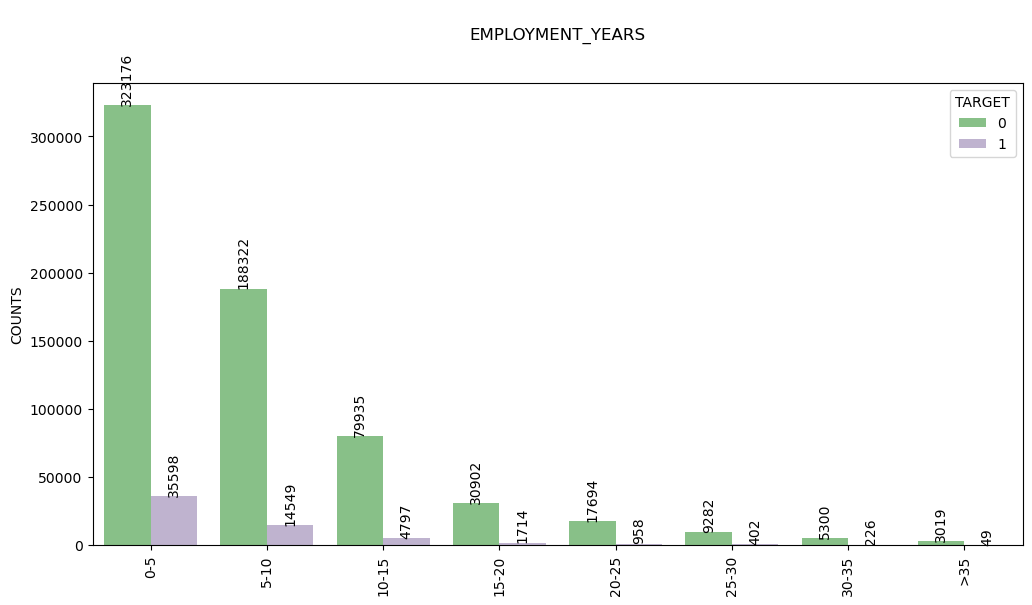

32)


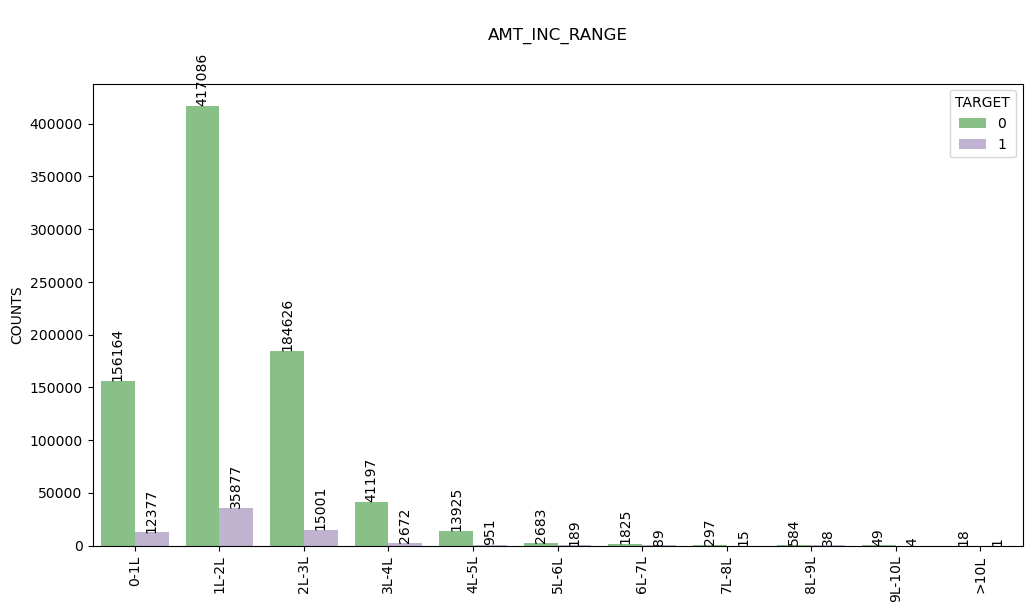

33)


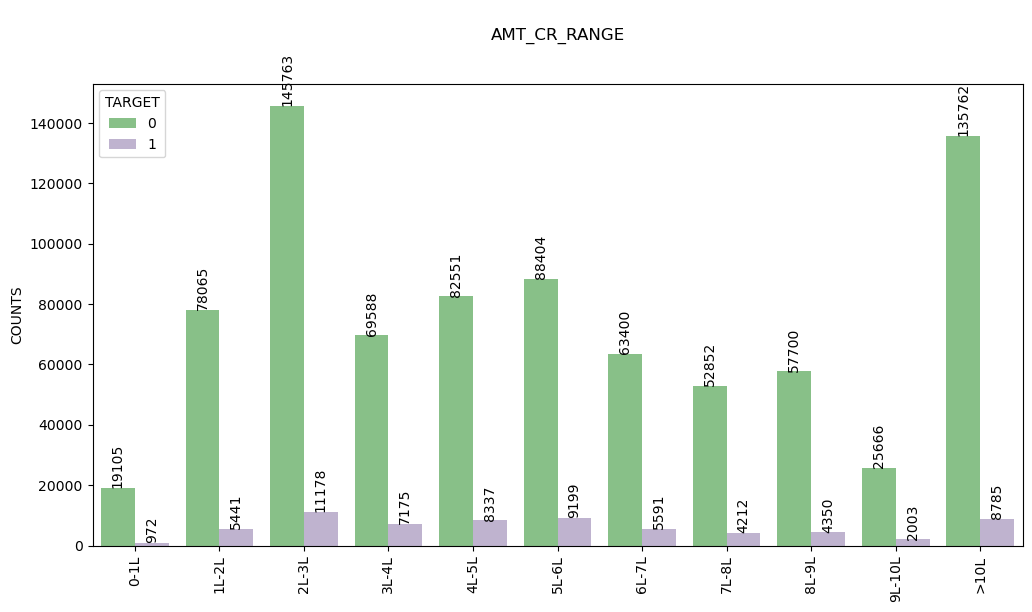

34)


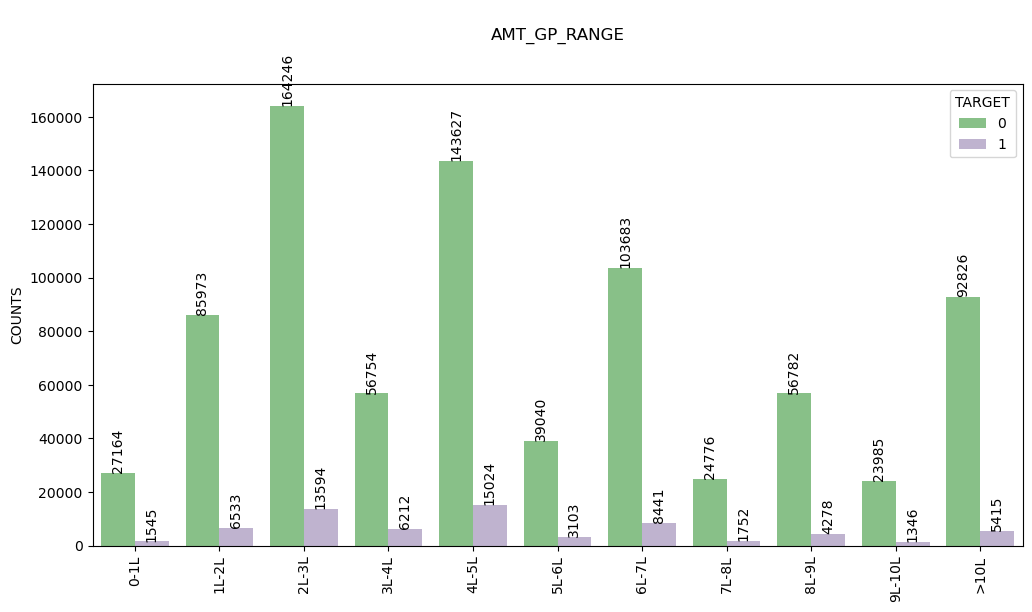

35)


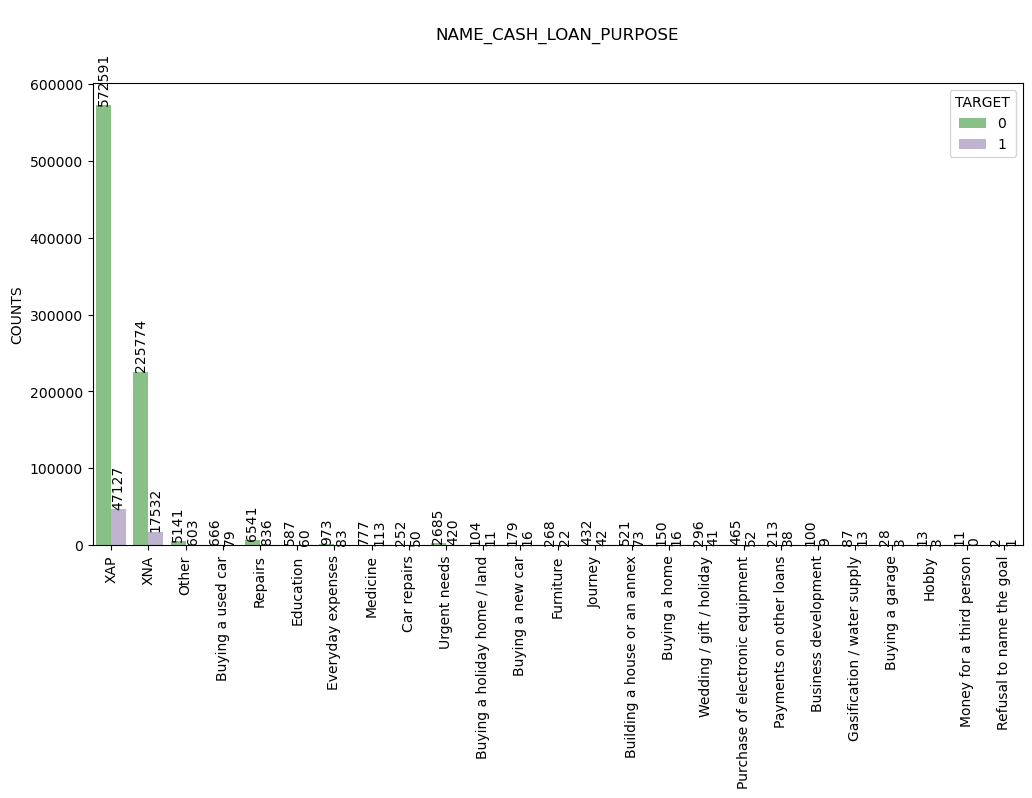

36)


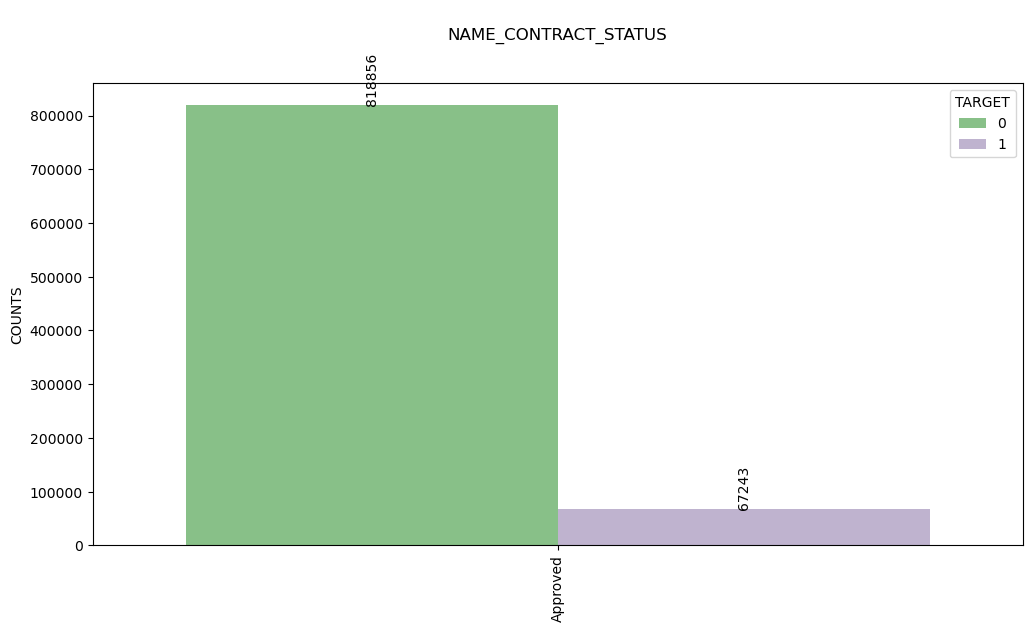

37)


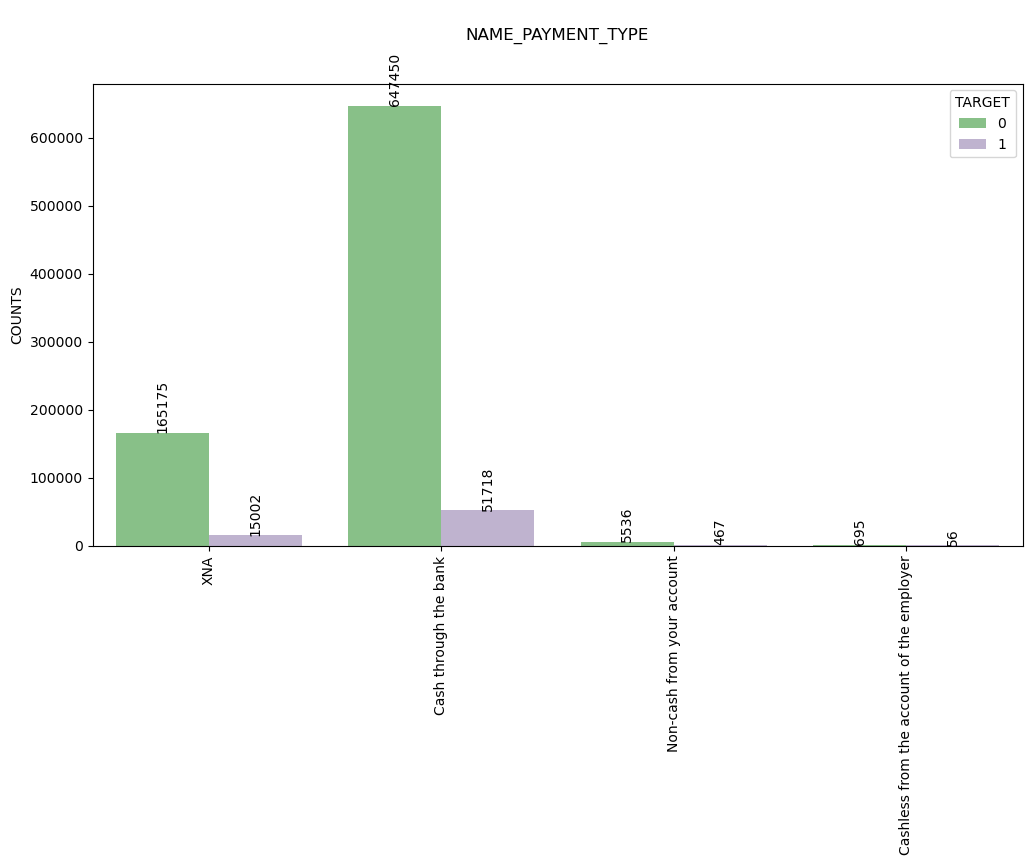

38)


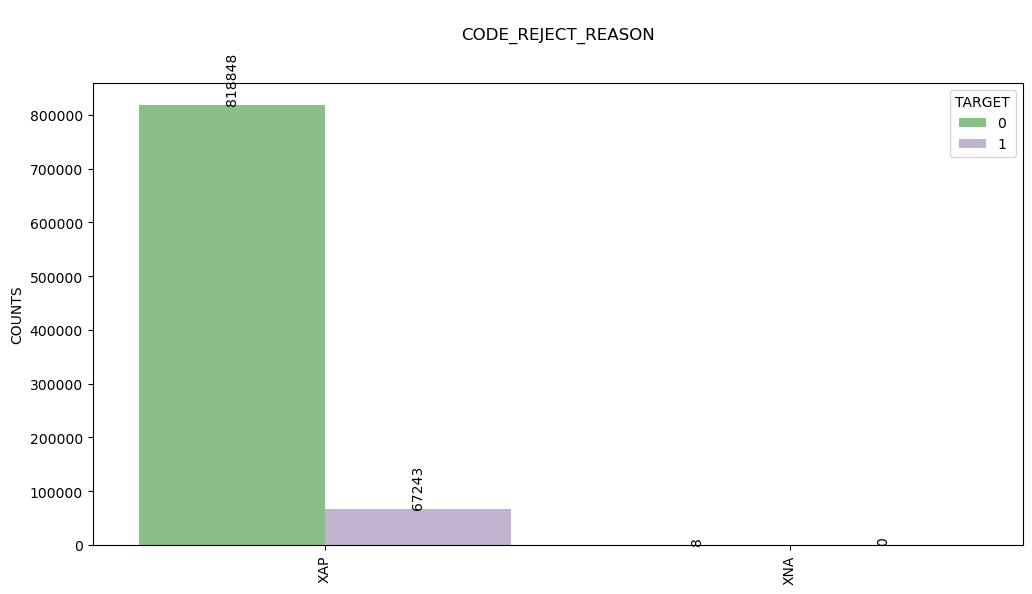

39)


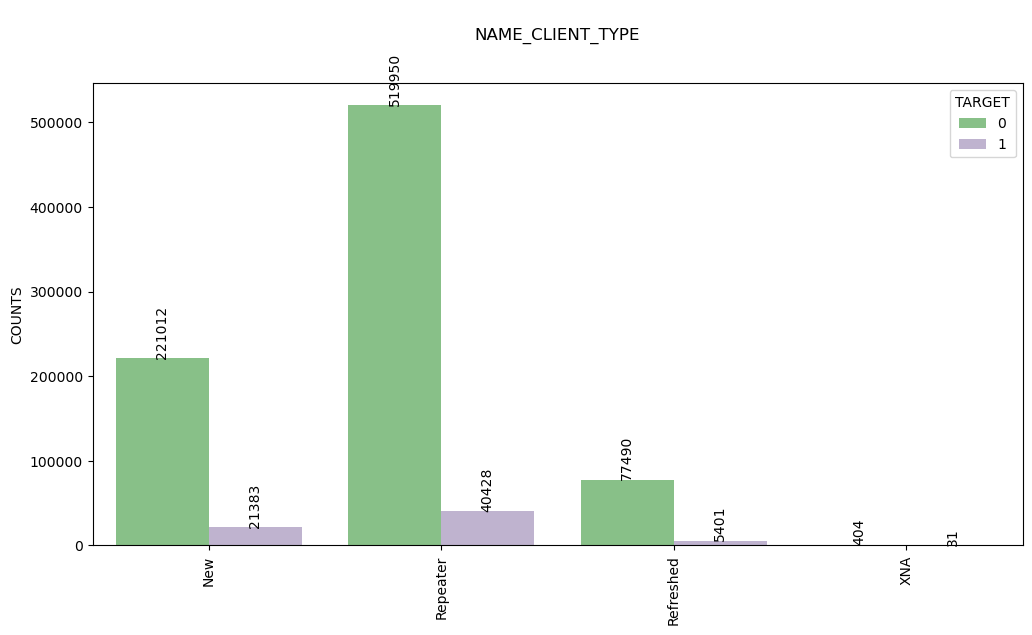

40)


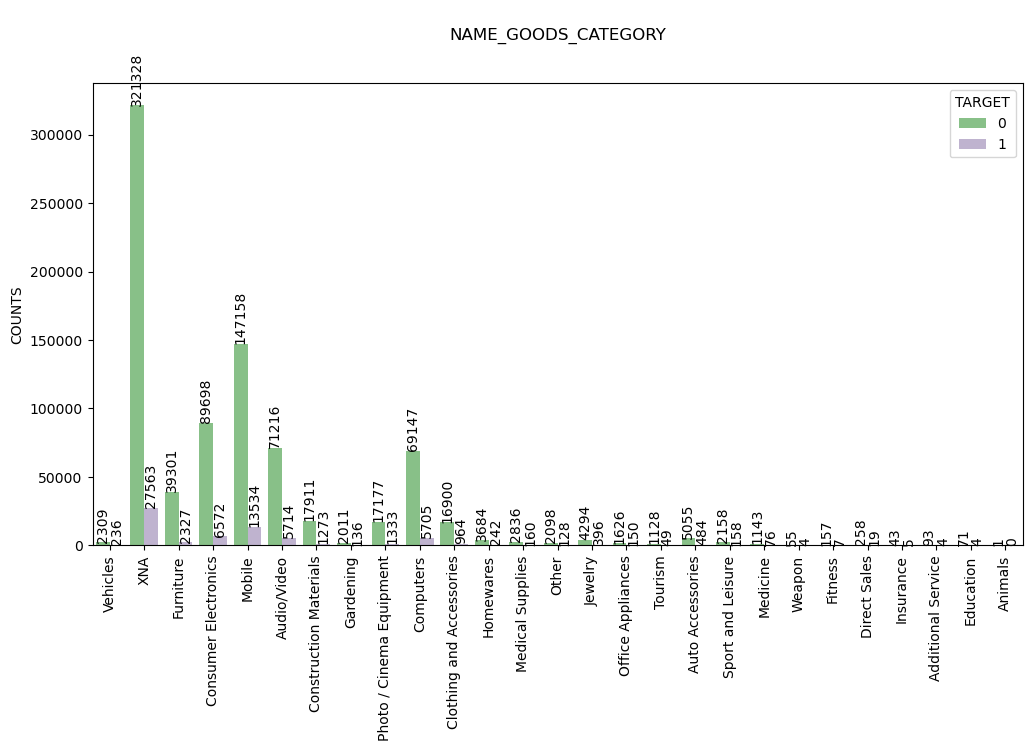

41)


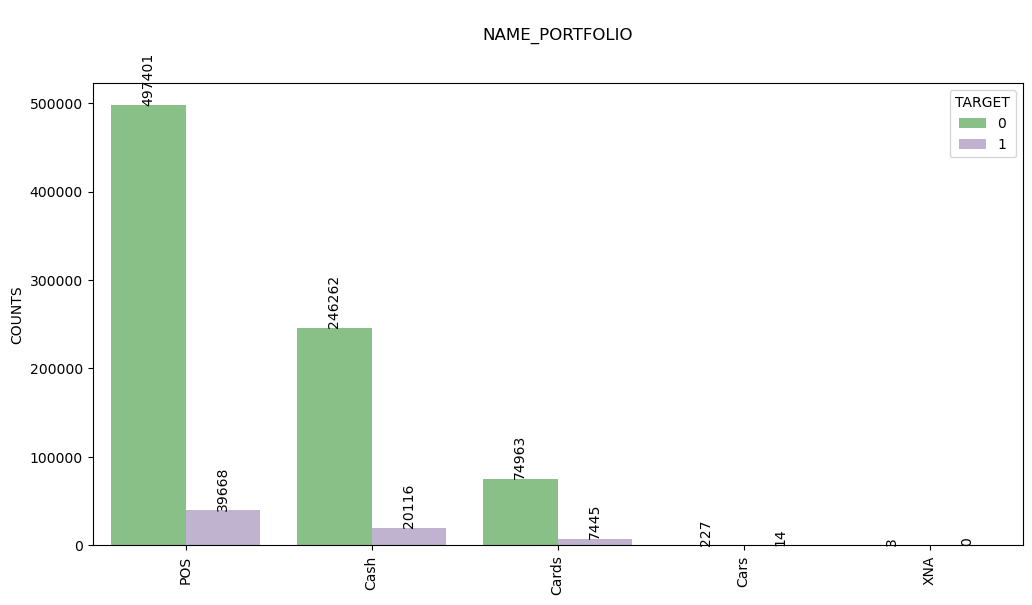

42)


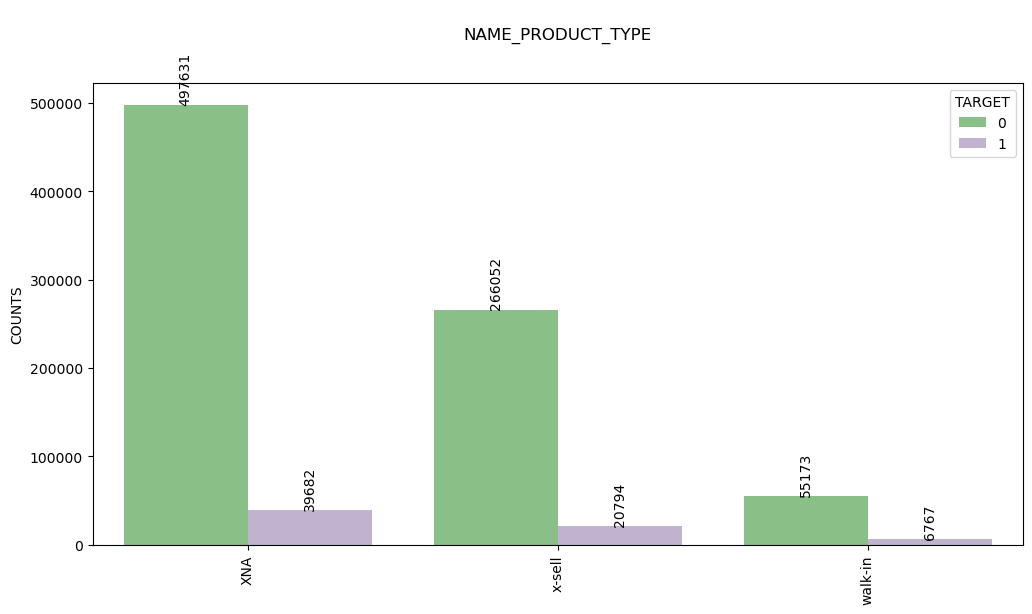

43)


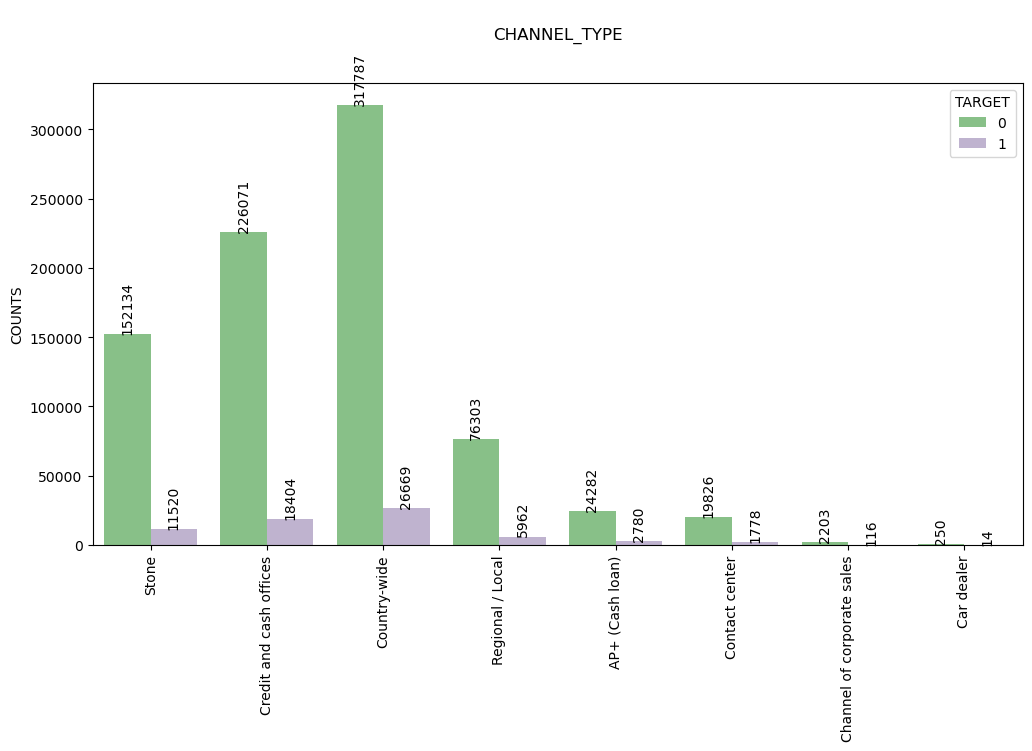

44)


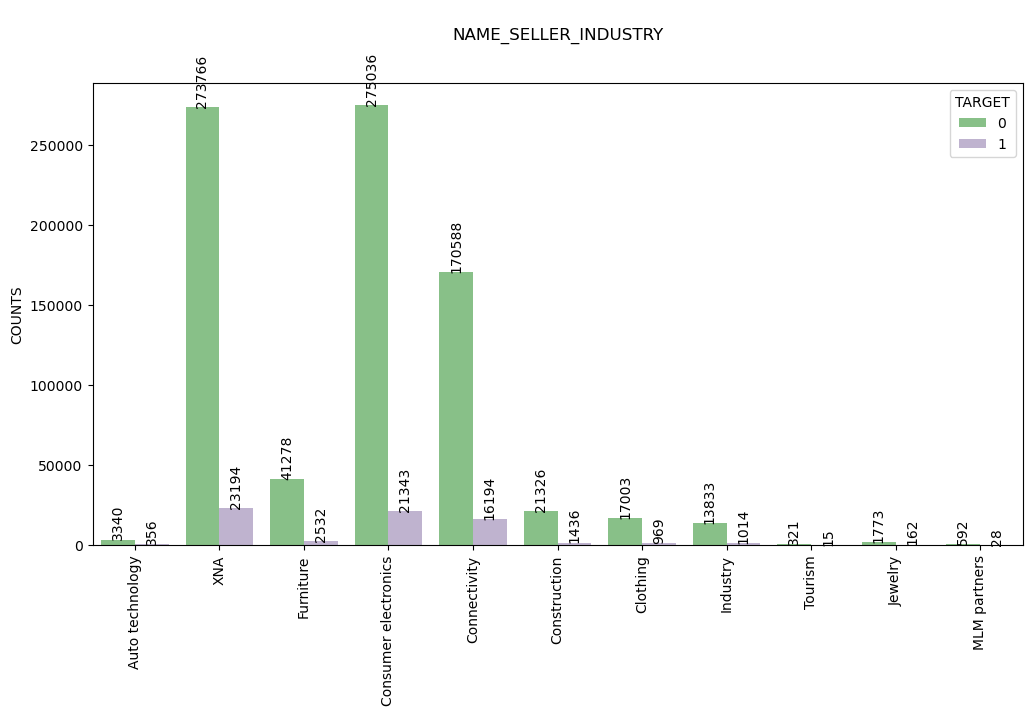

45)


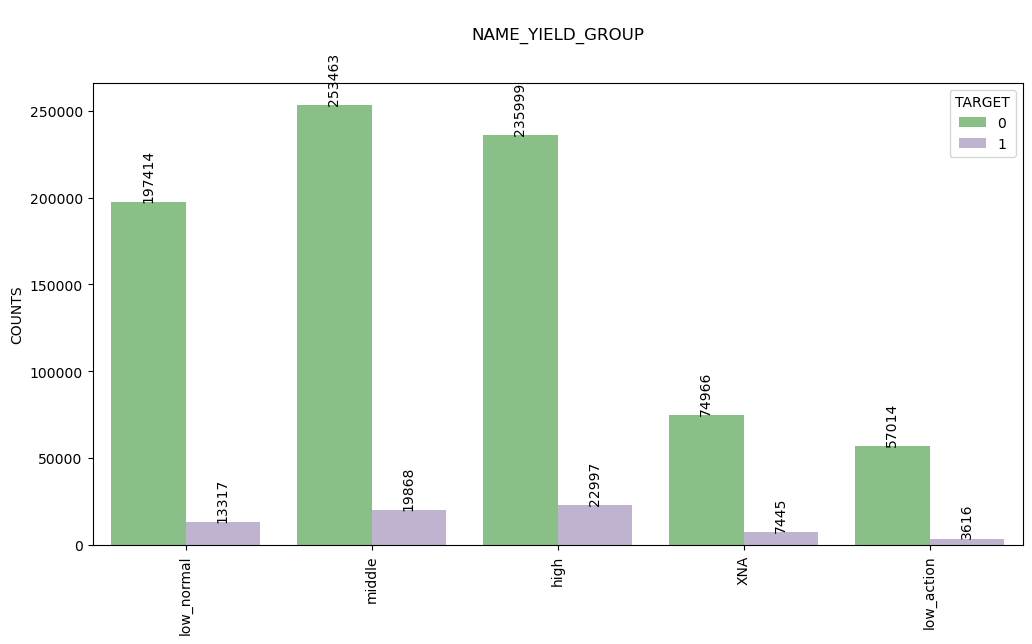

46)


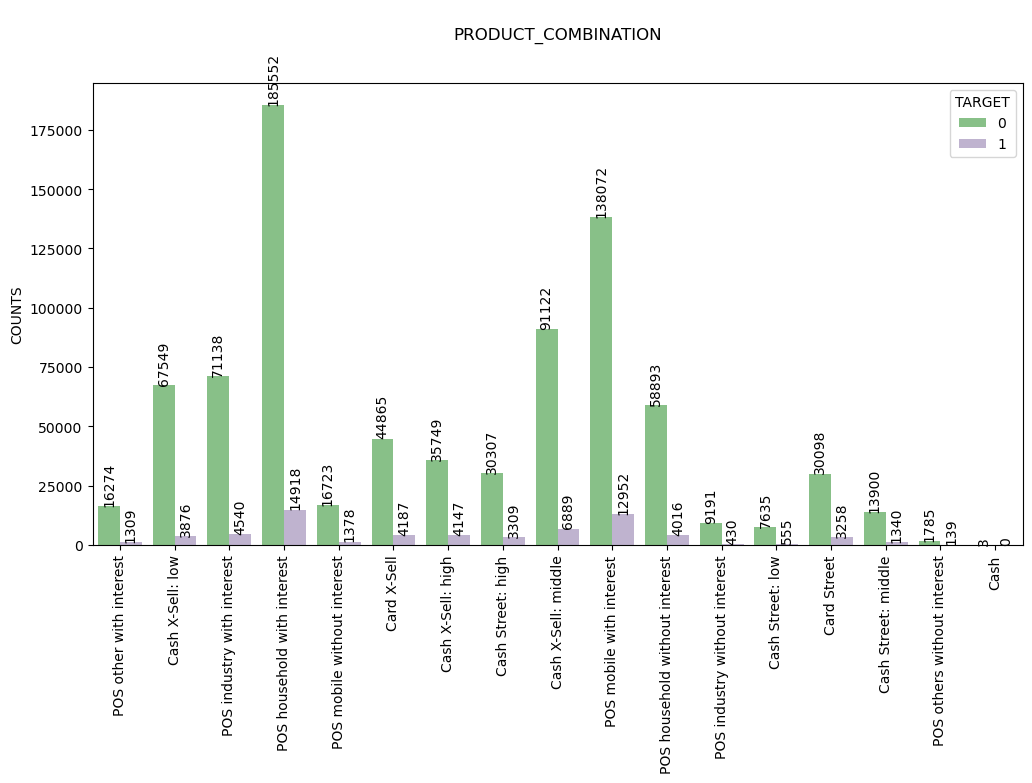

47)


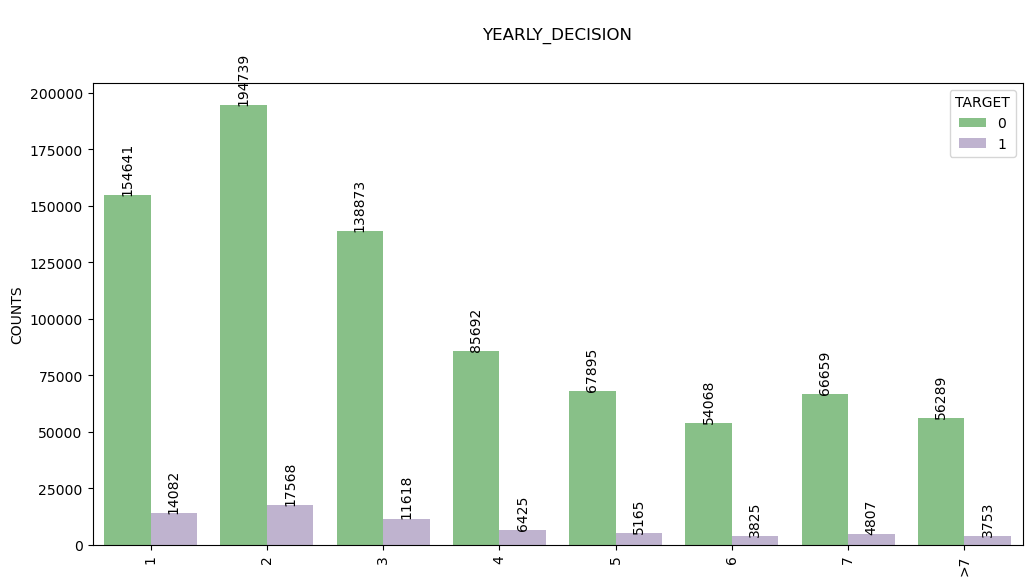

In [94]:
c=1
for i in new_obj:
    print(str(c)+")")
    c+=1
    plt.figure(figsize=(12,6))
    ax=sns.countplot(data=merged_data,x=i,hue="TARGET",palette='Accent')
    for x in ax.containers:
        ax.bar_label(x, rotation=90)
    plt.xticks(rotation=90)
    plt.xlabel("\n\n")
    plt.ylabel("COUNTS")
    plt.title("\n"+i+"\n\n")
    plt.show()